In [3]:
# %reload_ext : Reloads an IPython extension by its module name.
%reload_ext autoreload
# %autoreload 2 : Reloads all modules (except those excluded by %aimport)  
#  every time before executing the Python code typed.
%autoreload 2

# %TEXT : code in this format is called a "magic function" 
#  https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline/43028034

In [5]:
import os
import sys
import time

import matplotlib.pyplot as plt
# Sets backend of matplotlib to the 'inline' backend
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

ImportError: No module named utilities2015

In [313]:
 # # # # # # # # # # # # # # # # FIND BAD FILES # # # # # # # # # # # # # # # # # # # #
# Utility code
from os import listdir
from PIL import Image

# Throws an error if you don't set Max Pixels to around 2 Billion (yikes)
Image.MAX_IMAGE_PIXELS = 2000000000
# Iterates through every possible filename as defined in metadata_cache
#                                           stack must be defined
bad_fp_list = [] # Full filePaths
bad_file_list = [] # FileNames
for fn in metadata_cache['valid_filenames_all'][stack]:
    
    # filepath raw
    fp_raw = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                        resol='raw', version=None, fn=fn)
    # filepath raw Ntb
    fp_raw_ntb = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                      resol='raw', version='Ntb', fn=fn)
    # filepath thumbnail Ntb
    fp_thumbnail_ntb = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                      resol='thumbnail', version='Ntb', fn=fn)
    # filepath thumbnail Ntb Normalized
    fp_thumbnail_ntb_norm = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                      resol=tb_resol, version='NtbNormalized', fn=fn)
    
                            DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                      resol='thumbnail', version='NtbNormalized', fn=img_name)
    # filepath thumbnail mask
    fp_thumbnail_mask = DataManager.get_thumbnail_mask_filename_v3(stack, prep_id=None, fn=fn)
    
    # CHANGE THIS. This will check for a particular stage of the pipeline being complete
    fp_to_test = fp_thumbnail_ntb_norm
    try:
        img = Image.open(fp_to_test) # open the image file
        img.verify() # verify that it is, in fact an uncorruted image
    except (IOError, SyntaxError) as e:
        print('Bad file:', fp_to_test) # Print out the names of corrupt files
        bad_fp_list.append(fp_to_test) # Add bad filepaths to bad_filepath_list
        bad_file_list.append(fn) # Add bad files to bad_file_list

    #print(filename
# # # # # # # # # # # # # # # # FIND BAD FILES # # # # # # # # # # # # # # # # # # # #

IndentationError: unexpected indent (<ipython-input-313-8f335381c6fa>, line 23)

In [285]:
# Automatically tells where in the code you are

# 1) raw -> raw_Ntb: extract_channel
# 2) raw_Ntb -> thumbnail_Ntb: rescale
# 3) thumbnail_Ntb -> thumbnail_NtbNormalized: normalize_intensity
# 4) Compute transforms using thumbnail_NtbNormalized: align + compose
# 5) Supply prep1_thumbnail_mask
# 6) prep1_thumbnail_mask -> thumbnail_mask: warp
# 7) raw_Ntb -> raw_NtbNormalizedAdaptiveInvertedGamma: brightness_correction
# 8) Compute prep5 (alignedWithMargin) cropping box based on prep1_thumbnail_mask
# 9) raw_NtbNormalizedAdaptiveInvertedGamma -> prep5_raw_NtbNormalizedAdaptiveInvertedGamma: align + crop
# 10) thumbnail_NtbNormalized -> prep5_thumbnail_NtbNormalized: align + crop
# 11) prep5_raw_NtbNormalizedAdaptiveInvertedGamma -> prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma: rescale
# 12) Specify prep2 (alignedBrainstemCrop) cropping box
# 13) prep5_raw_NtbNormalizedAdaptiveInvertedGamma -> prep2_raw_NtbNormalizedAdaptiveInvertedGamma: crop
# 14) prep2_raw_NtbNormalizedAdaptiveInvertedGamma -> prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg: compress_jpeg

# np.setdiff1d(list1,list2) # Get difference between two lists
# metadata_cache['valid_filenames_all'][stack]  # To get all valid filenames

def where_am_i():
    '''
    where_am_i will iterate through each of the 14 steps of preprocessing, checking that ALL output files 
    have been generated sucessfully. For any stage where files are missing or corrupted, this function will 
    return a list of the filepaths & filenames of the images that are not in the output.
    where_am_i() returns [bad_fp_list, bad_file_list].
    '''
    
    # Throws an error if you don't set Max Pixels to around 2 Billion (yikes)
    Image.MAX_IMAGE_PIXELS = 2000000000
    # Iterates through every possible filename as defined in metadata_cache
    #                                           stack must be defined
    bad_fp_list = [] # Full filePaths
    bad_file_list = [] # FileNames
    
    #   Dic = {'step#': [prep_id, resol, version]}
    stepDic = {'1':[None,'raw','Ntb'], '2':[None,'thumbnail','Ntb'], '3':[None,'thumbnail','NtbNormalized'],\
               '4':[None,'???','???'], '5':[1,'thumbnail','mask'], '6':[None,'???','???'], \
               '7':[None,'raw','NtbNormalizedAdaptiveInvertedGamma'], '8':[5,'thumbnail','mask'], \
               '9':[5,'raw','NtbNormalizedAdaptiveInvertedGamma'], '10':[5,'thumbnail','NtbNormalized'], \
               '11':[5,'thumbnail','NtbNormalizedAdaptiveInvertedGamma']}

    
    # For checking each individual step of the pipeline as outlined above
    for step in range (2,12):
        stepStr = str(step)
        stepCompleted = True
        
        print 'Checking for completion of step '+stepStr
        t = time.time()
        
        if stepDic[stepStr][1]=='???':
                stepCompleted = False
                print 'Output files unknown. No idea.'
                print ''
                continue
        
        for fn in metadata_cache['valid_filenames_all'][stack]:
            
            # Record the filepath from every filename + info from the "step dictionary"
            fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=stepDic[stepStr][0], \
                                     resol=stepDic[stepStr][1], version=stepDic[stepStr][2], fn=fn)
            
            fp_to_test = fp
            try:
                img = Image.open(fp_to_test) # open the image file
                img.verify() # verify that it is, in fact an uncorruted image
            except (IOError, SyntaxError) as e:
               # print('Bad file:', fp_to_test) # Print out the names of corrupt files
                bad_fp_list.append(fp_to_test) # Add bad filepaths to bad_filepath_list
                bad_file_list.append(fn) # Add bad files to bad_file_list
                stepCompleted = False
        #metadata_cache['valid_filenames_all']['MD662']
        
        if stepCompleted:
            print 'Step '+stepStr+' completed!'
            print 'done in', time.time() - t, 'seconds' 
            print ''
        else:
            print '*****     Bad files found!     *****\n'
            print 'Step '+stepStr+' NOT complete. Rerun necessary parts of the code'
            print '`bad_fp_list` and `bad_file_list` created, each contain info on each incomplete files.'
            print 'done in', time.time() - t, 'seconds' 
            print ''
            if stepDic[stepStr][0] is None:
                print '`'+stack+'_'+stepDic[stepStr][1]+'_'+\
                        stepDic[stepStr][2]+'` was not generated properly'
            else:
                print '`'+stack+'_prep'+str(stepDic[stepStr][0])+'_'+stepDic[stepStr][1]+'_'+\
                        stepDic[stepStr][2]+'` was not generated properly'
            break
            #continue
    return bad_fp_list, bad_file_list

#print where_am_i.__doc__
[bad_fp_list, bad_file_list] = where_am_i()

print len(bad_file_list),' bad files'

Checking for completion of step 2
Step 2 completed!
done in 0.18444108963 seconds

Checking for completion of step 3
Step 3 completed!
done in 0.292607069016 seconds

Checking for completion of step 4
Output files unknown. No idea.

Checking for completion of step 5
Step 5 completed!
done in 0.11402797699 seconds

Checking for completion of step 6
Output files unknown. No idea.

Checking for completion of step 7
*****     Bad files found!     *****

Step 7 NOT complete. Rerun necessary parts of the code
`bad_fp_list` and `bad_file_list` created, each contain info on each incomplete files.
done in 0.114217042923 seconds

`MD662_raw_NtbNormalizedAdaptiveInvertedGamma` was not generated properly
165  bad files


In [294]:
bad_file_list

['MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001',
 'MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002',
 'MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003',
 'MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004',
 'MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005',
 'MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006',
 'MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007',
 'MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008',
 'MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009',
 'MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010',
 'MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011',
 'MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012',
 'MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013',
 'MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014',
 'MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015',
 'MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019',
 'MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020',
 'MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021',
 'MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022',
 'MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023',


In [262]:
# # # TESTING USE OF EC2
# [Using first 2 images]
# use_aws=False local_only=True:  140 seconds   total: 8 hours
# use_aws=True  local_only=True:  74 seconds    total: 4 hours
# use_aws=True  local_only=False:  DOES NOTHING? 
# use_aws=False  local_only=False: DOES NOTHING? 

first_image = list(image_names_all_data_dirs_flattened)[205:207]
print first_image
in_dir = '/media/alexn/BstemAtlasDataBackup/MD662/'
output_dir = create_if_not_exists(DataManager.get_image_dir_v2(stack=stack, prep_id=None, resol='raw'))
print 'Outputting to : ' + output_dir

t = time.time()

run_distributed('export LD_LIBRARY_PATH=\
%(kdu_dir)s:$LD_LIBRARY_PATH; %(kdu_bin)s -i \"%%(in_fp)s\" -o \"%%(out_fp)s\"' % \
                {'kdu_bin': KDU_EXPAND_BIN, 'kdu_dir': os.path.dirname(KDU_EXPAND_BIN)},
                kwargs_list={'in_fp': [os.path.join(in_dir, img_name + '_lossless.jp2') 
                                       for img_name in first_image], 
                             'out_fp': [DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version=None, fn=img_name) 
                                        for img_name in first_image]},
                argument_type='single',
                jobs_per_node=1, # Use single process
                local_only=True, # Run local
                use_aws=True)   # Run local
print 'done in', time.time() - t, 'seconds' # 2252 seconds full stack
# # # TESTING USE OF EC2

['MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001', 'MD662&661-F134-2017.06.07-21.04.24_MD662_1_0400']
Outputting to : /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw
argument type: single


rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.


running script: /tmp/runall.sh
done in 77.2115421295 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


In [232]:
#len(metadata_cache['valid_filenames_all'][stack])\
i=0
for fn in list(image_names_all_data_dirs_flattened)[0:]:
    if float(fn[len(fn)-4:])==1:
        print float(fn[len(fn)-4:])
        print i
    i+=1
print first_image

1.0
205
MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001


In [156]:
DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                              resol='raw', version=None, fn=fn)

'/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F145-2017.06.08-01.42.12_MD662_3_0435_raw.tif'

In [142]:
# TEST
print(list(metadata_cache.keys()))
# No indent = Has file dependancies other than *_sorted_filenames.txt or *_anchor.txt
                                        #metadata_cache['filenames_to_sections']['MD662']
#metadata_cache['image_shape']['MD662']
                                        #metadata_cache['anchor_fn']['MD662']
                                        #metadata_cache['sections_to_filenames']['MD662']
                                        #metadata_cache['filenames_to_sections']['MD662']
#metadata_cache['section_limits']['MD662']
#metadata_cache['cropbox']['MD662']
#metadata_cache['valid_sections']['MD662']
#metadata_cache['valid_filenames']['MD662']
                                        #metadata_cache['valid_sections_all']['MD662']
                                        #metadata_cache['valid_filenames_all']['MD662']

['anchor_fn', 'valid_filenames_all', 'valid_sections_all', 'image_shape', 'cropbox', 'valid_sections', 'filenames_to_sections', 'sections_to_filenames', 'section_limits', 'valid_filenames']


In [143]:
# TEST
sys.path # List of utility and package filepaths for python to import from

['',
 '/usr/lib/python2.7',
 '/usr/lib/python2.7/plat-x86_64-linux-gnu',
 '/usr/lib/python2.7/lib-tk',
 '/usr/lib/python2.7/lib-old',
 '/usr/lib/python2.7/lib-dynload',
 '/usr/local/lib/python2.7/dist-packages',
 '/home/yuncong/pylearn2',
 '/usr/local/lib/python2.7/dist-packages/PyMCubes-0.0.6-py2.7-linux-x86_64.egg',
 '/usr/lib/python2.7/dist-packages',
 '/usr/lib/python2.7/dist-packages/PILcompat',
 '/usr/lib/python2.7/dist-packages/gtk-2.0',
 '/usr/lib/python2.7/dist-packages/ubuntu-sso-client',
 '/usr/local/lib/python2.7/dist-packages/IPython/extensions',
 '/home/alexn/.ipython',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/alexn/brain/utilities',
 '/home/yuncong/csd395/xgboost/python-package']

In [6]:
# USER INPUT
stack = 'MD662' # Define name of the stack you're analyzing

# Download raw scanner files from S3

In [6]:
# Not necessary if files are not on S3
! aws s3 cp --recursive --force-glacier-transfer \
    "s3://mousebrainatlas-rawdata/CSHL_data/MD662" "/shared/CSHL_data/MD662"


[Errno 13] Permission denied: '/shared'


# Specify raw file locations

In [200]:
# User Input
# For MD662
# This REPLACES needing to create a JSON file as described in the "Specify input image paths" part
#  of preprocessing.md, possibly? replaces running "initialize.py <input_spec_filepath>"

# The set of dirs where we should search for image files.
raw_data_dirs = \
{(None, 'raw'): '/media/alexn/BstemAtlasDataBackup/MD662/',
(None, 'down32'): '/media/alexn/BstemAtlasDataBackup/MD662/'}

# Specifies how to extract image name from file path.
# The first group returned by re.search is image_name.
input_image_filename_to_imagename_re_pattern_mapping = \
{(None, 'raw'): \
 '/media/alexn/BstemAtlasDataBackup/MD662/(.*)_lossless.jp2',
 (None, 'down32'): \
  '/media/alexn/BstemAtlasDataBackup/MD662/(.*).png', # Check raw data, may NOT be a .png file
}

In [201]:
image_names_all_data_dirs_flattened = set([])
image_names_all_data_dirs = {}
for vr, data_dir in raw_data_dirs.iteritems():
    if data_dir is None: continue
    image_names = set([])
    if vr in input_image_filename_to_imagename_re_pattern_mapping:
        for fn in os.listdir(data_dir):
            g = re.search(input_image_filename_to_imagename_re_pattern_mapping[vr], os.path.join(data_dir, fn))
            if g is not None:
                img_name = g.groups()[0]
                image_names.add(img_name)
                image_names_all_data_dirs_flattened.add(img_name)
    image_names_all_data_dirs[vr] = image_names
    
# Make sure the every image has all three channels.
for vr, img_names in image_names_all_data_dirs.iteritems():
    print vr, 'missing:'
    print image_names_all_data_dirs_flattened - img_names
    print 
    
# set([]) == Good

(None, 'raw') missing:
set([])

(None, 'down32') missing:
set([])



# Convert JPEG2000 to TIFF
jp2 -> raw

In [60]:
# in_dir = '/shared/CSHL_data/MD662/'
in_dir = '/media/alexn/BstemAtlasDataBackup/MD662/'

In [61]:
# thumbnail_files = [fn for fn in os.listdir(in_dir) if 'tif' in fn]
thumbnail_files = [fn for fn in os.listdir(in_dir) if 'png' in fn]
raw_files =  [fn for fn in os.listdir(in_dir) if 'lossless' in fn]
print len(raw_files), 'raw files, ', len(thumbnail_files), 'thumbnail_files'

438 raw files,  438 thumbnail_files


In [63]:
output_dir = create_if_not_exists(DataManager.get_image_dir_v2(stack=stack, prep_id=None, resol='raw'))

In [64]:
# TEST
output_dir

'/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw'

In [12]:
# TEST
DataManager.get_image_dir_v2(stack=stack, prep_id=None, resol='raw')

'/home/alexn/data/CSHL_data_processed/MD662/MD662_raw'

In [13]:
#TEST
DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='raw', \
                                  fn="MD662&661-F68-2017.06.06-07.39.27_MD662_2_0203")

'/home/alexn/data/CSHL_data_processed/MD662/MD662_raw/MD662&661-F68-2017.06.06-07.39.27_MD662_2_0203_raw.tif'

In [16]:
# INPUT TEST
[os.path.join(in_dir, img_name + '_lossless.jp2') 
                                       for img_name in list(image_names_all_data_dirs_flattened)]

['/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F64-2017.06.06-05.35.10_MD662_1_0190_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F90-2017.06.06-17.16.08_MD662_1_0268_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F144-2017.06.08-01.17.04_MD662_1_0430_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F80-2017.06.06-12.18.56_MD662_2_0239_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F75-2017.06.06-10.19.15_MD662_1_0223_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_lossless.jp2',
 '/media/alexn/BstemAtlasDataBackup/MD662/MD662&661-F33-2017.

In [10]:
# OUTPUT TEST
[DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version=None, fn=img_name) 
                                        for img_name in list(image_names_all_data_dirs_flattened)]

['/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F64-2017.06.06-05.35.10_MD662_1_0190_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F90-2017.06.06-17.16.08_MD662_1_0268_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F144-2017.06.08-01.17.04_MD662_1_0430_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F80-2017.06.06-12.18.56_MD662_2_0239_raw.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw/MD662&661-F75-2017.06.

In [14]:
# Multiple core processing on every individual file (takes about 4 minutes each)
# In total will take about 30 hours
# Creates new files at /CSHL_data_processed/MD662/MD662_raw/*_raw.tif
t = time.time()

run_distributed('export LD_LIBRARY_PATH=%(kdu_dir)s:$LD_LIBRARY_PATH; %(kdu_bin)s -i \"%%(in_fp)s\" -o \"%%(out_fp)s\"' % \
                {'kdu_bin': KDU_EXPAND_BIN, 'kdu_dir': os.path.dirname(KDU_EXPAND_BIN)},
                kwargs_list={'in_fp': [os.path.join(in_dir, img_name + '_lossless.jp2') 
                                       for img_name in list(image_names_all_data_dirs_flattened)], 
                             'out_fp': [DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version=None, fn=img_name) 
                                        for img_name in list(image_names_all_data_dirs_flattened)]},
                argument_type='single',
                jobs_per_node=1, # Use single process
                local_only=True, # Run local
                use_aws=False)   # Run local
print 'done in', time.time() - t, 'seconds' # 2252 seconds full stack

rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.
Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


In [ ]:
# upload_to_s3(DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='raw', version=None), is_dir=True)

# Extract Neurotrace channel
raw -> raw_Ntb

In [15]:
create_if_not_exists(DataManager.get_image_dir_v2(stack=stack, prep_id=None, resol='raw', version='Ntb'))

'/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb'

In [41]:
# TEST
print(list(metadata_cache.keys()))
metadata_cache['valid_filenames'][stack]

['anchor_fn', 'valid_filenames_all', 'valid_sections_all', 'image_shape', 'cropbox', 'valid_sections', 'filenames_to_sections', 'sections_to_filenames', 'section_limits', 'valid_filenames']


['MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103',
 'MD662&661-F35-2017.06.05-17.08.18_MD662_2_0104',
 'MD662&661-F35-2017.06.05-17.08.18_MD662_3_0105',
 'MD662&661-F36-2017.06.05-17.38.33_MD662_1_0106',
 'MD662&661-F36-2017.06.05-17.38.33_MD662_2_0107',
 'MD662&661-F36-2017.06.05-17.38.33_MD662_3_0108',
 'MD662&661-F37-2017.06.05-18.09.08_MD662_1_0109',
 'MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110',
 'MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111',
 'MD662&661-F38-2017.06.05-18.38.44_MD662_1_0112',
 'MD662&661-F38-2017.06.05-18.38.44_MD662_2_0113',
 'MD662&661-F38-2017.06.05-18.38.44_MD662_3_0114',
 'MD662&661-F39-2017.06.05-19.07.49_MD662_1_0115',
 'MD662&661-F39-2017.06.05-19.07.49_MD662_2_0116',
 'MD662&661-F39-2017.06.05-19.07.49_MD662_3_0117',
 'MD662&661-F40-2017.06.05-19.36.43_MD662_1_0118',
 'MD662&661-F40-2017.06.05-19.36.43_MD662_2_0119',
 'MD662&661-F40-2017.06.05-19.36.43_MD662_3_0120',
 'MD662&661-F41-2017.06.05-20.06.59_MD662_1_0121',
 'MD662&661-F41-2017.06.05-20.0

In [27]:
#[NOT USED]
ff = set(metadata_cache['valid_filenames'][stack]) - set([fp[:-12] for fp in os.listdir('/data/CSHL_data_processed/MD662/MD662_raw_Ntb/')])

KeyError: 'MD662'

In [72]:
#[NOT USED]
run_distributed5('convert \"%(in_fp)s\" -channel B -separate \"%(out_fp)s\"',
                kwargs_list=[{'in_fp': DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version=None, fn=img_name),
                                       'out_fp': DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version='Ntb', fn=img_name)}
                                       for img_name in ff],
                argument_type='single',
                jobs_per_node=1,
                local_only=True,
               use_aws=False)

rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.
Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


In [32]:
# Multiple core processing on every individual file (takes about 4 minutes each)
# In total will take about 20 hours
# Creates new files at CSHL_data_processed/MD662/MD662_raw_Ntb/*_raw_Ntb.tif
t = time.time()
run_distributed('convert \"%(in_fp)s\" -channel B -separate \"%(out_fp)s\"',
                kwargs_list={'in_fp': [DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version=None, fn=img_name) 
                                       for img_name in list(image_names_all_data_dirs_flattened)], 
                             'out_fp': [DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version='Ntb', fn=img_name) 
                                        for img_name in list(image_names_all_data_dirs_flattened)]},
                argument_type='single',
                jobs_per_node=1,
                local_only=True,
               use_aws=False)
print 'done in', time.time() - t, 'seconds' # 2252 seconds full stack

rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.
Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


In [31]:
# TEST [OUTPUT]
# Uses previous lossless tiff conversions as the input, outputs to this directory
[DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                        resol='raw', version='Ntb', fn=img_name) 
                                        for img_name in list(image_names_all_data_dirs_flattened)]

['/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F64-2017.06.06-05.35.10_MD662_1_0190_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F90-2017.06.06-17.16.08_MD662_1_0268_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F144-2017.06.08-01.17.04_MD662_1_0430_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F80-2017.06.06-12.18.56_MD662_2_0239_raw_Ntb.tif',
 '/media/alexn/BstemAtlasDataBackup/CS

# Specify input filepaths [From User Guide]
Create a JSON file that describes the image file paths as described in preprocessing.md: https://github.com/ActiveBrainAtlas/MouseBrainAtlas/blob/master/doc/User%20Manuals/user_guide_pages/Preprocessing.md

Then run `initialize.py <input_spec_filepath>`

thumbnail_NtbNormalized ->

                 -> <stack>_sorted_filenames.txt
 
                 -> <stack>_thumbnail_Ntb/
 
                 -> <stack>_raw_Ntb/

# Generate thumbnails and linearly contrast stretch
raw_Ntb -> thumbnail_Ntb -> thumbnail_NtbNormalized

In [109]:
thumbnail_downscale_factor = 32
tb_resol = 'thumbnail'

In [9]:
# TEST
print(DataManager.load_sorted_filenames.__doc__)
DataManager.load_sorted_filenames(stack='MD662')
metadata_cache['valid_filenames'][stack]


        Get the mapping between section index and image filename.

        Returns:
            Two dicts: filename_to_section, section_to_filename
        


({'MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001': 1,
  'MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002': 2,
  'MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003': 3,
  'MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028': 25,
  'MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029': 26,
  'MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030': 27,
  'MD662&661-F100-2017.06.06-21.40.10_MD662_1_0298': 262,
  'MD662&661-F100-2017.06.06-21.40.10_MD662_2_0299': 263,
  'MD662&661-F101-2017.06.06-22.05.45_MD662_1_0301': 264,
  'MD662&661-F101-2017.06.06-22.05.45_MD662_2_0302': 265,
  'MD662&661-F102-2017.06.06-22.30.50_MD662_1_0304': 266,
  'MD662&661-F102-2017.06.06-22.30.50_MD662_2_0305': 267,
  'MD662&661-F103-2017.06.06-22.56.22_MD662_1_0307': 268,
  'MD662&661-F103-2017.06.06-22.56.22_MD662_2_0308': 269,
  'MD662&661-F104-2017.06.06-23.26.43_MD662_1_0310': 270,
  'MD662&661-F104-2017.06.06-23.26.43_MD662_2_0311': 271,
  'MD662&661-F105-2017.06.06-23.53.33_MD662_1_0313': 272,
  'MD662&661-F105-2017.06.06-23.

In [191]:
# Takes about 1 minute per file, in total about 8-10 hours

# Will create new files at the filepaths /CSHL_data_processed/MD662/MD662_thumbnail_Ntb/*_thumbnail_Ntb.tif
#  and /CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/*_thumbnail_NtbNormalized.tif
# Only 108 files in each directory though?
i = 0

#for img_name in metadata_cache['valid_filenames_all'][stack]:
for img_name in bad_file_list:
# for img_name in ['MD662&661-F41-2017.06.05-20.06.59_MD662_1_0121']:
    i = i+1
    print '\n\n'+img_name+'\n'

    t = time.time()

    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='raw', version='Ntb', \
                                              fn=img_name)
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=tb_resol, version='Ntb', \
                                              fn=img_name)
    create_parent_dir_if_not_exists(out_fp)
    
  #  if os.path.isfile(out_fp):
  #      print('SKIPPING NeurotraceB: '+out_fp)
  #      #continue
  #  else:
    
    try:
        img = imread(in_fp)
    except IndexError:
        print('Problematic file detected\n\n'+out_fp+'\n\n')
        
    print(out_fp)
    img_tb = img[::thumbnail_downscale_factor, ::thumbnail_downscale_factor]
    imsave(out_fp, img_tb)
    
    
    # Alternative: ImageMagick introduces an artificial noisy stripe in the output image.
#     cmd = 'convert %(in_fp)s -scale 3.125%% %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp}
#     execute_command(cmd)
        
    sys.stderr.write("Rescale: %.2f seconds.\n" % (time.time() - t)) # ~20s / image
    
    t = time.time()

    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=tb_resol, version='Ntb', \
                                              fn=img_name)
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=tb_resol, version='NtbNormalized',\
                                               fn=img_name)
    create_parent_dir_if_not_exists(out_fp)
    
  #  if os.path.isfile(out_fp):
  #      print('SKIPPING Ntb Normalized: '+out_fp)
  #      continue
  #  else:
    print(out_fp)
    cmd = """convert "%(in_fp)s" -normalize -depth 8 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
    execute_command(cmd)
  #  try:
  #      img = imread(in_fp)
  #  except IndexError:
  #      print('Problematic file detected\n\n'+out_fp+'\n\n')
    
    
    sys.stderr.write("Intensity normalize: %.2f seconds.\n" % (time.time() - t))
print i



MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.25 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.




MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_NtbNormalized.tif


MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.40 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_NtbNormalized.tif


MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.36 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_NtbNormalized.tif


MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.97 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_NtbNormalized.tif


MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.25 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.78 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.27 seconds.




MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_NtbNormalized.tif


MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.69 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_NtbNormalized.tif


MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 31.30 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_NtbNormalized.tif


MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.64 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_NtbNormalized.tif


MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.44 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 31.15 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_NtbNormalized.tif


MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.96 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_NtbNormalized.tif


MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 31.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.82 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.




MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_NtbNormalized.tif


MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.84 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_NtbNormalized.tif


MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.31 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 32.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.17 seconds.




MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_NtbNormalized.tif


MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 38.74 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_NtbNormalized.tif


MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.38 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_NtbNormalized.tif


MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.77 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.12 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.38 seconds.




MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_NtbNormalized.tif


MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.46 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_NtbNormalized.tif


MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.45 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.92 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.18 seconds.




MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_NtbNormalized.tif


MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.23 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.39 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.22 seconds.




MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_NtbNormalized.tif


MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.53 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_NtbNormalized.tif


MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.39 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.65 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.47 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.




MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.44 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.31 seconds.




MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_NtbNormalized.tif


MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.29 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_NtbNormalized.tif


MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.84 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_NtbNormalized.tif


MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_NtbNormalized.tif


MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.29 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.




MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_NtbNormalized.tif


MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.46 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 44.33 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.18 seconds.




MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_NtbNormalized.tif


MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 44.98 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 46.64 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_NtbNormalized.tif" 


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_NtbNormalized.tif


MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064



return code: 0
Intensity normalize: 0.23 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_NtbNormalized.tif


MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 40.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 43.94 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_NtbNormalized.tif" 


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_NtbNormalized.tif


MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066



return code: 0
Intensity normalize: 0.19 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_NtbNormalized.tif


MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 40.29 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.67 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.17 seconds.




MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_NtbNormalized.tif


MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.74 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_NtbNormalized.tif


MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.55 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.96 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_NtbNormalized.tif" 


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_NtbNormalized.tif


MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071



return code: 0
Intensity normalize: 0.22 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_NtbNormalized.tif


MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_NtbNormalized.tif


MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_NtbNormalized.tif


MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.82 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.35 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.20 seconds.




MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_NtbNormalized.tif


MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.25 seconds.




MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_NtbNormalized.tif


MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.22 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.20 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.22 seconds.




MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_NtbNormalized.tif


MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_NtbNormalized.tif


MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.19 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_NtbNormalized.tif


MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.00 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 43.34 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.22 seconds.




MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_NtbNormalized.tif


MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 42.74 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.47 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_NtbNormalized.tif


MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.56 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.23 seconds.




MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_NtbNormalized.tif


MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.00 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_NtbNormalized.tif


MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 33.87 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_NtbNormalized.tif


MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 41.79 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_NtbNormalized.tif


MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 45.17 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.24 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.18 seconds.




MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 48.98 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.




MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 42.43 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.




MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_NtbNormalized.tif


MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 49.03 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 45.20 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.18 seconds.




MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 57.28 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 45.58 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.17 seconds.




MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 39.49 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.25 seconds.




MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 52.31 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_NtbNormalized.tif


MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 53.68 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 42.75 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_NtbNormalized.tif


MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101



convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 43.16 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.23 seconds.




MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 41.42 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.




MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_NtbNormalized.tif


MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 38.47 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.20 seconds.




MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_NtbNormalized.tif


MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.89 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.16 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.17 seconds.




MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_NtbNormalized.tif


MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.89 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.52 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.30 seconds.




MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_NtbNormalized.tif


MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.80 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_NtbNormalized.tif


MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.97 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_NtbNormalized.tif


MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.64 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.72 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.




MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_NtbNormalized.tif


MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.87 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_NtbNormalized.tif


MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 27.76 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_NtbNormalized.tif


MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_NtbNormalized.tif


MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.69 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.




MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_NtbNormalized.tif


MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 37.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_NtbNormalized.tif


MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.71 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.99 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.




MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_NtbNormalized.tif


MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 28.25 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_NtbNormalized.tif


MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 27.96 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 27.35 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_NtbNormalized.tif


MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 25.59 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 26.78 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.




MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.19 seconds.




MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_NtbNormalized.tif


MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 28.36 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_NtbNormalized.tif


MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 27.87 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 25.49 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.17 seconds.




MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_NtbNormalized.tif


MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.80 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 26.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.22 seconds.




MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_NtbNormalized.tif


MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 24.02 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_NtbNormalized.tif


MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.32 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 23.83 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.18 seconds.




MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_NtbNormalized.tif


MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 25.16 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_NtbNormalized.tif


MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 23.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_NtbNormalized.tif


MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 25.89 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.76 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.24 seconds.




MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_NtbNormalized.tif


MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.58 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 34.83 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.27 seconds.




MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_NtbNormalized.tif


MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 36.75 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.26 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.13 seconds.




MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_NtbNormalized.tif

/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 35.32 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.23 seconds.





MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_NtbNormalized.tif


MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 19.70 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_NtbNormalized.tif


MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 20.25 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_NtbNormalized.tif


MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 24.31 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_NtbNormalized.tif


MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.02 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_NtbNormalized.tif


MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 28.72 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 30.27 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.30 seconds.




MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_NtbNormalized.tif


MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 20.59 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_NtbNormalized.tif


MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 18.31 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_NtbNormalized.tif


MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 20.12 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 28.66 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.17 seconds.




MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.97 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.16 seconds.




MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_NtbNormalized.tif


MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 29.69 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_NtbNormalized.tif


MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 18.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_NtbNormalized.tif


MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 16.00 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_NtbNormalized.tif


MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 16.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_NtbNormalized.tif


MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 18.65 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_NtbNormalized.tif


MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 12.80 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_NtbNormalized.tif


MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 14.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_NtbNormalized.tif


MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 18.15 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_NtbNormalized.tif


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 17.20 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.14 seconds.




MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_NtbNormalized.tif


MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 17.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_NtbNormalized.tif


MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 11.84 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_NtbNormalized.tif


MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501



/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 11.66 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_Ntb.tif
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_NtbNormalized.tif
145


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 16.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.


# Align, compute transform between adjacent sections
thumbnail_NtbNormalized -> elastix_output

(9 files made for each slice: elastix.log, result.0.tif, TransformParameters.0.txt, and 6 IterationInfor.0.R[0-5].txt files)

In [336]:
_, sections_to_filenames = DataManager.load_sorted_filenames(stack=stack, redownload=True) 
# Note that this could be the human-corrected version, in which case the transforms may not exist.
valid_filenames = [fn for fn in sections_to_filenames.values() if not is_invalid(fn=fn)]
print len(valid_filenames), 'valid filenames'

rm -rf "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_sorted_filenames.txt" && mkdir -p "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_sorted_filenames.txt" "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_sorted_filenames.txt"


438 valid filenames


return code: 0


In [354]:
tb_fmt = 'tif'
version = 'NtbNormalized'
valid_filenames = metadata_cache['valid_filenames_all'][stack]
print len(valid_filenames), 'valid filenames'

438 valid filenames


In [348]:
script = os.path.join(REPO_DIR, 'preprocess', 'align_consecutive_v2.py')
input_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=None, version=version, resol='thumbnail')    
output_dir = create_if_not_exists(os.path.join(THUMBNAIL_DATA_DIR, stack, stack + '_elastix_output'))
print input_dir
print output_dir

/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_elastix_output


In [365]:
t = time.time()
print 'Align...'

run_distributed("%(script)s %(stack)s \"%(input_dir)s\" \"%(output_dir)s\" \'%%(kwargs_str)s\' %(fmt)s -p \
%(param_fp)s -r" % \
                {'script': script,
                'stack': stack,
                'input_dir': input_dir,
                'output_dir': output_dir,
                'fmt': tb_fmt,
                 'param_fp': '/home/yuncong/Brain/preprocess/parameters/Parameters_Rigid_MutualInfo_noNumberOfSpatialSamples_4000Iters.txt'
                },
                kwargs_list=[{'prev_fn': valid_filenames[i-1] + '_thumbnail_' + version, 
                              'curr_fn': valid_filenames[i] + '_thumbnail_' + version,
                             'prev_sn': valid_filenames[i-1] ,
                             'curr_sn': valid_filenames[i] } 
                             for i in range(1, len(valid_filenames))],
                argument_type='list',
                jobs_per_node=8,
               local_only=True)

# wait_qsub_complete()

print 'done in', time.time() - t, 'seconds' # 2252 seconds full stack

Align...
argument type: list
before calling script
/home/alexn/brain/preprocess/align_consecutive_v2.py MD662 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized" "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_elastix_output" '[{"curr_fn": "MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_NtbNormalized", "prev_fn": "MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_NtbNormalized", "curr_sn": "MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447", "prev_sn": "MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446"}, {"curr_fn": "MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_NtbNormalized", "prev_fn": "MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_NtbNormalized", "curr_sn": "MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448", "prev_sn": "MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447"}, {"curr_fn": "MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_NtbNormalized", "prev_fn": "MD662&661-F150-201

rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.


after calling script
done in 15896.1902101 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


# Compose alignments
 -> [stackName]\_transformsTo\_[anchorFilename].pkl
 
 (Must be done BEFORE step 6)

In [ ]:
# Shouldn't be needed
#download_from_s3(os.path.join('CSHL_data_processed', stack, stack + '_custom_transforms'), 
#                 is_dir=True, local_root=DATA_ROOTDIR, redownload=True)

In [ ]:
# Shouldn't be needed
#download_from_s3(os.path.join('CSHL_data_processed', stack, stack + '_anchor.txt'), 
#                     is_dir=False, local_root=DATA_ROOTDIR)

In [367]:
anchor_fn = DataManager.load_anchor_filename(stack=stack)
anchor_idx = valid_filenames.index(anchor_fn)
print 'anchor_idx =', anchor_idx

anchor_idx = 292


In [368]:
script = os.path.join(REPO_DIR, 'preprocess', 'compose_transform_thumbnail_v2.py')
input_dir = os.path.join(DATA_DIR, stack, stack + '_elastix_output')
output_fp = os.path.join(DATA_DIR, stack, '%(stack)s_transformsTo_%(anchor_fn)s.pkl' % \
                         dict(stack=stack, anchor_fn=anchor_fn))

In [369]:
script

'/home/alexn/brain/preprocess/compose_transform_thumbnail_v2.py'

In [370]:
t = time.time()
print 'Composing transform...'

run_distributed("%(script)s %(stack)s \"%(input_dir)s\" \'%%(kwargs_str)s\' %(anchor_idx)d \"%(output_fp)s\"" % \
            {'stack': stack,
            'script': script,
            'input_dir': input_dir,
            'anchor_idx': anchor_idx,
            'output_fp': output_fp},
            kwargs_list=[{'filenames': metadata_cache['valid_filenames_all'][stack]}],
            argument_type='list',
               local_only=True)

# wait_qsub_complete()

print 'done in', time.time() - t, 'seconds' # 20 seconds

Composing transform...
argument type: list


rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.


done in 24.7144999504 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


In [280]:
# TESTING RUN_DISTRIBUTED

test_filenames = ['MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103',
                     'MD662&661-F35-2017.06.05-17.08.18_MD662_2_0104',
                     'MD662&661-F35-2017.06.05-17.08.18_MD662_3_0105']

anchor_fn = DataManager.load_anchor_filename(stack=stack)
anchor_idx = valid_filenames.index(anchor_fn)
print 'anchor_idx =', anchor_idx

script = os.path.join(REPO_DIR, 'preprocess', 'compose_transform_thumbnail_v2.py')
input_dir = os.path.join(DATA_DIR, stack, stack + '_elastix_output')
output_fp = os.path.join(DATA_DIR, stack, '%(stack)s_transformsTo_%(anchor_fn)s.pkl' % \
                         dict(stack=stack, anchor_fn=anchor_fn))

t = time.time()
print 'Composing transform...'

run_distributed("%(script)s %(stack)s \"%(input_dir)s\" \'%%(kwargs_str)s\' %(anchor_idx)d \"%(output_fp)s\"" % \
            {'stack': stack,
            'script': script,
            'input_dir': input_dir,
            'anchor_idx': anchor_idx,
            'output_fp': output_fp},
            #kwargs_list=[{'filenames': valid_filenames}],
            kwargs_list=[{'filenames': test_filenames}],
            argument_type='list',
               local_only=True)

# wait_qsub_complete()

print 'done in', time.time() - t, 'seconds' # 20 seconds

anchor_idx = 193
Composing transform...
argument type: list
fj:  0
lj:  0
index j:  0
[{'filenames': ['MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103', 'MD662&661-F35-2017.06.05-17.08.18_MD662_2_0104', 'MD662&661-F35-2017.06.05-17.08.18_MD662_3_0105']}]
line: /home/alexn/brain/preprocess/compose_transform_thumbnail_v2.py MD662 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_elastix_output" '[{"filenames": ["MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103", "MD662&661-F35-2017.06.05-17.08.18_MD662_2_0104", "MD662&661-F35-2017.06.05-17.08.18_MD662_3_0105"]}]' 193 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_transformsTo_MD662&661-F115-2017.06.07-04.11.41_MD662_2_0344.pkl"


rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.


running script: /tmp/runall.sh
done in 23.6144828796 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


# Compute Prep1 thumbnail Normalized
thumbnail_NtbNormalized ->

[stackName]\_transformsTo\_[anchorFilename].pkl -> prep1_thumbnail_NtbNormalized

In [371]:
# Requires [*_anchor.txt] and [*_transformsTo_*.pkl] from Composing step
prep_id = 1
version = 'NtbNormalized'
anchor_fn = DataManager.load_anchor_filename(stack=stack)
pad_bg_color = 'black'

input_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=None, resol='thumbnail', version=version)
out_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=prep_id, resol='thumbnail', version=version)
print 'in_dir:', input_dir
print 'out_dir:', out_dir
script = os.path.join(REPO_DIR, 'preprocess', 'warp_crop_IM_v3.py')

in_dir: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_NtbNormalized
out_dir: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep1_thumbnail_NtbNormalized


In [372]:
t = time.time()
print 'Warping...'

transforms_to_anchor = DataManager.load_transforms(stack=stack, downsample_factor=32, \
                                                   use_inverse=False, anchor_fn=anchor_fn)
# useful for alternatively stained stacks where bg varies depending on stain on each section
if pad_bg_color == 'auto': 
    run_distributed('%(script)s %(stack)s \"%%(input_fp)s\" \"%%(output_fp)s\" %%(transform)s \
    thumbnail 0 0 2000 1500 %%(pad_bg_color)s' % \
                    {'script': script,
                    'stack': stack,
                    },
                    kwargs_list=[{'transform': ','.join(map(str, transforms_to_anchor[fn].flatten())),
                                'input_fp': DataManager.get_image_filepath_v2(stack=stack, fn=fn, \
                                                            prep_id=None, version=version, resol='thumbnail'),
                                  'output_fp': DataManager.get_image_filepath_v2(stack=stack, fn=fn,\
                                                            prep_id=prep_id, version=version, resol='thumbnail'),
                                'pad_bg_color': 'black' if fn.split('-')[1][0] == 'F' else 'white'}
                                for fn in metadata_cache['valid_filenames_all'][stack]],
                    argument_type='single',
                   jobs_per_node=8,
                   local_only=True)
else:
    run_distributed('%(script)s %(stack)s \"%%(input_fp)s\" \"%%(output_fp)s\" %%(transform)s \
    thumbnail 0 0 2000 1500 %(pad_bg_color)s' % \
                    {'script': script,
                    'stack': stack,
                    'pad_bg_color': pad_bg_color},
                    kwargs_list=[{'transform': ','.join(map(str, transforms_to_anchor[fn].flatten())),
                                'input_fp': DataManager.get_image_filepath_v2(stack=stack, fn=fn, \
                                                            prep_id=None, version=version, resol='thumbnail'),
                                  'output_fp': DataManager.get_image_filepath_v2(stack=stack, fn=fn, \
                                                            prep_id=prep_id, version=version, resol='thumbnail'),
                                 }
                                for fn in metadata_cache['valid_filenames_all'][stack]],
                    argument_type='single',
                   jobs_per_node=8,
                   local_only=True)

# wait_qsub_complete()
    
print 'done in', time.time() - t, 'seconds' # 300 seconds.

Warping...
argument type: single


rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.


done in 122.928674221 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


# Next step is to run the "Active Conour Algorithm", the mask generation step.
prep1_thumbnail_normalized -> prep1_thumbnail_mask
# For now, I am skipping this step. Y suggested I download masks from S3 directly and skip to the alignment process.
Skipping Mask Generation. Downloading masks.

In [84]:
download_from_s3(os.path.join('CSHL_data_processed', stack, stack + '_prep1_thumbnail_mask'), 
                 is_dir=True, local_root=DATA_ROOTDIR, redownload=True)

ROOT dir of download location: /media/alexn/BstemAtlasDataBackup
from: mousebrainatlas-data/CSHL_data_processed/MD662/MD662_prep1_thumbnail_mask
to  : /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep1_thumbnail_mask


rm -rf "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep1_thumbnail_mask" && mkdir -p "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662"
return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_prep1_thumbnail_mask" "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep1_thumbnail_mask"


Success?


return code: 0


In [83]:
# Testing download_from_s3
download_from_s3(os.path.join('CSHL_data_processed', stack, stack + '_anchor.txt'), 
                     is_dir=False, local_root=DATA_ROOTDIR)

ROOT dir of download location: /media/alexn/BstemAtlasDataBackup
from: mousebrainatlas-data/CSHL_data_processed/MD662/MD662_anchor.txt
to  : /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_anchor.txt


rm -rf "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_anchor.txt" && mkdir -p "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_anchor.txt" "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_anchor.txt"


Success?


return code: 0


# Generate thumbnail
raw_Ntb -> thumbnail_Ntb

In [42]:
# thumbnail_downscale_factor = 32

In [43]:
# tb_resol = 'thumbnail'

In [ ]:
# # for img_name in metadata_cache['valid_filenames'][stack]:
# for img_name in ['MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110']:

#     t = time.time()

#     in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='raw', version='Ntb', fn=img_name)
#     out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=tb_resol, version='Ntb', fn=img_name)
#     create_parent_dir_if_not_exists(out_fp)
    
#     img = imread(in_fp)
#     imsave(out_fp, img[::thumbnail_downscale_factor, ::thumbnail_downscale_factor])

#     # Alternative: ImageMagick introduces an artificial noisy stripe in the output image.
# #     cmd = 'convert %(in_fp)s -scale 3.125%% %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp}
# #     execute_command(cmd)
        
#     sys.stderr.write("Rescale: %.2f seconds.\n" % (time.time() - t)) # ~20s / image

# Linear contrast stretch thumbnails
thumbnail_Ntb -> thumbnail_NtbNormalized

In [28]:
# tb_resol = 'thumbnail'

In [ ]:
# for img_name in metadata_cache['valid_filenames'][stack]:

#     t = time.time()

#     in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=tb_resol, version='Ntb', fn=img_name)
#     out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=tb_resol, version='NtbNormalized', fn=img_name)
#     create_parent_dir_if_not_exists(out_fp)
        
#     cmd = """convert "%(in_fp)s" -normalize -depth 8 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
#     execute_command(cmd)
    
#     sys.stderr.write("Intensity normalize: %.2f seconds.\n" % (time.time() - t))

# Transform prep1 masks back to original
prep1_thumbnail_mask -> thumbnail_mask

In [314]:
unfinished_files = np.setdiff1d(metadata_cache['valid_filenames_all'][stack],metadata_cache['valid_filenames'][stack])

In [373]:
from skimage.transform import warp

def get_original_thumbnail_from_prep1_thumbnail(img, stack, section=None, fn=None):
    
    # Ts is a dictionary of matrices encoding the transforms of each file relative to the anchor
    Ts = DataManager.load_transforms_v2(stack, in_image_resolution='down32', out_image_resolution='down32',
                                   use_inverse=False)
    if fn is None:
        fn = metadata_cache['sections_to_filenames'][stack][section]
    
    #print Ts
    img_warped = warp(img, inverse_map=Ts[fn])
    img_original = DataManager.load_image_v2(stack=stack, prep_id=None, resol='thumbnail', version='Ntb', fn=fn)
    h, w = img_original.shape
    print h, w
    return img_warped[:h, :w].astype(img.dtype)

In [375]:
#for fn in metadata_cache['valid_filenames'][stack]:
for fn in unfinished_files:
    
    mask_tb_alignedPadded = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn)
    mask_tb_original = get_original_thumbnail_from_prep1_thumbnail(mask_tb_alignedPadded, stack=stack, fn=fn)
    
#     img_tb_original = DataManager.load_image_v2(stack=stack, prep_id=None, 
#                                          resol='thumbnail', version='NtbNormalized', 
#                                          fn=fn)
    
    mask_tb_original_fp = DataManager.get_thumbnail_mask_filename_v3(stack, prep_id=None, fn=fn)
    create_parent_dir_if_not_exists(mask_tb_original_fp)
    imsave(mask_tb_original_fp, mask_tb_original.astype(np.uint8)*255)
    upload_to_s3(mask_tb_original_fp)

#     masked_img = img_tb_raw.copy()
#     masked_img[~mask_tb_raw] = 0
    
#     plt.figure()
#     plt.imshow(masked_img, cmap=plt.cm.gray);
#     plt.show()

rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt"
return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt" "/data/media/alexn/BstemAtlas

return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropbox.txt"
return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt" "/data/media/alexn

An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD585
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD589
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD590
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD591
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD592
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD593
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD594
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD595
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD598
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD599
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD602
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD603
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD635
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD653
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD652
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD642
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD657
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD658
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD661
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for CHATM2
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for CHATM3
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt"
return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropbox.txt" "/data/media

return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt"
return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_cropbox.txt" "/data/media/alexn

An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD585
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD589
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD590
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD591
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD592
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD593
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD594
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD595
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD598
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD599
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD602
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD603
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD635
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD653
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD652
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD642
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD657
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD658
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD661
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for CHATM2
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for CHATM3
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropbox.txt"
return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropbox.txt" "/data/media

return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropbox.txt"
return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_cropbox.txt" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_cropbox.txt" "/data/media/alexn

An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD585
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD589
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD590
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD592/MD592_alignedTo_MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD591
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD593/MD593_alignedTo_MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD592
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD594/MD594_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD593
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD595/MD595_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD594
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD598/MD598_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD595
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD598
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD602/MD602_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD599
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD603/MD603_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD602
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD603
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD635
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD652/MD652_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD653
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD642/MD642_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD652
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD657/MD657_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD642
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD658/MD658_alignedTo_MD658-N58-2017.03.31-19.59.31_MD658_2_0173_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD657
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD658
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM2/CHATM2_alignedTo_CHATM2_slide62_2018_02_14-S1_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for MD661
KEY ERROR ADN 999111


return code: 1
rm -rf "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json" && mkdir -p "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json" "/data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/CHATM3/CHATM3_alignedTo_CHATM3_slide77_2018_01_26-S1_prep2_sectionLimits.json"


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for CHATM2
KEY ERROR ADN 999111


return code: 1
Not using image_cache.


An exception of type IOError occurred setting metadata_cache parameter section_limits. Arguments:
(2, 'No such file or directory')
Failed for CHATM3
KEY ERROR ADN 999111
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_thumbnail_Ntb.tif
419 426


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_thumbnail_Ntb.tif
455 484


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003_thumbnail_Ntb.tif
534 621


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_thumbnail_Ntb.tif
672 774


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_Ntb.tif
672 774


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_Ntb.tif
672 774


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_thumbnail_Ntb.tif
672 781


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_Ntb.tif
672 781


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_Ntb.tif
672 781


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_Ntb.tif
678 781


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_Ntb.tif
678 781


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_thumbnail_Ntb.tif
678 781


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_thumbnail_Ntb.tif
675 752


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_Ntb.tif
675 752


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_thumbnail_Ntb.tif
675 752


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_Ntb.tif
651 840


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_Ntb.tif
779 840


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_thumbnail_Ntb.tif
720 780


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_Ntb.tif
675 929


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F146-2017.06.08-02.07.21_MD662_1_0436_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_2_0437_thumbnail_Ntb.tif
675 929


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F146-2017.06.08-02.07.21_MD662_3_0438_thumbnail_Ntb.tif
675 929


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_1_0439_thumbnail_Ntb.tif
675 921


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_Ntb.tif
675 921


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F147-2017.06.08-02.33.03_MD662_2_0440_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_Ntb.tif
675 921


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_thumbnail_Ntb.tif
676 906


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_Ntb.tif
676 906


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F148-2017.06.08-02.58.49_MD662_2_0443_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_Ntb.tif
676 906


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_Ntb.tif
678 898


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_2_0446_thumbnail_Ntb.tif
678 898


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F149-2017.06.08-03.23.49_MD662_3_0447_thumbnail_Ntb.tif
678 898


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_thumbnail_Ntb.tif
674 926


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_Ntb.tif
674 926


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_thumbnail_Ntb.tif
674 926


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_Ntb.tif
613 759


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F150-2017.06.07-05.49.02_MD662_1_0448_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_Ntb.tif
706 869


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F150-2017.06.07-05.49.02_MD662_2_0449_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_Ntb.tif
644 807


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F150-2017.06.07-05.49.02_MD662_3_0450_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_Ntb.tif
670 885


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_thumbnail_Ntb.tif
670 885


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F151-2017.06.08-03.49.47_MD662_3_0453_thumbnail_Ntb.tif
670 885


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_1_0454_thumbnail_Ntb.tif
632 820


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_Ntb.tif
632 754


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F152-2017.06.08-04.14.54_MD662_2_0455_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_Ntb.tif
623 759


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F152-2017.06.08-04.14.54_MD662_3_0456_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_Ntb.tif
572 813


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F153-2017.06.08-04.36.42_MD662_1_0457_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_2_0458_thumbnail_Ntb.tif
519 827


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F153-2017.06.08-04.36.42_MD662_3_0459_thumbnail_Ntb.tif
559 831


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_1_0460_thumbnail_Ntb.tif
620 820


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_thumbnail_Ntb.tif
603 807


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_Ntb.tif
612 776


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_thumbnail_Ntb.tif
582 754


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_Ntb.tif
626 834


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F155-2017.06.08-05.19.51_MD662_3_0465_thumbnail_Ntb.tif
564 776


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_Ntb.tif
564 734


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F156-2017.06.08-05.40.36_MD662_1_0466_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_Ntb.tif
653 782


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F156-2017.06.08-05.40.36_MD662_2_0467_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_Ntb.tif
551 716


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F156-2017.06.08-05.40.36_MD662_3_0468_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_1_0469_thumbnail_Ntb.tif
567 754


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_Ntb.tif
567 706


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_thumbnail_Ntb.tif
594 745


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_Ntb.tif
670 882


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F158-2017.06.08-10.33.29_MD662_1_0472_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_Ntb.tif
670 882


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F158-2017.06.08-10.33.29_MD662_2_0473_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_Ntb.tif
670 882


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F158-2017.06.08-10.33.29_MD662_3_0474_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_1_0475_thumbnail_Ntb.tif
673 900


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_Ntb.tif
673 900


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F159-2017.06.08-10.58.24_MD662_2_0476_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_Ntb.tif
673 900


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F159-2017.06.08-10.58.24_MD662_3_0477_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_thumbnail_Ntb.tif
678 914


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_thumbnail_Ntb.tif
678 915


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_thumbnail_Ntb.tif
678 915


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_Ntb.tif
522 640


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F160-2017.06.08-06.22.55_MD662_1_0478_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_Ntb.tif
523 649


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F160-2017.06.08-06.22.55_MD662_2_0479_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_thumbnail_Ntb.tif
567 711


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_thumbnail_Ntb.tif
677 750


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_Ntb.tif
677 750


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_thumbnail_Ntb.tif
677 750


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_1_0484_thumbnail_Ntb.tif
545 646


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_2_0485_thumbnail_Ntb.tif
514 624


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_Ntb.tif
528 633


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F162-2017.06.08-06.40.13_MD662_3_0486_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_1_0487_thumbnail_Ntb.tif
671 750


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_Ntb.tif
671 750


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F163-2017.06.08-11.45.10_MD662_2_0488_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_Ntb.tif
671 750


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F163-2017.06.08-11.45.10_MD662_3_0489_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_thumbnail_Ntb.tif
494 621


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_Ntb.tif
476 568


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F164-2017.06.08-06.56.25_MD662_3_0492_thumbnail_Ntb.tif
490 546


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_Ntb.tif
519 616


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F165-2017.06.08-07.11.35_MD662_1_0493_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_2_0494_thumbnail_Ntb.tif
430 510


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F165-2017.06.08-07.11.35_MD662_3_0495_thumbnail_Ntb.tif
466 523


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_1_0496_thumbnail_Ntb.tif
499 586


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_2_0497_thumbnail_Ntb.tif
499 587


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F166-2017.06.08-12.07.10_MD662_3_0498_thumbnail_Ntb.tif
499 587


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_1_0499_thumbnail_Ntb.tif
419 492


return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_thumbnail_Ntb.tif
401 501


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_Ntb.tif
490 567


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_thumbnail_Ntb.tif
676 881


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_Ntb.tif
676 881


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_Ntb.tif
676 881


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_Ntb.tif
675 877


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_Ntb.tif
675 877


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_thumbnail_Ntb.tif
675 877


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_Ntb.tif
675 914


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_Ntb.tif
675 915


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_thumbnail_Ntb.tif
675 915


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004_thumbnail_Ntb.tif
673 770


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005_thumbnail_Ntb.tif
673 770


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_thumbnail_Ntb.tif
673 770


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_Ntb.tif
678 908


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_Ntb.tif
678 908


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_Ntb.tif
678 908


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_Ntb.tif
784 960


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_Ntb.tif
680 1020


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_thumbnail_Ntb.tif
830 960


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_Ntb.tif
736 960


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_thumbnail_Ntb.tif
775 960


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_Ntb.tif
736 960


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_thumbnail_Ntb.tif
677 934


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_Ntb.tif
677 934


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_Ntb.tif
677 934


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_Ntb.tif
677 930


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_thumbnail_Ntb.tif
677 930


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_Ntb.tif
677 930


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_Ntb.tif
677 886


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_thumbnail_Ntb.tif
677 886


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_Ntb.tif
677 886


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_Ntb.tif
677 897


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_Ntb.tif
677 897


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_Ntb.tif
677 897


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_Ntb.tif
676 868


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_Ntb.tif
676 869


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_Ntb.tif
676 869


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_Ntb.tif
791 900


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_Ntb.tif
756 960


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_Ntb.tif
738 840


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_Ntb.tif
676 873


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_Ntb.tif
676 873


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_Ntb.tif
676 873


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_thumbnail_Ntb.tif
674 752


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008_thumbnail_Ntb.tif
674 752


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009_thumbnail_Ntb.tif
674 752


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_Ntb.tif
748 960


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_Ntb.tif
748 1020


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_Ntb.tif
748 840


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_Ntb.tif
807 1020


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_Ntb.tif
668 1080


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_Ntb.tif
740 1140


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_Ntb.tif
768 960


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_Ntb.tif
804 1200


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_Ntb.tif
716 1080


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F32-2017.06.05-15.41.24_MD662_3_0096_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_1_0097_thumbnail_Ntb.tif
754 888


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_Ntb.tif
754 1179


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_Ntb.tif
812 1118


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_Ntb.tif
753 939


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_Ntb.tif
753 979


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_Ntb.tif
735 966


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010_thumbnail_Ntb.tif
673 755


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011_thumbnail_Ntb.tif
673 755


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012_thumbnail_Ntb.tif
673 755


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013_thumbnail_Ntb.tif
674 786


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_thumbnail_Ntb.tif
674 786


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_thumbnail_Ntb.tif
674 786


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019_thumbnail_Ntb.tif
671 753


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020_thumbnail_Ntb.tif
671 753


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021_thumbnail_Ntb.tif
671 753


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022_thumbnail_Ntb.tif
675 761


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023_thumbnail_Ntb.tif
675 761


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_Ntb.tif
675 761


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_thumbnail_mask.png"
return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_Ntb.tif
672 760


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_thumbnail_mask.png"
return code: 255
Not using image_cache.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_mask.png"


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_thumbnail_Ntb.tif
672 760


return code: 255
Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_Ntb.tif
672 760


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_mask.png" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_thumbnail_mask/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_thumbnail_mask.png"
return code: 255


In [23]:
# t = time.time()
# sys.stderr.write('expanding...')

# in_fps = [fn + '_lossless.jp2' for fn in metadata_cache['valid_filenames'][stack]]
# out_fps = [DataManager.get_image_filepath_v2(stack=stack, prep_id=1, resol='lossless', fn=fn) 
#            for fn in metadata_cache['valid_filenames'][stack]]

# run_distributed('export LD_LIBRARY_PATH=/home/ubuntu/KDU79_Demo_Apps_for_Linux-x86-64_170108:$LD_LIBRARY_PATH; %(kdu_bin)s -i \"%%(in_fp)s\" -o \"%%(out_fp)s\"' % \
#                 {'kdu_bin': KDU_EXPAND_BIN},
#                 kwargs_list={'in_fp': in_fps, 'out_fp': out_fps},
#                 argument_type='single',
#                cluster_size=16)

# wait_qsub_complete()

# sys.stderr.write('done in %f seconds\n' % (time.time() - t)) # 900 seconds.

# Convert alignedBrainstemCrop bbox from txt to json

In [31]:
# alignedBrainstemCrop_xmin, alignedBrainstemCrop_xmax, \
# alignedBrainstemCrop_ymin, alignedBrainstemCrop_ymax = DataManager.load_cropbox_v2(stack=stack, only_2d=True)

In [32]:
# alignedBrainstemCrop_cropbox = {'rostral_limit': alignedBrainstemCrop_xmin, 'caudal_limit': alignedBrainstemCrop_xmax, 
#  'dorsal_limit': alignedBrainstemCrop_ymin, 'ventral_limit': alignedBrainstemCrop_ymax}

In [33]:
# save_data(alignedBrainstemCrop_cropbox, 
#           DataManager.get_cropbox_filename_v2(stack=stack, anchor_fn=None, prep_id='alignedBrainstemCrop'))

# Brightness correction
raw_Ntb -> raw_NtbNormalizedAdaptiveInvertedGamma 

RUN SCRIPT: brightness_correction.ipynb

(Requires *_raw_normalizedFloatMap.bp' for each file)

generate raw_mask -> generate STACK_intensity_normalization_results/normalizedFloatMap/ files

In [381]:
from skimage.exposure import rescale_intensity, adjust_gamma


In [ ]:
# Generates the raw_mask
for section in metadata_cache['valid_sections_all'][stack]:
    
    print "Section", section
    
    t = time.time()
    
    img = DataManager.load_image_v2(stack=stack, prep_id=None, section=section, version='Ntb', resol='raw')

    sys.stderr.write('Load image: %.2f seconds.\n' % (time.time() - t))

    t = time.time()
    tb_mask = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=None, section=section)
#     raw_mask = rescale_by_resampling(tb_mask, new_shape=(img.shape[1], img.shape[0]))
    raw_mask = resize(tb_mask, img.shape) > .5
    
    save_data(raw_mask, 
          DataManager.get_image_filepath_v2(stack=stack, prep_id=None, section=section, version='mask', resol='raw', ext='bp'), 
          upload_s3=False)
    
    sys.stderr.write('Rescale mask: %.2f seconds.\n' % (time.time() - t))

    t = time.time()
    
    mean_std_all_regions = []
    cx_cy_all_regions = []
    region_size = 5000
    region_spacing = 3000
#     for cx in range(region_size/2, img.shape[1]-region_size/2+1, region_spacing):
#         for cy in range(region_size/2, img.shape[0]-region_size/2+1, region_spacing):
    for cx in range(0, img.shape[1], region_spacing):
        for cy in range(0, img.shape[0], region_spacing):
            region = img[max(cy-region_size/2, 0):min(cy+region_size/2+1, img.shape[0]-1), 
                         max(cx-region_size/2, 0):min(cx+region_size/2+1, img.shape[1]-1)]
            region_mask = raw_mask[max(cy-region_size/2, 0):min(cy+region_size/2+1, img.shape[0]-1), 
                                   max(cx-region_size/2, 0):min(cx+region_size/2+1, img.shape[1]-1)]
            if np.count_nonzero(region_mask) == 0:
                continue
            mean_std_all_regions.append((region[region_mask].mean(), region[region_mask].std()))
            cx_cy_all_regions.append((cx, cy))
            
    sys.stderr.write('Compute mean/std for sample regions: %.2f seconds.\n' % (time.time() - t))
    
    t = time.time()
    mean_map = resample_scoremap(sparse_scores=np.array(mean_std_all_regions)[:,0], 
                             sample_locations=cx_cy_all_regions,
                             gridspec=(region_size, region_spacing, img.shape[1], img.shape[0], (0,0)),
                            downscale=4, 
                                 interpolation_order=2)

    sys.stderr.write('Interpolate mean map: %.2f seconds.\n' % (time.time() - t)) #10s

    t = time.time()
    mean_map = rescale_by_resampling(mean_map, new_shape=(img.shape[1], img.shape[0]))
    sys.stderr.write('Scale up mean map: %.2f seconds.\n' % (time.time() - t)) #30s

    t = time.time()
    std_map = resample_scoremap(sparse_scores=np.array(mean_std_all_regions)[:,1], 
                             sample_locations=cx_cy_all_regions,
                             gridspec=(region_size, region_spacing, img.shape[1], img.shape[0], (0,0)),
                            downscale=4,
                               interpolation_order=2)
    sys.stderr.write('Interpolate std map: %.2f seconds.\n' % (time.time() - t)) #10s

    t = time.time()
    std_map = rescale_by_resampling(std_map, new_shape=(img.shape[1], img.shape[0]))
    sys.stderr.write('Scale up std map: %.2f seconds.\n' % (time.time() - t)) #30s
    
    # Save mean/std results.
    
    fp = DataManager.get_intensity_normalization_result_filepath(what='region_centers', stack=stack, section=section)
    create_parent_dir_if_not_exists(fp)    
    np.savetxt(fp, cx_cy_all_regions)
    
    fp = DataManager.get_intensity_normalization_result_filepath(what='mean_std_all_regions', stack=stack, section=section)
    create_parent_dir_if_not_exists(fp)
    np.savetxt(fp, mean_std_all_regions)
    
    fp = DataManager.get_intensity_normalization_result_filepath(what='mean_map', stack=stack, section=section)
    create_parent_dir_if_not_exists(fp)
    bp.pack_ndarray_file(mean_map.astype(np.float16), fp)
    
    fp = DataManager.get_intensity_normalization_result_filepath(what='std_map', stack=stack, section=section)
    create_parent_dir_if_not_exists(fp)
    bp.pack_ndarray_file(std_map.astype(np.float16), fp)

    # Export normalized image.
    
    t = time.time()
    raw_mask = raw_mask & (std_map > 0)
    img_normalized = np.zeros(img.shape, np.float32)
    img_normalized[raw_mask] = (img[raw_mask] - mean_map[raw_mask]) / std_map[raw_mask]
    sys.stderr.write('Normalize: %.2f seconds.\n' % (time.time() - t)) #30s

    t = time.time()
    # FIX THIS! THIS only save uint16, not float16. Need to save as bp instead.
#     img_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbNormalizedFloat', resol='down8', section=section, )
#     create_parent_dir_if_not_exists(img_fp)
#     imsave(img_fp, img_normalized[::8, ::8].astype(np.float16))
    save_data(img_normalized.astype(np.float16), 
              DataManager.get_intensity_normalization_result_filepath(what='normalized_float_map', stack=stack, section=section),
             upload_s3=False)
    sys.stderr.write('Save float version: %.2f seconds.\n' % (time.time() - t)) #30s
        
#     t = time.time()
#     img_normalized_uint8 = rescale_intensity_v2(img_normalized, -1, 6)
#     sys.stderr.write('Rescale to uint8: %.2f seconds.\n' % (time.time() - t)) #30s
    
#     t = time.time()
#     img_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbNormalized', resol='raw', section=section)
#     create_parent_dir_if_not_exists(img_fp)
#     imsave(img_fp, img_normalized_uint8)
#     sys.stderr.write('Save uint8 version: %.2f seconds.\n' % (time.time() - t)) #30s
    
    # Export histogram.
    
    plt.hist(img_normalized[raw_mask].flatten(), bins=100, log=True);
    fp = DataManager.get_intensity_normalization_result_filepath(what='float_histogram_png', stack=stack, section=section)
    create_parent_dir_if_not_exists(fp)
    plt.savefig(fp)
    plt.close();
    
#     hist_fp = DataManager.get_intensity_normalization_result_filepath(what='float_histogram', stack=stack, section=section)
#     create_parent_dir_if_not_exists(hist_fp)
    
#     hist, bin_edges = np.histogram(img_normalized[valid_mask].flatten(), bins=np.arange(0,201,5));

#     plt.bar(bin_edges[:-1], np.log(hist));
#     plt.xticks(np.arange(0, 200, 20), np.arange(0, 200, 20));
#     plt.xlabel('Normalized pixel value (float)');
#     plt.title(metadata_cache['sections_to_filenames'][stack][section])

#     plt.savefig(hist_fp)
#     plt.close();

Section 1


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_raw_Ntb.tif


Load image: 0.39 seconds.
Rescale mask: 5.41 seconds.
Compute mean/std for sample regions: 0.92 seconds.
Interpolate mean map: 1.42 seconds.
Scale up mean map: 3.34 seconds.
Interpolate std map: 1.47 seconds.
Scale up std map: 3.12 seconds.
Normalize: 1.03 seconds.
Save float version: 1.68 seconds.


Section 2


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_raw_Ntb.tif


Load image: 12.58 seconds.
Rescale mask: 6.98 seconds.
Compute mean/std for sample regions: 0.96 seconds.
Interpolate mean map: 1.69 seconds.
Scale up mean map: 5.05 seconds.
Interpolate std map: 1.70 seconds.
Scale up std map: 4.85 seconds.
Normalize: 1.64 seconds.
Save float version: 2.04 seconds.


Section 3


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003_raw_Ntb.tif


Load image: 28.31 seconds.
Rescale mask: 11.06 seconds.
Compute mean/std for sample regions: 1.20 seconds.
Interpolate mean map: 2.53 seconds.
Scale up mean map: 7.76 seconds.
Interpolate std map: 2.54 seconds.
Scale up std map: 5.75 seconds.
Normalize: 1.90 seconds.
Save float version: 2.84 seconds.


Section 4


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004_raw_Ntb.tif


Load image: 43.61 seconds.
Rescale mask: 16.84 seconds.
Compute mean/std for sample regions: 1.39 seconds.
Interpolate mean map: 4.42 seconds.
Scale up mean map: 9.63 seconds.
Interpolate std map: 4.28 seconds.
Scale up std map: 9.54 seconds.
Normalize: 2.82 seconds.
Save float version: 4.22 seconds.


Section 5


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005_raw_Ntb.tif


Load image: 32.36 seconds.
Rescale mask: 17.66 seconds.
Compute mean/std for sample regions: 1.36 seconds.
Interpolate mean map: 4.36 seconds.
Scale up mean map: 9.63 seconds.
Interpolate std map: 4.38 seconds.
Scale up std map: 8.94 seconds.
Normalize: 2.95 seconds.
Save float version: 4.24 seconds.


Section 6


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_raw_Ntb.tif


Load image: 52.23 seconds.
Rescale mask: 17.11 seconds.
Compute mean/std for sample regions: 1.43 seconds.
Interpolate mean map: 4.38 seconds.
Scale up mean map: 11.03 seconds.
Interpolate std map: 4.24 seconds.
Scale up std map: 8.85 seconds.
Normalize: 2.71 seconds.
Save float version: 4.29 seconds.


Section 7


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_raw_Ntb.tif


Load image: 37.51 seconds.
Rescale mask: 15.97 seconds.
Compute mean/std for sample regions: 1.44 seconds.
Interpolate mean map: 4.48 seconds.
Scale up mean map: 10.96 seconds.
Interpolate std map: 4.09 seconds.
Scale up std map: 9.21 seconds.
Normalize: 2.67 seconds.
Save float version: 4.65 seconds.


Section 8


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008_raw_Ntb.tif


Load image: 31.73 seconds.
Rescale mask: 15.27 seconds.
Compute mean/std for sample regions: 1.38 seconds.
Interpolate mean map: 4.15 seconds.
Scale up mean map: 8.80 seconds.
Interpolate std map: 4.13 seconds.
Scale up std map: 8.66 seconds.
Normalize: 2.72 seconds.
Save float version: 4.09 seconds.


Section 9


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009_raw_Ntb.tif


Load image: 33.95 seconds.
Rescale mask: 15.81 seconds.
Compute mean/std for sample regions: 1.55 seconds.
Interpolate mean map: 4.29 seconds.
Scale up mean map: 9.28 seconds.
Interpolate std map: 4.16 seconds.
Scale up std map: 8.73 seconds.
Normalize: 5.60 seconds.
Save float version: 4.15 seconds.


Section 10


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010_raw_Ntb.tif


Load image: 49.54 seconds.
Rescale mask: 14.87 seconds.
Compute mean/std for sample regions: 1.49 seconds.
Interpolate mean map: 4.17 seconds.
Scale up mean map: 8.91 seconds.
Interpolate std map: 4.15 seconds.
Scale up std map: 8.83 seconds.
Normalize: 3.20 seconds.
Save float version: 4.27 seconds.


Section 11


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011_raw_Ntb.tif


Load image: 47.01 seconds.
Rescale mask: 15.66 seconds.
Compute mean/std for sample regions: 1.57 seconds.
Interpolate mean map: 4.21 seconds.
Scale up mean map: 9.05 seconds.
Interpolate std map: 4.11 seconds.
Scale up std map: 8.96 seconds.
Normalize: 3.78 seconds.
Save float version: 4.36 seconds.


Section 12


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012_raw_Ntb.tif


Load image: 32.14 seconds.
Rescale mask: 16.20 seconds.
Compute mean/std for sample regions: 1.94 seconds.
Interpolate mean map: 4.64 seconds.
Scale up mean map: 10.27 seconds.
Interpolate std map: 4.43 seconds.
Scale up std map: 9.60 seconds.
Normalize: 3.00 seconds.
Save float version: 4.48 seconds.


Section 13


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013_raw_Ntb.tif


Load image: 38.78 seconds.
Rescale mask: 16.51 seconds.
Compute mean/std for sample regions: 1.98 seconds.
Interpolate mean map: 4.31 seconds.
Scale up mean map: 9.30 seconds.
Interpolate std map: 4.39 seconds.
Scale up std map: 9.96 seconds.
Normalize: 3.27 seconds.
Save float version: 4.83 seconds.


Section 14


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_raw_Ntb.tif


Load image: 35.66 seconds.
Rescale mask: 16.87 seconds.
Compute mean/std for sample regions: 2.00 seconds.
Interpolate mean map: 4.56 seconds.
Scale up mean map: 10.36 seconds.
Interpolate std map: 4.36 seconds.
Scale up std map: 9.63 seconds.
Normalize: 2.95 seconds.
Save float version: 4.80 seconds.


Section 15


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_raw_Ntb.tif


Load image: 35.28 seconds.
Rescale mask: 16.81 seconds.
Compute mean/std for sample regions: 2.08 seconds.
Interpolate mean map: 4.33 seconds.
Scale up mean map: 9.80 seconds.
Interpolate std map: 4.29 seconds.
Scale up std map: 10.17 seconds.
Normalize: 3.54 seconds.
Save float version: 4.94 seconds.


Section 16


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019_raw_Ntb.tif


Load image: 35.98 seconds.
Rescale mask: 15.36 seconds.
Compute mean/std for sample regions: 2.48 seconds.
Interpolate mean map: 4.32 seconds.
Scale up mean map: 9.09 seconds.
Interpolate std map: 4.22 seconds.
Scale up std map: 8.52 seconds.
Normalize: 3.54 seconds.
Save float version: 4.63 seconds.


Section 17


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020_raw_Ntb.tif


Load image: 34.47 seconds.
Rescale mask: 17.09 seconds.
Compute mean/std for sample regions: 2.40 seconds.
Interpolate mean map: 4.31 seconds.
Scale up mean map: 9.23 seconds.
Interpolate std map: 4.17 seconds.
Scale up std map: 9.24 seconds.
Normalize: 4.79 seconds.
Save float version: 4.56 seconds.


Section 18


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021_raw_Ntb.tif


Load image: 32.96 seconds.
Rescale mask: 16.33 seconds.
Compute mean/std for sample regions: 2.65 seconds.
Interpolate mean map: 4.20 seconds.
Scale up mean map: 8.98 seconds.
Interpolate std map: 4.19 seconds.
Scale up std map: 8.70 seconds.
Normalize: 3.31 seconds.
Save float version: 4.86 seconds.


Section 19


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022_raw_Ntb.tif


Load image: 33.99 seconds.
Rescale mask: 16.93 seconds.
Compute mean/std for sample regions: 2.69 seconds.
Interpolate mean map: 4.24 seconds.
Scale up mean map: 10.01 seconds.
Interpolate std map: 4.41 seconds.
Scale up std map: 9.99 seconds.
Normalize: 3.43 seconds.
Save float version: 5.08 seconds.


Section 20


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023_raw_Ntb.tif


Load image: 34.22 seconds.
Rescale mask: 15.73 seconds.
Compute mean/std for sample regions: 2.63 seconds.
Interpolate mean map: 4.36 seconds.
Scale up mean map: 9.31 seconds.
Interpolate std map: 4.27 seconds.
Scale up std map: 8.85 seconds.
Normalize: 3.74 seconds.
Save float version: 5.00 seconds.


Section 21


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_raw_Ntb.tif


Load image: 33.93 seconds.
Rescale mask: 16.68 seconds.
Compute mean/std for sample regions: 2.93 seconds.
Interpolate mean map: 4.30 seconds.
Scale up mean map: 9.67 seconds.
Interpolate std map: 4.29 seconds.
Scale up std map: 10.03 seconds.
Normalize: 4.02 seconds.
Save float version: 5.04 seconds.


Section 22


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_1_0025_raw_Ntb.tif


Load image: 35.73 seconds.
Rescale mask: 15.84 seconds.
Compute mean/std for sample regions: 2.96 seconds.
Interpolate mean map: 4.37 seconds.
Scale up mean map: 9.40 seconds.
Interpolate std map: 4.28 seconds.
Scale up std map: 8.96 seconds.
Normalize: 3.44 seconds.
Save float version: 5.15 seconds.


Section 23


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_2_0026_raw_Ntb.tif


Load image: 33.35 seconds.
Rescale mask: 15.82 seconds.
Compute mean/std for sample regions: 2.88 seconds.
Interpolate mean map: 4.38 seconds.
Scale up mean map: 9.79 seconds.
Interpolate std map: 4.41 seconds.
Scale up std map: 9.18 seconds.
Normalize: 3.89 seconds.
Save float version: 5.21 seconds.


Section 24


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_raw_Ntb.tif


Load image: 33.30 seconds.
Rescale mask: 16.47 seconds.
Compute mean/std for sample regions: 3.08 seconds.
Interpolate mean map: 4.42 seconds.
Scale up mean map: 9.67 seconds.
Interpolate std map: 4.44 seconds.
Scale up std map: 9.84 seconds.
Normalize: 4.43 seconds.
Save float version: 5.05 seconds.


Section 25


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_raw_Ntb.tif


Load image: 36.03 seconds.
Rescale mask: 16.14 seconds.
Compute mean/std for sample regions: 3.12 seconds.
Interpolate mean map: 4.40 seconds.
Scale up mean map: 9.21 seconds.
Interpolate std map: 4.34 seconds.
Scale up std map: 9.09 seconds.
Normalize: 3.84 seconds.
Save float version: 5.27 seconds.


Section 26


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_raw_Ntb.tif


Load image: 45.18 seconds.
Rescale mask: 16.00 seconds.
Compute mean/std for sample regions: 3.03 seconds.
Interpolate mean map: 4.48 seconds.
Scale up mean map: 9.09 seconds.
Interpolate std map: 4.34 seconds.
Scale up std map: 8.97 seconds.
Normalize: 3.74 seconds.
Save float version: 5.33 seconds.


Section 27


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_raw_Ntb.tif


Load image: 34.50 seconds.
Rescale mask: 16.14 seconds.
Compute mean/std for sample regions: 3.18 seconds.
Interpolate mean map: 4.43 seconds.
Scale up mean map: 9.95 seconds.
Interpolate std map: 4.48 seconds.
Scale up std map: 10.56 seconds.
Normalize: 3.82 seconds.
Save float version: 5.39 seconds.


Section 28


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_1_0031_raw_Ntb.tif


Load image: 33.95 seconds.
Rescale mask: 16.08 seconds.
Compute mean/std for sample regions: 3.55 seconds.
Interpolate mean map: 4.46 seconds.
Scale up mean map: 10.30 seconds.
Interpolate std map: 4.36 seconds.
Scale up std map: 10.20 seconds.
Normalize: 4.57 seconds.
Save float version: 5.31 seconds.


Section 29


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_2_0032_raw_Ntb.tif


Load image: 37.04 seconds.
Rescale mask: 16.22 seconds.
Compute mean/std for sample regions: 3.53 seconds.
Interpolate mean map: 4.45 seconds.
Scale up mean map: 9.30 seconds.
Interpolate std map: 4.30 seconds.
Scale up std map: 8.83 seconds.
Normalize: 3.27 seconds.
Save float version: 5.42 seconds.


Section 30


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F11-2017.06.02-20.12.07_MD662_3_0033_raw_Ntb.tif


Load image: 35.98 seconds.
Rescale mask: 15.65 seconds.
Compute mean/std for sample regions: 3.59 seconds.
Interpolate mean map: 4.46 seconds.
Scale up mean map: 9.36 seconds.
Interpolate std map: 4.24 seconds.
Scale up std map: 8.79 seconds.
Normalize: 4.03 seconds.
Save float version: 5.49 seconds.


Section 31


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_1_0034_raw_Ntb.tif


Load image: 37.29 seconds.
Rescale mask: 16.47 seconds.
Compute mean/std for sample regions: 3.50 seconds.
Interpolate mean map: 4.39 seconds.
Scale up mean map: 9.46 seconds.
Interpolate std map: 4.28 seconds.
Scale up std map: 9.00 seconds.
Normalize: 5.45 seconds.
Save float version: 5.45 seconds.


Section 32


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_raw_Ntb.tif


Load image: 36.34 seconds.
Rescale mask: 15.94 seconds.
Compute mean/std for sample regions: 3.40 seconds.
Interpolate mean map: 4.31 seconds.
Scale up mean map: 9.19 seconds.
Interpolate std map: 4.34 seconds.
Scale up std map: 9.02 seconds.
Normalize: 4.06 seconds.
Save float version: 5.39 seconds.


Section 33


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_raw_Ntb.tif


Load image: 45.14 seconds.
Rescale mask: 15.76 seconds.
Compute mean/std for sample regions: 3.77 seconds.
Interpolate mean map: 4.43 seconds.
Scale up mean map: 9.23 seconds.
Interpolate std map: 4.47 seconds.
Scale up std map: 9.31 seconds.
Normalize: 4.48 seconds.
Save float version: 5.47 seconds.


Section 34


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_1_0037_raw_Ntb.tif


Load image: 36.26 seconds.
Rescale mask: 14.95 seconds.
Compute mean/std for sample regions: 3.92 seconds.
Interpolate mean map: 4.27 seconds.
Scale up mean map: 9.04 seconds.
Interpolate std map: 4.33 seconds.
Scale up std map: 8.68 seconds.
Normalize: 4.12 seconds.
Save float version: 5.38 seconds.


Section 35


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_2_0038_raw_Ntb.tif


Load image: 34.64 seconds.
Rescale mask: 14.89 seconds.
Compute mean/std for sample regions: 3.71 seconds.
Interpolate mean map: 4.27 seconds.
Scale up mean map: 8.78 seconds.
Interpolate std map: 4.22 seconds.
Scale up std map: 8.60 seconds.
Normalize: 3.74 seconds.
Save float version: 5.44 seconds.


Section 36


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F13-2017.06.02-20.54.57_MD662_3_0039_raw_Ntb.tif


Load image: 43.56 seconds.
Rescale mask: 16.93 seconds.
Compute mean/std for sample regions: 3.73 seconds.
Interpolate mean map: 4.30 seconds.
Scale up mean map: 8.77 seconds.
Interpolate std map: 4.16 seconds.
Scale up std map: 8.78 seconds.
Normalize: 4.51 seconds.
Save float version: 5.63 seconds.


Section 37


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_1_0040_raw_Ntb.tif


Load image: 43.31 seconds.
Rescale mask: 16.91 seconds.
Compute mean/std for sample regions: 3.82 seconds.
Interpolate mean map: 4.15 seconds.
Scale up mean map: 9.83 seconds.
Interpolate std map: 4.28 seconds.
Scale up std map: 9.70 seconds.
Normalize: 7.59 seconds.
Save float version: 5.96 seconds.


Section 38


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_2_0041_raw_Ntb.tif


Load image: 44.18 seconds.
Rescale mask: 19.54 seconds.
Compute mean/std for sample regions: 3.79 seconds.
Interpolate mean map: 5.07 seconds.
Scale up mean map: 11.80 seconds.
Interpolate std map: 5.20 seconds.
Scale up std map: 11.39 seconds.
Normalize: 4.17 seconds.
Save float version: 6.36 seconds.


Section 39


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_raw_Ntb.tif


Load image: 54.66 seconds.
Rescale mask: 17.51 seconds.
Compute mean/std for sample regions: 3.89 seconds.
Interpolate mean map: 4.51 seconds.
Scale up mean map: 9.70 seconds.
Interpolate std map: 4.41 seconds.
Scale up std map: 9.41 seconds.
Normalize: 4.99 seconds.
Save float version: 5.95 seconds.


Section 40


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_raw_Ntb.tif


Load image: 44.21 seconds.
Rescale mask: 20.13 seconds.
Compute mean/std for sample regions: 4.11 seconds.
Interpolate mean map: 5.17 seconds.
Scale up mean map: 13.86 seconds.
Interpolate std map: 5.05 seconds.
Scale up std map: 10.89 seconds.
Normalize: 7.35 seconds.
Save float version: 6.37 seconds.


Section 41


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_2_0044_raw_Ntb.tif


Load image: 39.21 seconds.
Rescale mask: 20.75 seconds.
Compute mean/std for sample regions: 4.34 seconds.
Interpolate mean map: 5.25 seconds.
Scale up mean map: 11.70 seconds.
Interpolate std map: 5.05 seconds.
Scale up std map: 11.48 seconds.
Normalize: 5.08 seconds.
Save float version: 6.91 seconds.


Section 42


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_raw_Ntb.tif


Load image: 46.07 seconds.
Rescale mask: 19.31 seconds.
Compute mean/std for sample regions: 4.41 seconds.
Interpolate mean map: 5.21 seconds.
Scale up mean map: 12.10 seconds.
Interpolate std map: 5.20 seconds.
Scale up std map: 12.81 seconds.
Normalize: 5.16 seconds.
Save float version: 6.90 seconds.


Section 43


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_raw_Ntb.tif


Load image: 45.55 seconds.
Rescale mask: 19.20 seconds.
Compute mean/std for sample regions: 4.36 seconds.
Interpolate mean map: 5.14 seconds.
Scale up mean map: 11.60 seconds.
Interpolate std map: 5.07 seconds.
Scale up std map: 11.02 seconds.
Normalize: 5.63 seconds.
Save float version: 7.49 seconds.


Section 44


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_2_0047_raw_Ntb.tif


Load image: 44.48 seconds.
Rescale mask: 19.23 seconds.
Compute mean/std for sample regions: 4.73 seconds.
Interpolate mean map: 5.01 seconds.
Scale up mean map: 11.14 seconds.
Interpolate std map: 4.96 seconds.
Scale up std map: 10.70 seconds.
Normalize: 5.15 seconds.
Save float version: 6.61 seconds.


Section 45


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F16-2017.06.02-21.43.54_MD662_3_0048_raw_Ntb.tif


Load image: 57.09 seconds.
Rescale mask: 19.10 seconds.
Compute mean/std for sample regions: 4.52 seconds.
Interpolate mean map: 4.94 seconds.
Scale up mean map: 10.96 seconds.
Interpolate std map: 4.86 seconds.
Scale up std map: 10.50 seconds.
Normalize: 5.38 seconds.
Save float version: 6.75 seconds.


Section 46


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_1_0049_raw_Ntb.tif


Load image: 42.53 seconds.
Rescale mask: 17.97 seconds.
Compute mean/std for sample regions: 4.46 seconds.
Interpolate mean map: 5.16 seconds.
Scale up mean map: 10.64 seconds.
Interpolate std map: 4.77 seconds.
Scale up std map: 10.19 seconds.
Normalize: 4.89 seconds.
Save float version: 6.77 seconds.


Section 47


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_2_0050_raw_Ntb.tif


Load image: 54.48 seconds.
Rescale mask: 17.57 seconds.
Compute mean/std for sample regions: 4.48 seconds.
Interpolate mean map: 4.84 seconds.
Scale up mean map: 10.48 seconds.
Interpolate std map: 4.81 seconds.
Scale up std map: 10.16 seconds.
Normalize: 5.63 seconds.
Save float version: 6.69 seconds.


Section 48


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F17-2017.06.02-22.09.05_MD662_3_0051_raw_Ntb.tif


Load image: 41.32 seconds.
Rescale mask: 17.52 seconds.
Compute mean/std for sample regions: 4.78 seconds.
Interpolate mean map: 4.81 seconds.
Scale up mean map: 10.38 seconds.
Interpolate std map: 4.79 seconds.
Scale up std map: 10.09 seconds.
Normalize: 5.71 seconds.
Save float version: 6.60 seconds.


Section 49


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_1_0052_raw_Ntb.tif


Load image: 45.34 seconds.
Rescale mask: 19.58 seconds.
Compute mean/std for sample regions: 4.95 seconds.
Interpolate mean map: 5.04 seconds.
Scale up mean map: 11.47 seconds.
Interpolate std map: 4.93 seconds.
Scale up std map: 11.43 seconds.
Normalize: 5.53 seconds.
Save float version: 6.70 seconds.


Section 50


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_raw_Ntb.tif


Load image: 46.37 seconds.
Rescale mask: 17.21 seconds.
Compute mean/std for sample regions: 4.89 seconds.
Interpolate mean map: 4.76 seconds.
Scale up mean map: 10.42 seconds.
Interpolate std map: 4.81 seconds.
Scale up std map: 9.94 seconds.
Normalize: 5.65 seconds.
Save float version: 6.95 seconds.


Section 51


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_raw_Ntb.tif


Load image: 40.39 seconds.
Rescale mask: 17.91 seconds.
Compute mean/std for sample regions: 4.78 seconds.
Interpolate mean map: 4.82 seconds.
Scale up mean map: 10.48 seconds.
Interpolate std map: 4.84 seconds.
Scale up std map: 10.02 seconds.
Normalize: 8.41 seconds.
Save float version: 6.67 seconds.


Section 52


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_1_0055_raw_Ntb.tif


Load image: 46.93 seconds.
Rescale mask: 17.92 seconds.
Compute mean/std for sample regions: 4.86 seconds.
Interpolate mean map: 4.91 seconds.
Scale up mean map: 10.67 seconds.
Interpolate std map: 4.88 seconds.
Scale up std map: 10.43 seconds.
Normalize: 5.24 seconds.
Save float version: 7.19 seconds.


Section 53


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_2_0056_raw_Ntb.tif


Load image: 42.42 seconds.
Rescale mask: 19.23 seconds.
Compute mean/std for sample regions: 4.95 seconds.
Interpolate mean map: 4.98 seconds.
Scale up mean map: 10.89 seconds.
Interpolate std map: 4.90 seconds.
Scale up std map: 10.52 seconds.
Normalize: 6.15 seconds.
Save float version: 7.43 seconds.


Section 54


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F19-2017.06.02-22.58.59_MD662_3_0057_raw_Ntb.tif


Load image: 44.66 seconds.
Rescale mask: 19.86 seconds.
Compute mean/std for sample regions: 4.81 seconds.
Interpolate mean map: 4.95 seconds.
Scale up mean map: 13.04 seconds.
Interpolate std map: 5.10 seconds.
Scale up std map: 13.08 seconds.
Normalize: 6.43 seconds.
Save float version: 7.49 seconds.


Section 55


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_1_0058_raw_Ntb.tif


Load image: 44.63 seconds.
Rescale mask: 19.16 seconds.
Compute mean/std for sample regions: 5.39 seconds.
Interpolate mean map: 4.89 seconds.
Scale up mean map: 10.75 seconds.
Interpolate std map: 4.81 seconds.
Scale up std map: 10.35 seconds.
Normalize: 5.12 seconds.
Save float version: 6.79 seconds.


Section 56


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_2_0059_raw_Ntb.tif


Load image: 47.97 seconds.
Rescale mask: 18.99 seconds.
Compute mean/std for sample regions: 5.42 seconds.
Interpolate mean map: 5.02 seconds.
Scale up mean map: 11.05 seconds.
Interpolate std map: 4.99 seconds.
Scale up std map: 10.69 seconds.
Normalize: 8.48 seconds.
Save float version: 7.09 seconds.


Section 57


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F20-2017.06.02-23.23.55_MD662_3_0060_raw_Ntb.tif


Load image: 42.35 seconds.
Rescale mask: 19.52 seconds.
Compute mean/std for sample regions: 5.55 seconds.
Interpolate mean map: 4.89 seconds.
Scale up mean map: 11.43 seconds.
Interpolate std map: 4.91 seconds.
Scale up std map: 10.93 seconds.
Normalize: 7.35 seconds.
Save float version: 11.30 seconds.


Section 58


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_raw_Ntb.tif


Load image: 52.01 seconds.
Rescale mask: 22.54 seconds.
Compute mean/std for sample regions: 5.32 seconds.
Interpolate mean map: 5.93 seconds.
Scale up mean map: 13.20 seconds.
Interpolate std map: 5.97 seconds.
Scale up std map: 13.07 seconds.
Normalize: 6.93 seconds.
Save float version: 8.45 seconds.


Section 59


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_raw_Ntb.tif


Load image: 54.29 seconds.
Rescale mask: 23.16 seconds.
Compute mean/std for sample regions: 5.93 seconds.
Interpolate mean map: 5.74 seconds.
Scale up mean map: 13.20 seconds.
Interpolate std map: 6.01 seconds.
Scale up std map: 13.83 seconds.
Normalize: 5.84 seconds.
Save float version: 8.28 seconds.


Section 60


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_raw_Ntb.tif


Load image: 70.52 seconds.
Rescale mask: 25.64 seconds.
Compute mean/std for sample regions: 6.26 seconds.
Interpolate mean map: 6.23 seconds.
Scale up mean map: 14.39 seconds.
Interpolate std map: 6.31 seconds.
Scale up std map: 13.99 seconds.
Normalize: 6.96 seconds.
Save float version: 8.33 seconds.


Section 61


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_raw_Ntb.tif


Load image: 51.82 seconds.
Rescale mask: 23.75 seconds.
Compute mean/std for sample regions: 5.70 seconds.
Interpolate mean map: 5.77 seconds.
Scale up mean map: 13.38 seconds.
Interpolate std map: 5.78 seconds.
Scale up std map: 12.56 seconds.
Normalize: 6.42 seconds.
Save float version: 8.12 seconds.


Section 62


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_2_0065_raw_Ntb.tif


Load image: 50.25 seconds.
Rescale mask: 24.28 seconds.
Compute mean/std for sample regions: 5.87 seconds.
Interpolate mean map: 6.29 seconds.
Scale up mean map: 14.11 seconds.
Interpolate std map: 6.55 seconds.
Scale up std map: 15.49 seconds.
Normalize: 6.60 seconds.
Save float version: 8.08 seconds.


Section 63


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F22-2017.06.08-16.46.06_MD662_3_0066_raw_Ntb.tif


Load image: 60.38 seconds.
Rescale mask: 21.17 seconds.
Compute mean/std for sample regions: 6.22 seconds.
Interpolate mean map: 5.54 seconds.
Scale up mean map: 12.72 seconds.
Interpolate std map: 5.48 seconds.
Scale up std map: 12.13 seconds.
Normalize: 8.60 seconds.
Save float version: 8.18 seconds.


Section 64


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_1_0067_raw_Ntb.tif


Load image: 49.99 seconds.
Rescale mask: 19.58 seconds.
Compute mean/std for sample regions: 6.07 seconds.
Interpolate mean map: 5.17 seconds.
Scale up mean map: 11.68 seconds.
Interpolate std map: 5.34 seconds.
Scale up std map: 11.12 seconds.
Normalize: 6.08 seconds.
Save float version: 7.48 seconds.


Section 65


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_2_0068_raw_Ntb.tif


Load image: 47.25 seconds.
Rescale mask: 19.67 seconds.
Compute mean/std for sample regions: 6.08 seconds.
Interpolate mean map: 5.00 seconds.
Scale up mean map: 11.14 seconds.
Interpolate std map: 4.95 seconds.
Scale up std map: 10.80 seconds.
Normalize: 7.38 seconds.
Save float version: 7.99 seconds.


Section 66


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F23-2017.06.05-11.58.13_MD662_3_0069_raw_Ntb.tif


Load image: 43.71 seconds.
Rescale mask: 18.87 seconds.
Compute mean/std for sample regions: 6.22 seconds.
Interpolate mean map: 4.99 seconds.
Scale up mean map: 11.50 seconds.
Interpolate std map: 4.99 seconds.
Scale up std map: 10.88 seconds.
Normalize: 6.81 seconds.
Save float version: 7.78 seconds.


Section 67


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_1_0070_raw_Ntb.tif


Load image: 62.01 seconds.
Rescale mask: 19.11 seconds.
Compute mean/std for sample regions: 6.45 seconds.
Interpolate mean map: 4.90 seconds.
Scale up mean map: 11.70 seconds.
Interpolate std map: 4.98 seconds.
Scale up std map: 10.98 seconds.
Normalize: 6.99 seconds.
Save float version: 7.88 seconds.


Section 68


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_raw_Ntb.tif


Load image: 43.13 seconds.
Rescale mask: 19.69 seconds.
Compute mean/std for sample regions: 6.33 seconds.
Interpolate mean map: 4.94 seconds.
Scale up mean map: 11.05 seconds.
Interpolate std map: 5.00 seconds.
Scale up std map: 10.77 seconds.
Normalize: 6.79 seconds.
Save float version: 7.52 seconds.


Section 69


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_raw_Ntb.tif


Load image: 62.38 seconds.
Rescale mask: 22.01 seconds.
Compute mean/std for sample regions: 6.83 seconds.
Interpolate mean map: 5.12 seconds.
Scale up mean map: 11.41 seconds.
Interpolate std map: 5.12 seconds.
Scale up std map: 11.04 seconds.
Normalize: 8.76 seconds.
Save float version: 7.84 seconds.


Section 70


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_1_0073_raw_Ntb.tif


Load image: 46.02 seconds.
Rescale mask: 19.18 seconds.
Compute mean/std for sample regions: 6.60 seconds.
Interpolate mean map: 4.93 seconds.
Scale up mean map: 10.85 seconds.
Interpolate std map: 4.83 seconds.
Scale up std map: 10.36 seconds.
Normalize: 5.95 seconds.
Save float version: 8.08 seconds.


Section 71


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_2_0074_raw_Ntb.tif


Load image: 54.83 seconds.
Rescale mask: 19.57 seconds.
Compute mean/std for sample regions: 6.77 seconds.
Interpolate mean map: 5.45 seconds.
Scale up mean map: 11.61 seconds.
Interpolate std map: 4.96 seconds.
Scale up std map: 11.47 seconds.
Normalize: 6.38 seconds.
Save float version: 8.37 seconds.


Section 72


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F25-2017.06.05-12.48.19_MD662_3_0075_raw_Ntb.tif


Load image: 46.88 seconds.
Rescale mask: 18.70 seconds.
Compute mean/std for sample regions: 6.55 seconds.
Interpolate mean map: 4.79 seconds.
Scale up mean map: 11.50 seconds.
Interpolate std map: 4.97 seconds.
Scale up std map: 11.82 seconds.
Normalize: 7.17 seconds.
Save float version: 8.24 seconds.


Section 73


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_1_0076_raw_Ntb.tif


Load image: 46.84 seconds.
Rescale mask: 19.23 seconds.
Compute mean/std for sample regions: 6.69 seconds.
Interpolate mean map: 5.07 seconds.
Scale up mean map: 11.26 seconds.
Interpolate std map: 5.03 seconds.
Scale up std map: 10.67 seconds.
Normalize: 6.23 seconds.
Save float version: 7.89 seconds.


Section 74


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_2_0077_raw_Ntb.tif


Load image: 62.68 seconds.
Rescale mask: 20.23 seconds.
Compute mean/std for sample regions: 6.48 seconds.
Interpolate mean map: 5.13 seconds.
Scale up mean map: 11.72 seconds.
Interpolate std map: 4.97 seconds.
Scale up std map: 11.38 seconds.
Normalize: 6.74 seconds.
Save float version: 8.40 seconds.


Section 75


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F26-2017.06.05-13.12.57_MD662_3_0078_raw_Ntb.tif


Load image: 46.35 seconds.
Rescale mask: 18.75 seconds.
Compute mean/std for sample regions: 6.82 seconds.
Interpolate mean map: 5.22 seconds.
Scale up mean map: 11.46 seconds.
Interpolate std map: 5.18 seconds.
Scale up std map: 12.00 seconds.
Normalize: 6.94 seconds.
Save float version: 7.76 seconds.


Section 76


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_1_0079_raw_Ntb.tif


Load image: 44.23 seconds.
Rescale mask: 17.65 seconds.
Compute mean/std for sample regions: 6.50 seconds.
Interpolate mean map: 4.74 seconds.
Scale up mean map: 10.66 seconds.
Interpolate std map: 4.75 seconds.
Scale up std map: 10.05 seconds.
Normalize: 10.43 seconds.
Save float version: 7.50 seconds.


Section 77


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_raw_Ntb.tif


Load image: 48.09 seconds.
Rescale mask: 19.11 seconds.
Compute mean/std for sample regions: 6.73 seconds.
Interpolate mean map: 4.93 seconds.
Scale up mean map: 11.12 seconds.
Interpolate std map: 4.98 seconds.
Scale up std map: 10.55 seconds.
Normalize: 6.55 seconds.
Save float version: 8.82 seconds.


Section 78


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_raw_Ntb.tif


Load image: 46.48 seconds.
Rescale mask: 18.62 seconds.
Compute mean/std for sample regions: 6.88 seconds.
Interpolate mean map: 4.69 seconds.
Scale up mean map: 11.15 seconds.
Interpolate std map: 4.89 seconds.
Scale up std map: 11.26 seconds.
Normalize: 6.21 seconds.
Save float version: 7.58 seconds.


Section 79


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_1_0082_raw_Ntb.tif


Load image: 56.95 seconds.
Rescale mask: 21.65 seconds.
Compute mean/std for sample regions: 6.94 seconds.
Interpolate mean map: 5.53 seconds.
Scale up mean map: 13.57 seconds.
Interpolate std map: 5.62 seconds.
Scale up std map: 12.21 seconds.
Normalize: 8.34 seconds.
Save float version: 8.56 seconds.


Section 80


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_2_0083_raw_Ntb.tif


Load image: 56.40 seconds.
Rescale mask: 22.95 seconds.
Compute mean/std for sample regions: 7.01 seconds.
Interpolate mean map: 5.93 seconds.
Scale up mean map: 13.09 seconds.
Interpolate std map: 5.97 seconds.
Scale up std map: 12.42 seconds.
Normalize: 7.77 seconds.
Save float version: 9.25 seconds.


Section 81


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F28-2017.06.05-14.02.44_MD662_3_0084_raw_Ntb.tif


Load image: 62.22 seconds.
Rescale mask: 19.15 seconds.
Compute mean/std for sample regions: 7.26 seconds.
Interpolate mean map: 4.80 seconds.
Scale up mean map: 11.09 seconds.
Interpolate std map: 4.64 seconds.
Scale up std map: 10.65 seconds.
Normalize: 7.35 seconds.
Save float version: 7.92 seconds.


Section 82


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_1_0085_raw_Ntb.tif


Load image: 58.77 seconds.
Rescale mask: 18.16 seconds.
Compute mean/std for sample regions: 7.08 seconds.
Interpolate mean map: 5.10 seconds.
Scale up mean map: 11.58 seconds.
Interpolate std map: 5.00 seconds.
Scale up std map: 11.60 seconds.
Normalize: 6.76 seconds.
Save float version: 7.83 seconds.


Section 83


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_2_0086_raw_Ntb.tif


Load image: 41.74 seconds.
Rescale mask: 18.25 seconds.
Compute mean/std for sample regions: 7.44 seconds.
Interpolate mean map: 4.84 seconds.
Scale up mean map: 11.94 seconds.
Interpolate std map: 4.92 seconds.
Scale up std map: 10.15 seconds.
Normalize: 6.84 seconds.
Save float version: 8.83 seconds.


Section 84


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F29-2017.06.05-14.26.10_MD662_3_0087_raw_Ntb.tif


Load image: 45.00 seconds.
Rescale mask: 19.36 seconds.
Compute mean/std for sample regions: 7.67 seconds.
Interpolate mean map: 4.95 seconds.
Scale up mean map: 10.61 seconds.
Interpolate std map: 4.78 seconds.
Scale up std map: 10.10 seconds.
Normalize: 8.15 seconds.
Save float version: 8.39 seconds.


Section 85


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_1_0088_raw_Ntb.tif


Load image: 63.16 seconds.
Rescale mask: 22.60 seconds.
Compute mean/std for sample regions: 7.23 seconds.
Interpolate mean map: 5.48 seconds.
Scale up mean map: 13.71 seconds.
Interpolate std map: 5.68 seconds.
Scale up std map: 14.30 seconds.
Normalize: 7.92 seconds.
Save float version: 10.24 seconds.


Section 86


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_2_0089_raw_Ntb.tif


Load image: 56.35 seconds.
Rescale mask: 23.91 seconds.
Compute mean/std for sample regions: 7.55 seconds.
Interpolate mean map: 5.70 seconds.
Scale up mean map: 16.31 seconds.
Interpolate std map: 5.82 seconds.
Scale up std map: 15.68 seconds.
Normalize: 8.09 seconds.
Save float version: 10.04 seconds.


Section 87


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_raw_Ntb.tif


Load image: 49.96 seconds.
Rescale mask: 19.02 seconds.
Compute mean/std for sample regions: 7.37 seconds.
Interpolate mean map: 4.90 seconds.
Scale up mean map: 11.83 seconds.
Interpolate std map: 4.75 seconds.
Scale up std map: 12.38 seconds.
Normalize: 8.62 seconds.
Save float version: 8.48 seconds.


Section 88


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_1_0091_raw_Ntb.tif


Load image: 60.81 seconds.
Rescale mask: 25.25 seconds.
Compute mean/std for sample regions: 7.65 seconds.
Interpolate mean map: 6.31 seconds.
Scale up mean map: 15.21 seconds.
Interpolate std map: 6.17 seconds.
Scale up std map: 14.38 seconds.
Normalize: 9.50 seconds.
Save float version: 10.33 seconds.


Section 89


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_2_0092_raw_Ntb.tif


Load image: 58.13 seconds.
Rescale mask: 22.99 seconds.
Compute mean/std for sample regions: 7.62 seconds.
Interpolate mean map: 6.27 seconds.
Scale up mean map: 12.90 seconds.
Interpolate std map: 6.14 seconds.
Scale up std map: 12.64 seconds.
Normalize: 7.75 seconds.
Save float version: 9.21 seconds.


Section 90


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F31-2017.06.05-15.13.47_MD662_3_0093_raw_Ntb.tif


Load image: 56.59 seconds.
Rescale mask: 26.78 seconds.
Compute mean/std for sample regions: 7.52 seconds.
Interpolate mean map: 6.79 seconds.
Scale up mean map: 15.80 seconds.
Interpolate std map: 6.54 seconds.
Scale up std map: 16.71 seconds.
Normalize: 9.29 seconds.
Save float version: 9.96 seconds.


Section 91


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_1_0094_raw_Ntb.tif


Load image: 54.55 seconds.
Rescale mask: 22.70 seconds.
Compute mean/std for sample regions: 7.59 seconds.
Interpolate mean map: 6.38 seconds.
Scale up mean map: 13.88 seconds.
Interpolate std map: 6.16 seconds.
Scale up std map: 13.76 seconds.
Normalize: 8.68 seconds.
Save float version: 9.39 seconds.


Section 92


Not using image_cache.


/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_raw_Ntb/MD662&661-F32-2017.06.05-15.41.24_MD662_2_0095_raw_Ntb.tif


Load image: 79.02 seconds.
Rescale mask: 30.32 seconds.
Compute mean/std for sample regions: 7.82 seconds.
Interpolate mean map: 7.46 seconds.
Scale up mean map: 17.82 seconds.
Interpolate std map: 7.59 seconds.


In [384]:
# 5-10 seconds per section
for section in metadata_cache['valid_sections_all'][stack]:
        
    print section
    
    raw_mask = load_data(DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
                                     section=section, version='mask', resol='raw', ext='bp'),download_s3=False)
    
    img_normalized = load_data(
              DataManager.get_intensity_normalization_result_filepath(what='normalized_float_map', \
                                     stack=stack, section=section), download_s3=False)
        
    q = img_normalized[raw_mask]
    
    save_data(np.percentile(q, range(101)), 
              DataManager.get_intensity_normalization_result_filepath(what='float_percentiles', \
                                                    stack=stack, section=section), upload_s3=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [385]:


gamma_map = img_as_ubyte(adjust_gamma(np.arange(0, 256, 1) / 255., 8.))

In [386]:

for section in metadata_cache['valid_sections_all'][stack]:

    print section
    
    img_normalized = load_data(
              DataManager.get_intensity_normalization_result_filepath(what='normalized_float_map', \
                                                        stack=stack, section=section), download_s3=False)
        
    t = time.time()
    img_normalized_uint8 = rescale_intensity_v2(img_normalized, -2., 50.)
    sys.stderr.write('Rescale to uint8: %.2f seconds.\n' % (time.time() - t))

    t = time.time()
    raw_mask = load_data(DataManager.get_image_filepath_v2(stack=stack, prep_id=None, section=section, \
                                                    version='mask', resol='raw', ext='bp'), download_s3=False)
    img_normalized_uint8[~raw_mask] = 0
    sys.stderr.write('Load mask: %.2f seconds.\n' % (time.time() - t))
    
#     t = time.time()
#     save_data(img_normalized_uint8, DataManager.get_image_filepath_v2(stack=stack, prep_id=None, \
#section=section, version='NtbNormalizedAdaptive', resol='raw'),
#              upload_s3=False)
#     sys.stderr.write('Save uint8 version: %.2f seconds.\n' % (time.time() - t))
    
#     img_normalized_uint8 = \
#     DataManager.load_image_v2(stack=stack, prep_id=None, section=section, version='NtbNormalizedAdaptive',\
#resol='raw')
    img = 255 - img_normalized_uint8
    save_data(gamma_map[img], 
              DataManager.get_image_filepath_v2(stack=stack, prep_id=None, section=section, \
                                    version='NtbNormalizedAdaptiveInvertedGamma', resol='raw'), upload_s3=False)

1


Rescale to uint8: 5.74 seconds.
Load mask: 0.39 seconds.


2


Rescale to uint8: 7.34 seconds.
Load mask: 0.46 seconds.


3


Rescale to uint8: 10.51 seconds.
Load mask: 0.91 seconds.


4


Rescale to uint8: 16.55 seconds.
Load mask: 1.94 seconds.


5


Rescale to uint8: 15.93 seconds.
Load mask: 2.03 seconds.


6


Rescale to uint8: 15.78 seconds.
Load mask: 1.32 seconds.


7


Rescale to uint8: 15.59 seconds.
Load mask: 2.36 seconds.


8


Rescale to uint8: 15.19 seconds.
Load mask: 1.84 seconds.


9


Rescale to uint8: 14.72 seconds.
Load mask: 1.76 seconds.


10


Rescale to uint8: 15.41 seconds.
Load mask: 2.00 seconds.


11


Rescale to uint8: 15.33 seconds.
Load mask: 1.76 seconds.


12


Rescale to uint8: 15.17 seconds.
Load mask: 1.99 seconds.


13


Rescale to uint8: 16.08 seconds.
Load mask: 2.05 seconds.


14


Rescale to uint8: 15.25 seconds.
Load mask: 1.38 seconds.


15


Rescale to uint8: 15.78 seconds.
Load mask: 1.28 seconds.


16


Rescale to uint8: 14.51 seconds.
Load mask: 1.22 seconds.


17


Rescale to uint8: 15.11 seconds.
Load mask: 1.53 seconds.


18


Rescale to uint8: 15.16 seconds.
Load mask: 1.07 seconds.


19


Rescale to uint8: 15.03 seconds.
Load mask: 1.12 seconds.


20


Rescale to uint8: 15.13 seconds.
Load mask: 1.72 seconds.


21


Rescale to uint8: 14.98 seconds.
Load mask: 1.30 seconds.


22


Rescale to uint8: 14.69 seconds.
Load mask: 2.05 seconds.


23


Rescale to uint8: 14.77 seconds.
Load mask: 1.32 seconds.


24


Rescale to uint8: 14.66 seconds.
Load mask: 1.67 seconds.


25


Rescale to uint8: 15.02 seconds.
Load mask: 2.54 seconds.


26


Rescale to uint8: 15.03 seconds.
Load mask: 1.02 seconds.


27


Rescale to uint8: 15.35 seconds.
Load mask: 1.05 seconds.


28


Rescale to uint8: 15.36 seconds.
Load mask: 1.62 seconds.


29


Rescale to uint8: 15.27 seconds.
Load mask: 1.27 seconds.


30


Rescale to uint8: 15.17 seconds.
Load mask: 1.37 seconds.


31


Rescale to uint8: 15.56 seconds.
Load mask: 1.24 seconds.


32


Rescale to uint8: 15.63 seconds.
Load mask: 1.99 seconds.


33


Rescale to uint8: 15.42 seconds.
Load mask: 1.30 seconds.


34


Rescale to uint8: 14.90 seconds.
Load mask: 1.14 seconds.


35


Rescale to uint8: 14.35 seconds.
Load mask: 1.74 seconds.


36


Rescale to uint8: 14.79 seconds.
Load mask: 1.29 seconds.


37


Rescale to uint8: 15.90 seconds.
Load mask: 1.97 seconds.


38


Rescale to uint8: 19.46 seconds.
Load mask: 1.92 seconds.


39


Rescale to uint8: 16.30 seconds.
Load mask: 1.57 seconds.


40


Rescale to uint8: 18.44 seconds.
Load mask: 2.32 seconds.


41


Rescale to uint8: 18.28 seconds.
Load mask: 2.07 seconds.


42


Rescale to uint8: 18.37 seconds.
Load mask: 1.58 seconds.


43


Rescale to uint8: 18.34 seconds.
Load mask: 2.18 seconds.


44


Rescale to uint8: 17.94 seconds.
Load mask: 2.17 seconds.


45


Rescale to uint8: 18.35 seconds.
Load mask: 1.85 seconds.


46


Rescale to uint8: 17.11 seconds.
Load mask: 2.28 seconds.


47


Rescale to uint8: 18.53 seconds.
Load mask: 2.18 seconds.


48


Rescale to uint8: 17.84 seconds.
Load mask: 1.79 seconds.


49


Rescale to uint8: 17.28 seconds.
Load mask: 2.00 seconds.


50


Rescale to uint8: 17.75 seconds.
Load mask: 2.00 seconds.


51


Rescale to uint8: 17.31 seconds.
Load mask: 1.29 seconds.


52


Rescale to uint8: 18.06 seconds.
Load mask: 2.12 seconds.


53


Rescale to uint8: 18.15 seconds.
Load mask: 2.31 seconds.


54


Rescale to uint8: 18.29 seconds.
Load mask: 2.07 seconds.


55


Rescale to uint8: 18.86 seconds.
Load mask: 2.21 seconds.


56


Rescale to uint8: 19.31 seconds.
Load mask: 2.70 seconds.


57


Rescale to uint8: 17.83 seconds.
Load mask: 1.44 seconds.


58


Rescale to uint8: 22.49 seconds.
Load mask: 1.45 seconds.


59


Rescale to uint8: 20.40 seconds.
Load mask: 2.10 seconds.


60


Rescale to uint8: 23.45 seconds.
Load mask: 1.98 seconds.


61


Rescale to uint8: 20.68 seconds.
Load mask: 1.35 seconds.


62


Rescale to uint8: 21.85 seconds.
Load mask: 2.78 seconds.


63


Rescale to uint8: 20.96 seconds.
Load mask: 2.09 seconds.


64


Rescale to uint8: 18.29 seconds.
Load mask: 1.30 seconds.


65


Rescale to uint8: 18.42 seconds.
Load mask: 2.30 seconds.


66


Rescale to uint8: 18.21 seconds.
Load mask: 2.58 seconds.


67


Rescale to uint8: 18.16 seconds.
Load mask: 1.65 seconds.


68


Rescale to uint8: 18.49 seconds.
Load mask: 1.60 seconds.


69


Rescale to uint8: 18.15 seconds.
Load mask: 2.05 seconds.


70


Rescale to uint8: 17.21 seconds.
Load mask: 1.22 seconds.


71


Rescale to uint8: 17.43 seconds.
Load mask: 2.28 seconds.


72


Rescale to uint8: 16.58 seconds.
Load mask: 2.74 seconds.


73


Rescale to uint8: 17.47 seconds.
Load mask: 2.41 seconds.


74


Rescale to uint8: 17.57 seconds.
Load mask: 1.86 seconds.


75


Rescale to uint8: 17.57 seconds.
Load mask: 1.63 seconds.


76


Rescale to uint8: 16.59 seconds.
Load mask: 1.37 seconds.


77


Rescale to uint8: 16.86 seconds.
Load mask: 1.15 seconds.


78


Rescale to uint8: 16.93 seconds.
Load mask: 2.42 seconds.


79


Rescale to uint8: 21.05 seconds.
Load mask: 2.69 seconds.


80


Rescale to uint8: 21.19 seconds.
Load mask: 2.38 seconds.


81


Rescale to uint8: 17.93 seconds.
Load mask: 1.69 seconds.


82


Rescale to uint8: 17.12 seconds.
Load mask: 2.42 seconds.


83


Rescale to uint8: 17.08 seconds.
Load mask: 1.70 seconds.


84


Rescale to uint8: 16.91 seconds.
Load mask: 1.53 seconds.


85


Rescale to uint8: 21.11 seconds.
Load mask: 1.45 seconds.


86


Rescale to uint8: 22.28 seconds.
Load mask: 2.28 seconds.


87


Rescale to uint8: 17.45 seconds.
Load mask: 1.60 seconds.


88


Rescale to uint8: 25.60 seconds.
Load mask: 2.06 seconds.


89


Rescale to uint8: 21.87 seconds.
Load mask: 1.81 seconds.


90


Rescale to uint8: 25.23 seconds.
Load mask: 1.92 seconds.


91


Rescale to uint8: 21.54 seconds.
Load mask: 1.67 seconds.


92


Rescale to uint8: 29.75 seconds.
Load mask: 1.76 seconds.


93


Rescale to uint8: 22.53 seconds.
Load mask: 1.69 seconds.


94


Rescale to uint8: 19.01 seconds.
Load mask: 2.48 seconds.


95


Rescale to uint8: 26.27 seconds.
Load mask: 2.42 seconds.


96


Rescale to uint8: 25.76 seconds.
Load mask: 2.32 seconds.


97


Rescale to uint8: 22.05 seconds.
Load mask: 1.50 seconds.


98


Rescale to uint8: 22.94 seconds.
Load mask: 1.82 seconds.


99


Rescale to uint8: 21.15 seconds.
Load mask: 1.53 seconds.


100


Rescale to uint8: 20.66 seconds.
Load mask: 1.69 seconds.


101


Rescale to uint8: 24.47 seconds.
Load mask: 1.86 seconds.


102


Rescale to uint8: 26.04 seconds.
Load mask: 2.10 seconds.


103


Rescale to uint8: 21.25 seconds.
Load mask: 1.69 seconds.


104


Rescale to uint8: 24.67 seconds.
Load mask: 1.64 seconds.


105


Rescale to uint8: 21.59 seconds.
Load mask: 1.60 seconds.


106


Rescale to uint8: 27.31 seconds.
Load mask: 2.50 seconds.


107


Rescale to uint8: 20.89 seconds.
Load mask: 1.92 seconds.


108


Rescale to uint8: 19.53 seconds.
Load mask: 1.30 seconds.


109


Rescale to uint8: 21.65 seconds.
Load mask: 1.66 seconds.


110


Rescale to uint8: 21.44 seconds.
Load mask: 1.51 seconds.


111


Rescale to uint8: 19.66 seconds.
Load mask: 1.86 seconds.


112


Rescale to uint8: 20.34 seconds.
Load mask: 1.72 seconds.


113


Rescale to uint8: 20.32 seconds.
Load mask: 1.72 seconds.


114


Rescale to uint8: 24.21 seconds.
Load mask: 1.82 seconds.


115


Rescale to uint8: 27.13 seconds.
Load mask: 2.02 seconds.


116


Rescale to uint8: 34.21 seconds.
Load mask: 2.39 seconds.


117


Rescale to uint8: 26.55 seconds.
Load mask: 1.67 seconds.


118


Rescale to uint8: 21.65 seconds.
Load mask: 1.86 seconds.


119


Rescale to uint8: 20.11 seconds.
Load mask: 1.58 seconds.


120


Rescale to uint8: 22.15 seconds.
Load mask: 1.31 seconds.


121


Rescale to uint8: 24.26 seconds.
Load mask: 1.76 seconds.


122


Rescale to uint8: 21.72 seconds.
Load mask: 1.58 seconds.


123


Rescale to uint8: 22.02 seconds.
Load mask: 1.60 seconds.


124


Rescale to uint8: 24.79 seconds.
Load mask: 1.56 seconds.


125


Rescale to uint8: 26.33 seconds.
Load mask: 1.68 seconds.


126


Rescale to uint8: 27.14 seconds.
Load mask: 2.43 seconds.


127


Rescale to uint8: 22.65 seconds.
Load mask: 1.71 seconds.


128


Rescale to uint8: 29.48 seconds.
Load mask: 2.12 seconds.


129


Rescale to uint8: 25.06 seconds.
Load mask: 2.01 seconds.


130


Rescale to uint8: 28.50 seconds.
Load mask: 1.93 seconds.


131


Rescale to uint8: 27.67 seconds.
Load mask: 2.24 seconds.


132


Rescale to uint8: 28.93 seconds.
Load mask: 2.03 seconds.


133


Rescale to uint8: 23.28 seconds.
Load mask: 1.49 seconds.


134


Rescale to uint8: 22.30 seconds.
Load mask: 1.49 seconds.


135


Rescale to uint8: 20.40 seconds.
Load mask: 1.72 seconds.


136


Rescale to uint8: 25.35 seconds.
Load mask: 1.77 seconds.


137


Rescale to uint8: 23.33 seconds.
Load mask: 1.67 seconds.


138


Rescale to uint8: 24.30 seconds.
Load mask: 2.06 seconds.


139


Rescale to uint8: 22.89 seconds.
Load mask: 1.39 seconds.


140


Rescale to uint8: 28.28 seconds.
Load mask: 1.94 seconds.


141


Rescale to uint8: 29.13 seconds.
Load mask: 1.64 seconds.


142


Rescale to uint8: 23.90 seconds.
Load mask: 1.32 seconds.


143


Rescale to uint8: 20.82 seconds.
Load mask: 1.38 seconds.


144


Rescale to uint8: 22.80 seconds.
Load mask: 1.67 seconds.


145


Rescale to uint8: 24.75 seconds.
Load mask: 1.49 seconds.


146


Rescale to uint8: 23.53 seconds.
Load mask: 1.50 seconds.


147


Rescale to uint8: 23.54 seconds.
Load mask: 1.96 seconds.


148


Rescale to uint8: 26.37 seconds.
Load mask: 1.57 seconds.


149


Rescale to uint8: 26.23 seconds.
Load mask: 1.94 seconds.


150


Rescale to uint8: 29.32 seconds.
Load mask: 2.83 seconds.


151


Rescale to uint8: 24.25 seconds.
Load mask: 1.99 seconds.


152


Rescale to uint8: 22.64 seconds.
Load mask: 1.93 seconds.


153


Rescale to uint8: 22.99 seconds.
Load mask: 2.06 seconds.


154


Rescale to uint8: 22.32 seconds.
Load mask: 2.19 seconds.


155


Rescale to uint8: 23.26 seconds.
Load mask: 1.72 seconds.


156


Rescale to uint8: 21.08 seconds.
Load mask: 1.36 seconds.


157


Rescale to uint8: 20.57 seconds.
Load mask: 1.23 seconds.


158


Rescale to uint8: 24.85 seconds.
Load mask: 1.46 seconds.


159


Rescale to uint8: 24.63 seconds.
Load mask: 2.12 seconds.


160


Rescale to uint8: 19.44 seconds.
Load mask: 1.36 seconds.


161


Rescale to uint8: 23.22 seconds.
Load mask: 1.38 seconds.


162


Rescale to uint8: 22.76 seconds.
Load mask: 1.82 seconds.


163


Rescale to uint8: 20.95 seconds.
Load mask: 1.81 seconds.


164


Rescale to uint8: 25.52 seconds.
Load mask: 1.90 seconds.


165


Rescale to uint8: 21.38 seconds.
Load mask: 1.54 seconds.


166


Rescale to uint8: 20.94 seconds.
Load mask: 1.83 seconds.


167


Rescale to uint8: 24.28 seconds.
Load mask: 2.12 seconds.


168


Rescale to uint8: 17.52 seconds.
Load mask: 1.17 seconds.


169


Rescale to uint8: 22.58 seconds.
Load mask: 2.00 seconds.


170


Rescale to uint8: 23.02 seconds.
Load mask: 2.07 seconds.


171


Rescale to uint8: 17.96 seconds.
Load mask: 1.76 seconds.


172


Rescale to uint8: 20.10 seconds.
Load mask: 1.50 seconds.


173


Rescale to uint8: 22.39 seconds.
Load mask: 1.49 seconds.


174


Rescale to uint8: 24.12 seconds.
Load mask: 1.81 seconds.


175


Rescale to uint8: 19.74 seconds.
Load mask: 1.34 seconds.


176


Rescale to uint8: 21.55 seconds.
Load mask: 1.53 seconds.


177


Rescale to uint8: 22.25 seconds.
Load mask: 2.46 seconds.


178


Rescale to uint8: 20.54 seconds.
Load mask: 1.30 seconds.


179


Rescale to uint8: 19.43 seconds.
Load mask: 1.86 seconds.


180


Rescale to uint8: 21.65 seconds.
Load mask: 1.85 seconds.


181


Rescale to uint8: 17.26 seconds.
Load mask: 1.17 seconds.


182


Rescale to uint8: 20.55 seconds.
Load mask: 1.26 seconds.


183


Rescale to uint8: 21.00 seconds.
Load mask: 1.88 seconds.


184


Rescale to uint8: 17.21 seconds.
Load mask: 1.26 seconds.


185


Rescale to uint8: 19.30 seconds.
Load mask: 2.00 seconds.


186


Rescale to uint8: 24.88 seconds.
Load mask: 2.25 seconds.


187


Rescale to uint8: 17.16 seconds.
Load mask: 1.64 seconds.


188


Rescale to uint8: 20.87 seconds.
Load mask: 1.99 seconds.


189


Rescale to uint8: 19.89 seconds.
Load mask: 1.66 seconds.


190


Rescale to uint8: 18.11 seconds.
Load mask: 1.47 seconds.


191


Rescale to uint8: 22.24 seconds.
Load mask: 2.22 seconds.


192


Rescale to uint8: 22.00 seconds.
Load mask: 1.90 seconds.


193


Rescale to uint8: 21.10 seconds.
Load mask: 1.51 seconds.


194


Rescale to uint8: 24.06 seconds.
Load mask: 2.29 seconds.


195


Rescale to uint8: 18.41 seconds.
Load mask: 1.22 seconds.


196


Rescale to uint8: 18.12 seconds.
Load mask: 1.12 seconds.


197


Rescale to uint8: 23.87 seconds.
Load mask: 1.71 seconds.


198


Rescale to uint8: 20.82 seconds.
Load mask: 1.65 seconds.


199


Rescale to uint8: 16.82 seconds.
Load mask: 1.11 seconds.


200


Rescale to uint8: 23.11 seconds.
Load mask: 1.49 seconds.


201


Rescale to uint8: 25.03 seconds.
Load mask: 1.41 seconds.


202


Rescale to uint8: 30.72 seconds.
Load mask: 2.05 seconds.


203


Rescale to uint8: 32.92 seconds.
Load mask: 2.00 seconds.


204


Rescale to uint8: 28.37 seconds.
Load mask: 2.72 seconds.


205


Rescale to uint8: 27.41 seconds.
Load mask: 2.11 seconds.


206


Rescale to uint8: 32.85 seconds.
Load mask: 2.01 seconds.


207


Rescale to uint8: 34.96 seconds.
Load mask: 2.18 seconds.


208


Rescale to uint8: 31.71 seconds.
Load mask: 2.42 seconds.


209


Rescale to uint8: 36.22 seconds.
Load mask: 2.54 seconds.


210


Rescale to uint8: 33.83 seconds.
Load mask: 2.99 seconds.


211


Rescale to uint8: 33.38 seconds.
Load mask: 2.09 seconds.


212


Rescale to uint8: 34.67 seconds.
Load mask: 2.56 seconds.


213


Rescale to uint8: 37.69 seconds.
Load mask: 2.56 seconds.


214


Rescale to uint8: 35.85 seconds.
Load mask: 2.25 seconds.


215


Rescale to uint8: 32.48 seconds.
Load mask: 3.22 seconds.


216


Rescale to uint8: 29.38 seconds.
Load mask: 2.16 seconds.


217


Rescale to uint8: 35.32 seconds.
Load mask: 2.48 seconds.


218


Rescale to uint8: 36.23 seconds.
Load mask: 4.08 seconds.


219


Rescale to uint8: 32.41 seconds.
Load mask: 2.68 seconds.


220


Rescale to uint8: 34.76 seconds.
Load mask: 2.05 seconds.


221


Rescale to uint8: 32.63 seconds.
Load mask: 1.98 seconds.


222


Rescale to uint8: 32.99 seconds.
Load mask: 2.53 seconds.


223


Rescale to uint8: 33.45 seconds.
Load mask: 2.19 seconds.


224


Rescale to uint8: 33.01 seconds.
Load mask: 2.00 seconds.


225


Rescale to uint8: 32.13 seconds.
Load mask: 2.37 seconds.


226


Rescale to uint8: 32.54 seconds.
Load mask: 2.94 seconds.


227


Rescale to uint8: 33.01 seconds.
Load mask: 2.11 seconds.


228


Rescale to uint8: 30.51 seconds.
Load mask: 2.87 seconds.


229


Rescale to uint8: 33.27 seconds.
Load mask: 2.38 seconds.


230


Rescale to uint8: 30.08 seconds.
Load mask: 2.74 seconds.


231


Rescale to uint8: 31.45 seconds.
Load mask: 2.41 seconds.


232


Rescale to uint8: 33.78 seconds.
Load mask: 2.32 seconds.


233


Rescale to uint8: 30.07 seconds.
Load mask: 2.01 seconds.


234


Rescale to uint8: 31.32 seconds.
Load mask: 2.72 seconds.


235


Rescale to uint8: 30.38 seconds.
Load mask: 1.96 seconds.


236


Rescale to uint8: 31.62 seconds.
Load mask: 2.12 seconds.


237


Rescale to uint8: 32.39 seconds.
Load mask: 2.30 seconds.


238


Rescale to uint8: 31.42 seconds.
Load mask: 2.04 seconds.


239


Rescale to uint8: 31.11 seconds.
Load mask: 1.79 seconds.


240


Rescale to uint8: 30.83 seconds.
Load mask: 1.95 seconds.


241


Rescale to uint8: 33.96 seconds.
Load mask: 2.11 seconds.


242


Rescale to uint8: 32.84 seconds.
Load mask: 2.19 seconds.


243


Rescale to uint8: 33.76 seconds.
Load mask: 2.03 seconds.


244


Rescale to uint8: 25.60 seconds.
Load mask: 1.66 seconds.


245


Rescale to uint8: 30.30 seconds.
Load mask: 3.17 seconds.


246


Rescale to uint8: 30.28 seconds.
Load mask: 2.06 seconds.


247


Rescale to uint8: 31.08 seconds.
Load mask: 2.10 seconds.


248


Rescale to uint8: 30.73 seconds.
Load mask: 2.09 seconds.


249


Rescale to uint8: 33.05 seconds.
Load mask: 2.38 seconds.


250


Rescale to uint8: 32.83 seconds.
Load mask: 2.26 seconds.


251


Rescale to uint8: 34.60 seconds.
Load mask: 2.41 seconds.


252


Rescale to uint8: 34.12 seconds.
Load mask: 2.44 seconds.


253


Rescale to uint8: 33.14 seconds.
Load mask: 2.23 seconds.


254


Rescale to uint8: 29.61 seconds.
Load mask: 2.05 seconds.


255


Rescale to uint8: 29.19 seconds.
Load mask: 2.08 seconds.


256


Rescale to uint8: 30.64 seconds.
Load mask: 1.97 seconds.


257


Rescale to uint8: 31.65 seconds.
Load mask: 2.15 seconds.


258


Rescale to uint8: 31.13 seconds.
Load mask: 2.27 seconds.


259


Rescale to uint8: 30.86 seconds.
Load mask: 2.33 seconds.


260


Rescale to uint8: 26.49 seconds.
Load mask: 1.67 seconds.


261


Rescale to uint8: 29.92 seconds.
Load mask: 1.88 seconds.


262


Rescale to uint8: 30.81 seconds.
Load mask: 1.85 seconds.


263


Rescale to uint8: 29.83 seconds.
Load mask: 2.42 seconds.


264


Rescale to uint8: 30.74 seconds.
Load mask: 2.81 seconds.


265


Rescale to uint8: 30.13 seconds.
Load mask: 2.08 seconds.


266


Rescale to uint8: 29.86 seconds.
Load mask: 2.09 seconds.


267


Rescale to uint8: 28.35 seconds.
Load mask: 1.84 seconds.


268


Rescale to uint8: 30.08 seconds.
Load mask: 1.99 seconds.


269


Rescale to uint8: 28.22 seconds.
Load mask: 1.92 seconds.


270


Rescale to uint8: 31.59 seconds.
Load mask: 2.21 seconds.


271


Rescale to uint8: 31.34 seconds.
Load mask: 2.10 seconds.


272


Rescale to uint8: 29.55 seconds.
Load mask: 1.80 seconds.


273


Rescale to uint8: 31.03 seconds.
Load mask: 2.26 seconds.


274


Rescale to uint8: 29.83 seconds.
Load mask: 2.38 seconds.


275


Rescale to uint8: 27.49 seconds.
Load mask: 1.70 seconds.


276


Rescale to uint8: 30.11 seconds.
Load mask: 1.99 seconds.


277


Rescale to uint8: 30.53 seconds.
Load mask: 2.07 seconds.


278


Rescale to uint8: 32.44 seconds.
Load mask: 2.11 seconds.


279


Rescale to uint8: 31.03 seconds.
Load mask: 2.02 seconds.


280


Rescale to uint8: 29.69 seconds.
Load mask: 1.96 seconds.


281


Rescale to uint8: 30.75 seconds.
Load mask: 1.99 seconds.


282


Rescale to uint8: 28.31 seconds.
Load mask: 2.12 seconds.


283


Rescale to uint8: 31.09 seconds.
Load mask: 2.03 seconds.


284


Rescale to uint8: 25.91 seconds.
Load mask: 1.90 seconds.


285


Rescale to uint8: 28.25 seconds.
Load mask: 1.74 seconds.


286


Rescale to uint8: 34.75 seconds.
Load mask: 2.31 seconds.


287


Rescale to uint8: 31.23 seconds.
Load mask: 2.30 seconds.


288


Rescale to uint8: 29.78 seconds.
Load mask: 2.04 seconds.


289


Rescale to uint8: 30.19 seconds.
Load mask: 2.26 seconds.


290


Rescale to uint8: 30.10 seconds.
Load mask: 2.02 seconds.


291


Rescale to uint8: 28.68 seconds.
Load mask: 1.99 seconds.


292


Rescale to uint8: 31.39 seconds.
Load mask: 2.19 seconds.


293


Rescale to uint8: 35.21 seconds.
Load mask: 2.47 seconds.


294


Rescale to uint8: 31.33 seconds.
Load mask: 2.08 seconds.


295


Rescale to uint8: 33.34 seconds.
Load mask: 2.23 seconds.


296


Rescale to uint8: 34.27 seconds.
Load mask: 2.56 seconds.


297


Rescale to uint8: 35.58 seconds.
Load mask: 2.51 seconds.


298


Rescale to uint8: 29.01 seconds.
Load mask: 2.33 seconds.


299


Rescale to uint8: 30.05 seconds.
Load mask: 1.91 seconds.


300


Rescale to uint8: 32.71 seconds.
Load mask: 2.07 seconds.


301


Rescale to uint8: 35.67 seconds.
Load mask: 2.48 seconds.


302


Rescale to uint8: 33.03 seconds.
Load mask: 2.39 seconds.


303


Rescale to uint8: 31.28 seconds.
Load mask: 2.06 seconds.


304


Rescale to uint8: 29.32 seconds.
Load mask: 2.06 seconds.


305


Rescale to uint8: 32.52 seconds.
Load mask: 2.45 seconds.


306


Rescale to uint8: 26.45 seconds.
Load mask: 1.94 seconds.


307


Rescale to uint8: 25.78 seconds.
Load mask: 1.70 seconds.


308


Rescale to uint8: 32.49 seconds.
Load mask: 2.42 seconds.


309


Rescale to uint8: 33.33 seconds.
Load mask: 2.23 seconds.


310


Rescale to uint8: 34.88 seconds.
Load mask: 2.53 seconds.


311


Rescale to uint8: 35.11 seconds.
Load mask: 3.24 seconds.


312


Rescale to uint8: 23.89 seconds.
Load mask: 1.70 seconds.


313


Rescale to uint8: 28.40 seconds.
Load mask: 2.37 seconds.


314


Rescale to uint8: 25.84 seconds.
Load mask: 1.73 seconds.


315


Rescale to uint8: 28.16 seconds.
Load mask: 1.85 seconds.


316


Rescale to uint8: 21.39 seconds.
Load mask: 1.48 seconds.


317


Rescale to uint8: 26.10 seconds.
Load mask: 1.87 seconds.


318


Rescale to uint8: 26.80 seconds.
Load mask: 2.06 seconds.


319


Rescale to uint8: 20.10 seconds.
Load mask: 1.37 seconds.


320


Rescale to uint8: 22.26 seconds.
Load mask: 1.63 seconds.


321


Rescale to uint8: 24.16 seconds.
Load mask: 1.82 seconds.


322


Rescale to uint8: 19.63 seconds.
Load mask: 1.30 seconds.


323


Rescale to uint8: 21.07 seconds.
Load mask: 1.63 seconds.


324


Rescale to uint8: 23.65 seconds.
Load mask: 1.53 seconds.


325


Rescale to uint8: 21.70 seconds.
Load mask: 1.41 seconds.


326


Rescale to uint8: 21.32 seconds.
Load mask: 1.40 seconds.


327


Rescale to uint8: 25.60 seconds.
Load mask: 1.58 seconds.


328


Rescale to uint8: 21.53 seconds.
Load mask: 1.47 seconds.


329


Rescale to uint8: 22.66 seconds.
Load mask: 1.50 seconds.


330


Rescale to uint8: 26.20 seconds.
Load mask: 1.78 seconds.


331


Rescale to uint8: 20.87 seconds.
Load mask: 1.25 seconds.


332


Rescale to uint8: 24.69 seconds.
Load mask: 1.65 seconds.


333


Rescale to uint8: 23.21 seconds.
Load mask: 1.59 seconds.


334


Rescale to uint8: 20.18 seconds.
Load mask: 1.90 seconds.


335


Rescale to uint8: 23.37 seconds.
Load mask: 2.30 seconds.


336


Rescale to uint8: 23.58 seconds.
Load mask: 1.65 seconds.


337


Rescale to uint8: 20.31 seconds.
Load mask: 1.35 seconds.


338


Rescale to uint8: 20.95 seconds.
Load mask: 1.40 seconds.


339


Rescale to uint8: 23.17 seconds.
Load mask: 1.66 seconds.


340


Rescale to uint8: 21.97 seconds.
Load mask: 1.50 seconds.


341


Rescale to uint8: 22.46 seconds.
Load mask: 1.61 seconds.


342


Rescale to uint8: 20.32 seconds.
Load mask: 1.36 seconds.


343


Rescale to uint8: 18.93 seconds.
Load mask: 1.24 seconds.


344


Rescale to uint8: 22.01 seconds.
Load mask: 1.31 seconds.


345


Rescale to uint8: 20.56 seconds.
Load mask: 1.51 seconds.


346


Rescale to uint8: 21.71 seconds.
Load mask: 2.44 seconds.


347


Rescale to uint8: 24.71 seconds.
Load mask: 1.72 seconds.


348


Rescale to uint8: 22.20 seconds.
Load mask: 1.55 seconds.


349


Rescale to uint8: 19.16 seconds.
Load mask: 1.28 seconds.


350


Rescale to uint8: 21.41 seconds.
Load mask: 1.33 seconds.


351


Rescale to uint8: 21.80 seconds.
Load mask: 1.50 seconds.


352


Rescale to uint8: 20.18 seconds.
Load mask: 1.57 seconds.


353


Rescale to uint8: 20.02 seconds.
Load mask: 1.34 seconds.


354


Rescale to uint8: 20.99 seconds.
Load mask: 1.69 seconds.


355


Rescale to uint8: 21.37 seconds.
Load mask: 1.29 seconds.


356


Rescale to uint8: 21.69 seconds.
Load mask: 1.48 seconds.


357


Rescale to uint8: 20.55 seconds.
Load mask: 1.56 seconds.


358


Rescale to uint8: 22.06 seconds.
Load mask: 1.50 seconds.


359


Rescale to uint8: 25.27 seconds.
Load mask: 1.71 seconds.


360


Rescale to uint8: 21.45 seconds.
Load mask: 2.12 seconds.


361


Rescale to uint8: 22.05 seconds.
Load mask: 1.56 seconds.


362


Rescale to uint8: 23.75 seconds.
Load mask: 1.68 seconds.


363


Rescale to uint8: 20.82 seconds.
Load mask: 1.67 seconds.


364


Rescale to uint8: 17.39 seconds.
Load mask: 1.68 seconds.


365


Rescale to uint8: 17.19 seconds.
Load mask: 1.84 seconds.


366


Rescale to uint8: 17.49 seconds.
Load mask: 1.35 seconds.


367


Rescale to uint8: 18.77 seconds.
Load mask: 1.95 seconds.


368


Rescale to uint8: 17.80 seconds.
Load mask: 1.90 seconds.


369


Rescale to uint8: 17.79 seconds.
Load mask: 1.23 seconds.


370


Rescale to uint8: 17.41 seconds.
Load mask: 1.32 seconds.


371


Rescale to uint8: 16.42 seconds.
Load mask: 2.20 seconds.


372


Rescale to uint8: 17.28 seconds.
Load mask: 1.54 seconds.


373


Rescale to uint8: 18.26 seconds.
Load mask: 1.77 seconds.


374


Rescale to uint8: 19.77 seconds.
Load mask: 1.22 seconds.


375


Rescale to uint8: 17.70 seconds.
Load mask: 2.26 seconds.


376


Rescale to uint8: 18.10 seconds.
Load mask: 1.85 seconds.


377


Rescale to uint8: 18.01 seconds.
Load mask: 1.17 seconds.


378


Rescale to uint8: 18.67 seconds.
Load mask: 1.50 seconds.


379


Rescale to uint8: 17.63 seconds.
Load mask: 1.60 seconds.


380


Rescale to uint8: 18.60 seconds.
Load mask: 2.16 seconds.


381


Rescale to uint8: 19.01 seconds.
Load mask: 1.17 seconds.


382


Rescale to uint8: 17.76 seconds.
Load mask: 1.11 seconds.


383


Rescale to uint8: 17.47 seconds.
Load mask: 1.93 seconds.


384


Rescale to uint8: 18.83 seconds.
Load mask: 1.23 seconds.


385


Rescale to uint8: 12.93 seconds.
Load mask: 1.59 seconds.


386


Rescale to uint8: 19.01 seconds.
Load mask: 1.21 seconds.


387


Rescale to uint8: 14.75 seconds.
Load mask: 1.16 seconds.


388


Rescale to uint8: 17.42 seconds.
Load mask: 1.56 seconds.


389


Rescale to uint8: 17.34 seconds.
Load mask: 2.09 seconds.


390


Rescale to uint8: 17.36 seconds.
Load mask: 1.31 seconds.


391


Rescale to uint8: 15.13 seconds.
Load mask: 1.66 seconds.


392


Rescale to uint8: 13.43 seconds.
Load mask: 1.11 seconds.


393


Rescale to uint8: 13.62 seconds.
Load mask: 0.99 seconds.


394


Rescale to uint8: 13.23 seconds.
Load mask: 1.47 seconds.


395


Rescale to uint8: 12.17 seconds.
Load mask: 1.00 seconds.


396


Rescale to uint8: 13.09 seconds.
Load mask: 0.91 seconds.


397


Rescale to uint8: 15.27 seconds.
Load mask: 2.00 seconds.


398


Rescale to uint8: 14.34 seconds.
Load mask: 1.01 seconds.


399


Rescale to uint8: 14.44 seconds.
Load mask: 0.92 seconds.


400


Rescale to uint8: 12.70 seconds.
Load mask: 1.75 seconds.


401


Rescale to uint8: 15.03 seconds.
Load mask: 1.20 seconds.


402


Rescale to uint8: 12.95 seconds.
Load mask: 0.85 seconds.


403


Rescale to uint8: 11.60 seconds.
Load mask: 1.57 seconds.


404


Rescale to uint8: 14.96 seconds.
Load mask: 1.04 seconds.


405


Rescale to uint8: 11.45 seconds.
Load mask: 1.62 seconds.


406


Rescale to uint8: 12.42 seconds.
Load mask: 0.93 seconds.


407


Rescale to uint8: 12.09 seconds.
Load mask: 1.60 seconds.


408


Rescale to uint8: 13.78 seconds.
Load mask: 1.12 seconds.


409


Rescale to uint8: 17.62 seconds.
Load mask: 1.11 seconds.


410


Rescale to uint8: 17.35 seconds.
Load mask: 2.23 seconds.


411


Rescale to uint8: 17.47 seconds.
Load mask: 1.88 seconds.


412


Rescale to uint8: 19.33 seconds.
Load mask: 2.26 seconds.


413


Rescale to uint8: 18.09 seconds.
Load mask: 2.13 seconds.


414


Rescale to uint8: 18.08 seconds.
Load mask: 1.27 seconds.


415


Rescale to uint8: 10.21 seconds.
Load mask: 1.34 seconds.


416


Rescale to uint8: 10.35 seconds.
Load mask: 1.37 seconds.


417


Rescale to uint8: 11.51 seconds.
Load mask: 1.24 seconds.


418


Rescale to uint8: 15.94 seconds.
Load mask: 1.09 seconds.


419


Rescale to uint8: 15.40 seconds.
Load mask: 2.00 seconds.


420


Rescale to uint8: 15.14 seconds.
Load mask: 1.23 seconds.


421


Rescale to uint8: 11.04 seconds.
Load mask: 0.95 seconds.


422


Rescale to uint8: 9.63 seconds.
Load mask: 0.74 seconds.


423


Rescale to uint8: 10.04 seconds.
Load mask: 4.30 seconds.


424


Rescale to uint8: 14.80 seconds.
Load mask: 1.13 seconds.


425


Rescale to uint8: 14.81 seconds.
Load mask: 1.37 seconds.


426


Rescale to uint8: 15.10 seconds.
Load mask: 1.84 seconds.


427


Rescale to uint8: 8.74 seconds.
Load mask: 1.08 seconds.


428


Rescale to uint8: 7.73 seconds.
Load mask: 0.55 seconds.


429


Rescale to uint8: 7.54 seconds.
Load mask: 0.67 seconds.


430


Rescale to uint8: 9.51 seconds.
Load mask: 1.46 seconds.


431


Rescale to uint8: 6.53 seconds.
Load mask: 0.45 seconds.


432


Rescale to uint8: 6.90 seconds.
Load mask: 0.49 seconds.


433


Rescale to uint8: 8.88 seconds.
Load mask: 1.20 seconds.


434


Rescale to uint8: 9.64 seconds.
Load mask: 0.58 seconds.


435


Rescale to uint8: 10.13 seconds.
Load mask: 1.04 seconds.


436


Rescale to uint8: 6.45 seconds.
Load mask: 0.85 seconds.


437


Rescale to uint8: 6.19 seconds.
Load mask: 0.42 seconds.


438


Rescale to uint8: 8.94 seconds.
Load mask: 0.57 seconds.


# Identify bounding box for "wholebrainWithMargin" based on prep1 mask

In [87]:
tb_resol = 'down32'

DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

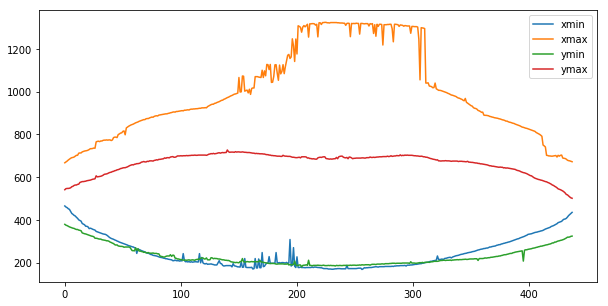

118 1374 130 777


aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_alignedTo_MD662&661-F115-2017.06.07-04.11.41_MD662_2_0344_prep5_cropbox.json" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_alignedTo_MD662&661-F115-2017.06.07-04.11.41_MD662_2_0344_prep5_cropbox.json"
return code: 255


In [292]:
# Generates a json file name something like: [stack]_alignedTo_[anchorname]_prep5_cropbox.json

# example contents: {"rostral_limit": 118, "ventral_limit": 777, "caudal_limit": 1374, "dorsal_limit": 130}

for stack in ['MD662']:
    
    bbox_all_images = []
    for fn in metadata_cache['valid_filenames_all'][stack]:
        mask_tb_alignedPadded = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn)
        bbox = bbox_2d(mask_tb_alignedPadded)
        bbox_all_images.append(bbox)
    bbox_all_images = np.array(bbox_all_images)

#     bbox_all_images = np.array([
#         bbox_2d(DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn))
#         for fn in metadata_cache['valid_filenames'][stack]
#     ])
    
    # Are the bounding boxes reasonable? If some numbers stand out, go back to check the mask.
    plt.figure(figsize=(10,5));
    plt.plot(bbox_all_images[:,0], label='xmin')
    plt.plot(bbox_all_images[:,1], label='xmax')
    plt.plot(bbox_all_images[:,2], label='ymin')
    plt.plot(bbox_all_images[:,3], label='ymax')
    plt.legend();
    plt.show();
    
    margin_um = 736
    margin = int(np.round(margin_um / convert_resolution_string_to_um(resolution=tb_resol, stack=stack)))
    alignedWithMargin_xmin, alignedWithMargin_ymin = np.maximum(bbox_all_images[:, [0,2]].min(axis=0) - margin, 0)
    alignedWithMargin_xmax, alignedWithMargin_ymax = np.minimum(bbox_all_images[:, [1,3]].max(axis=0) + margin, 
                                                                [mask_tb_alignedPadded.shape[1]-1, mask_tb_alignedPadded.shape[0]-1])
    
    print alignedWithMargin_xmin, alignedWithMargin_xmax, alignedWithMargin_ymin, alignedWithMargin_ymax 
    
    alignedWithMargin_cropbox = {'rostral_limit': alignedWithMargin_xmin, 'caudal_limit': alignedWithMargin_xmax, 
 'dorsal_limit': alignedWithMargin_ymin, 'ventral_limit': alignedWithMargin_ymax}
    
    save_data(alignedWithMargin_cropbox, 
              DataManager.get_cropbox_filename_v2(stack=stack, anchor_fn=None, prep_id='alignedWithMargin'))

In [ ]:
# metadata_cache['valid_filenames'][stack][np.where(bbox_all_images[:,2] < 60)[0][0]]

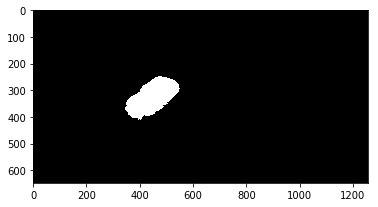

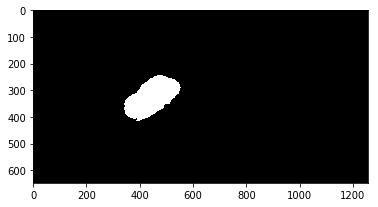

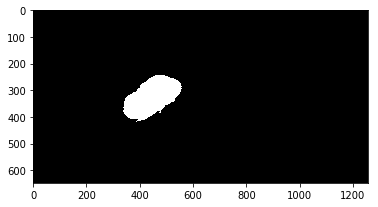

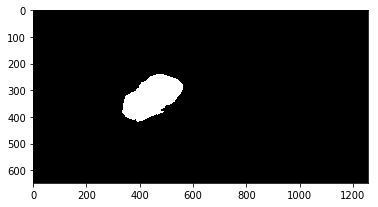

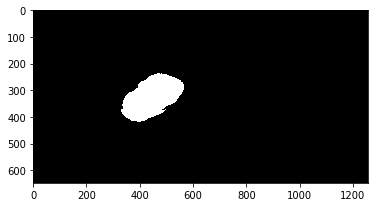

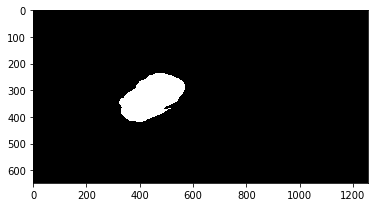

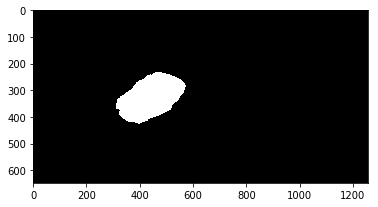

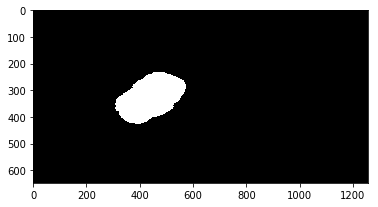

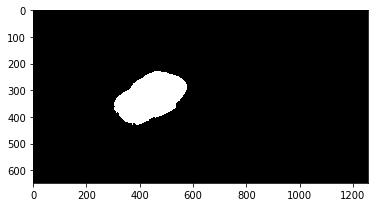

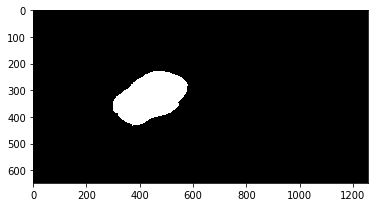

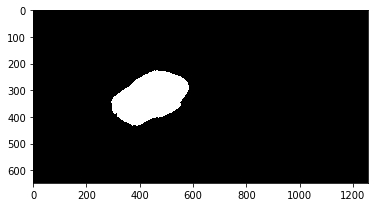

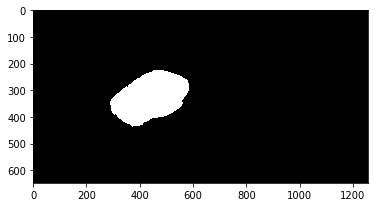

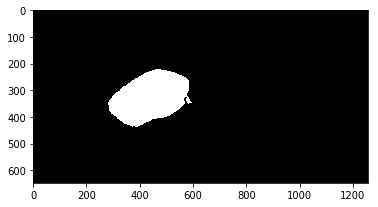

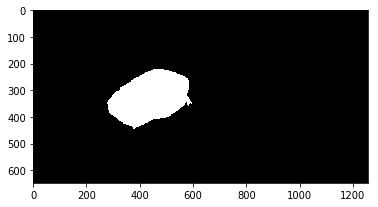

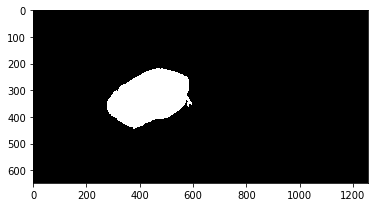

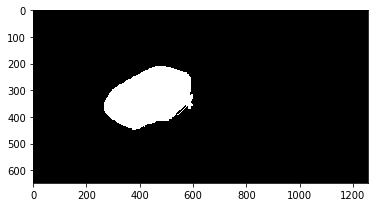

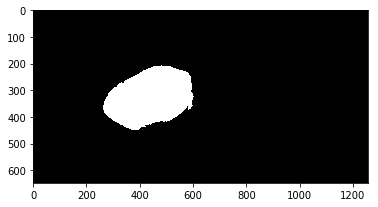

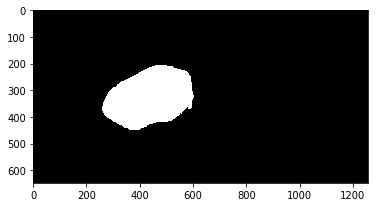

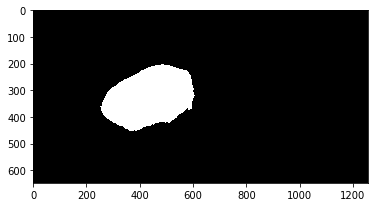

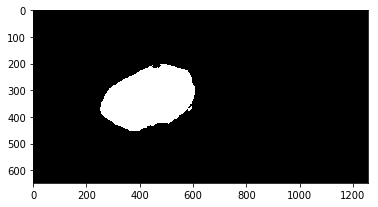

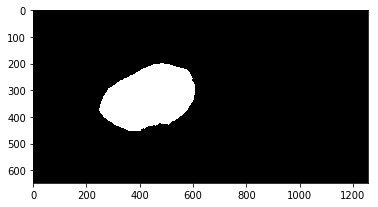

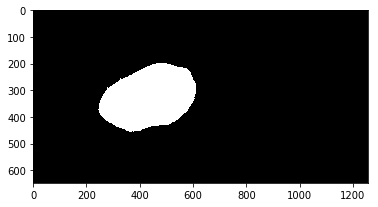

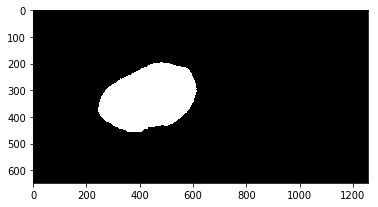

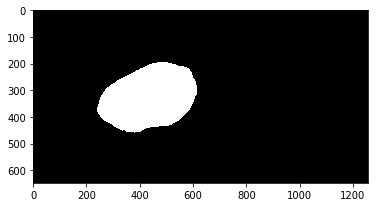

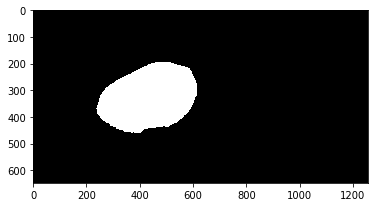

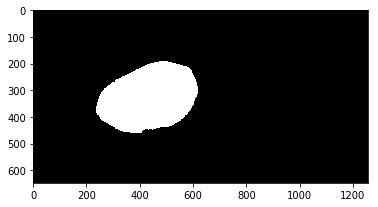

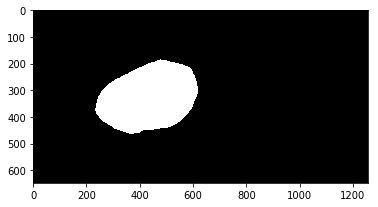

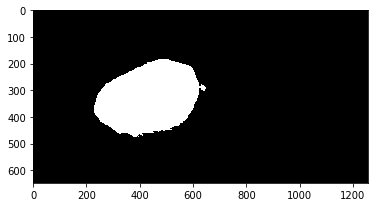

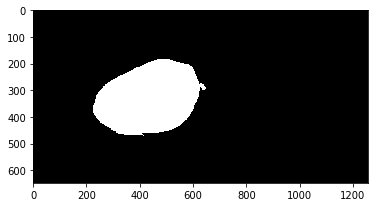

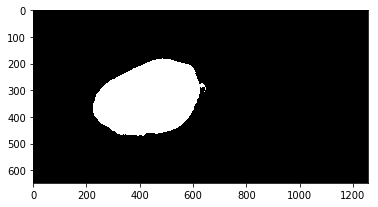

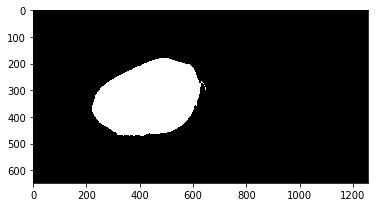

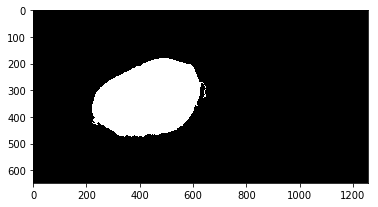

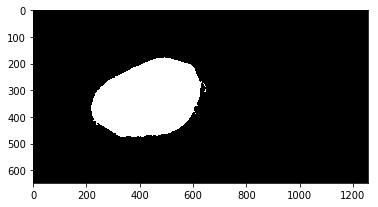

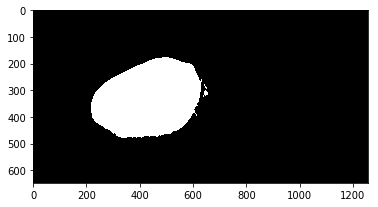

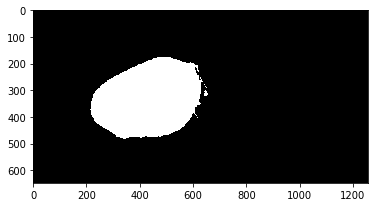

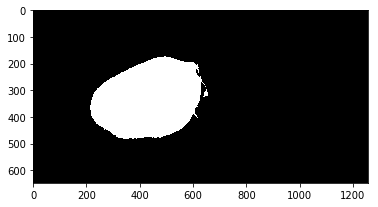

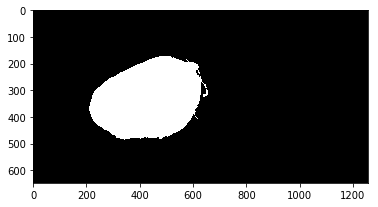

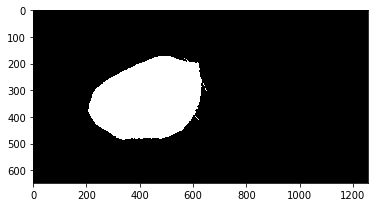

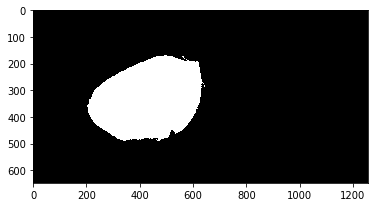

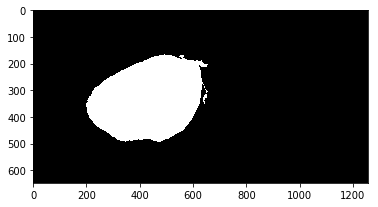

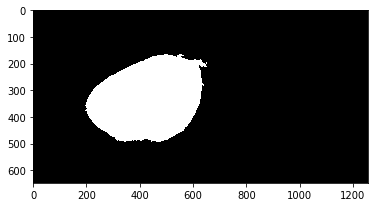

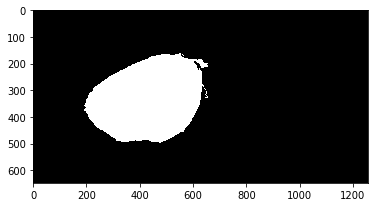

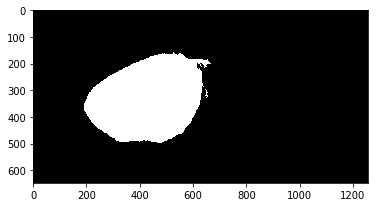

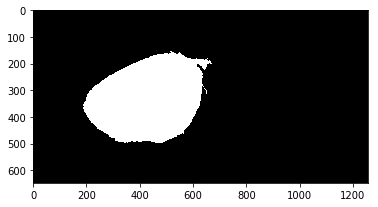

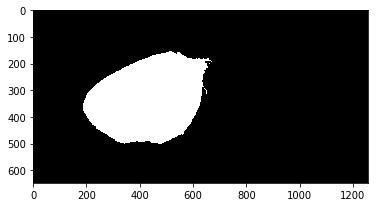

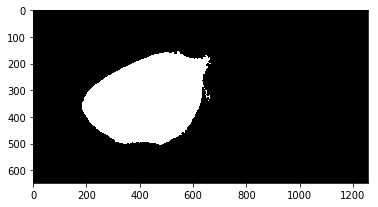

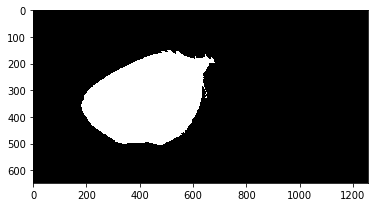

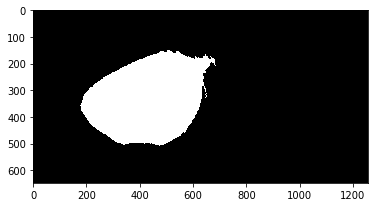

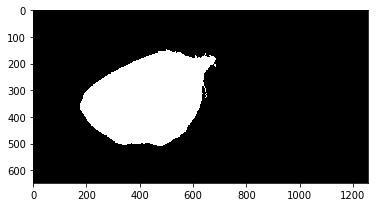

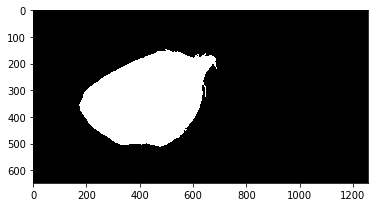

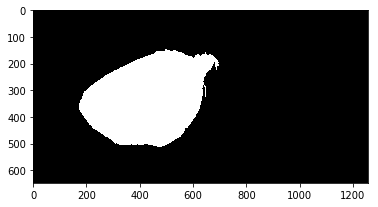

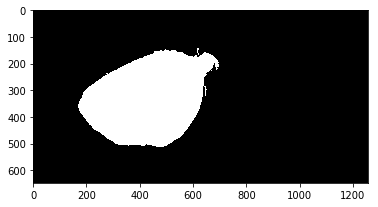

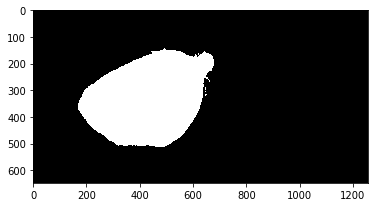

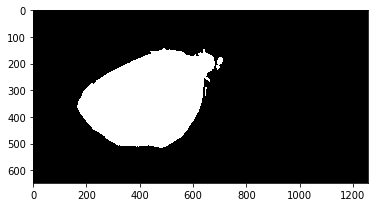

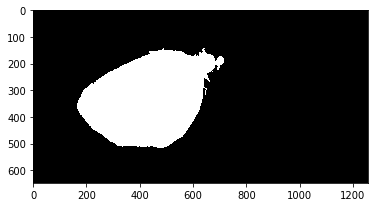

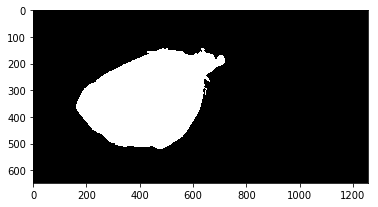

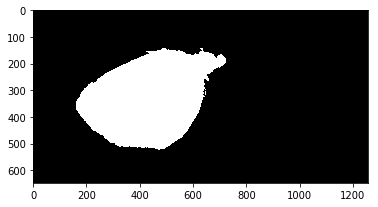

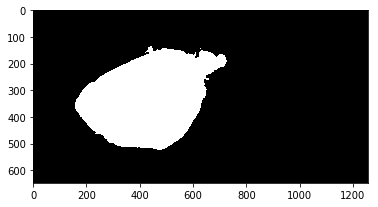

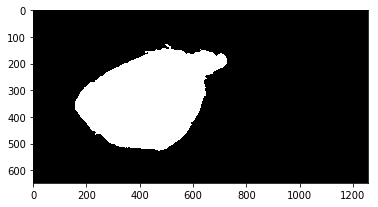

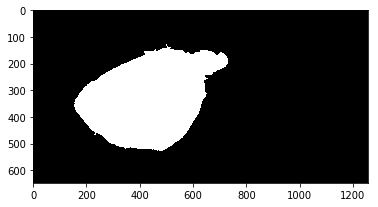

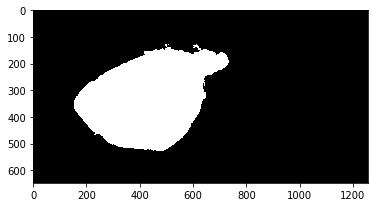

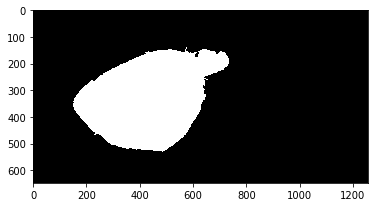

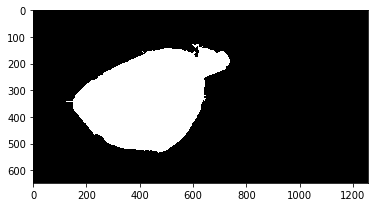

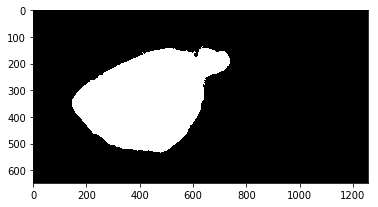

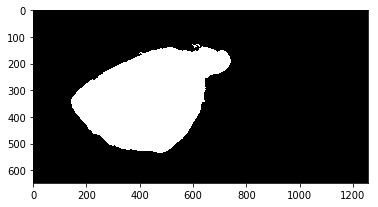

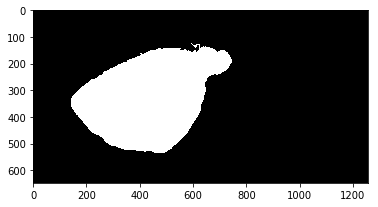

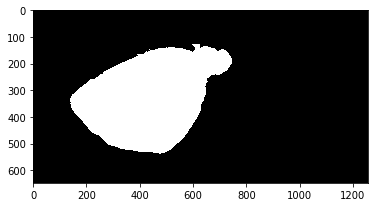

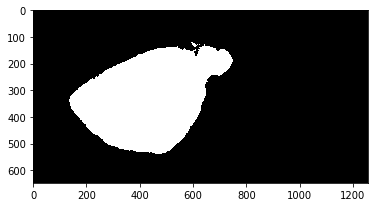

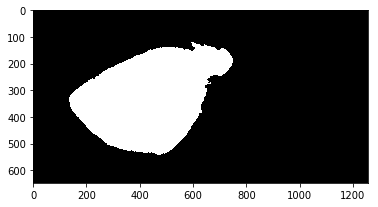

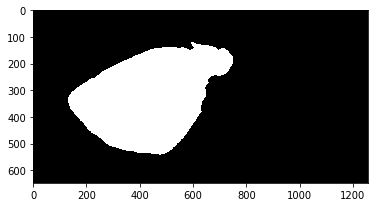

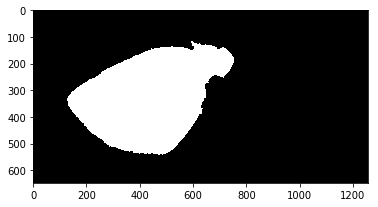

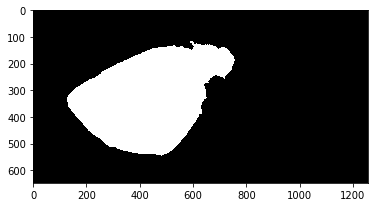

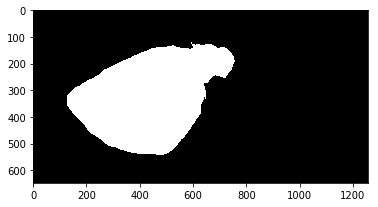

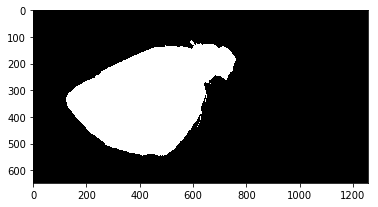

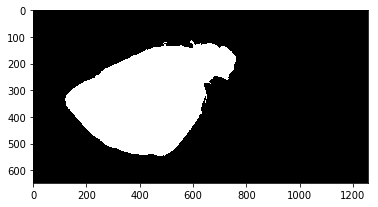

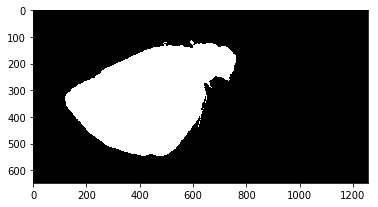

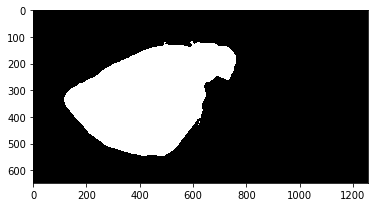

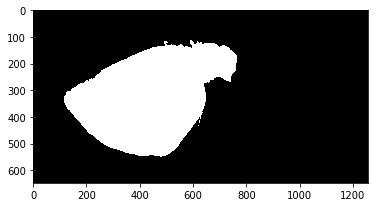

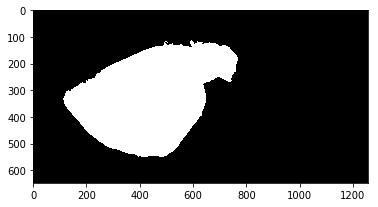

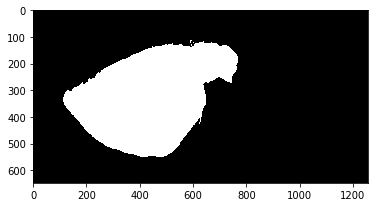

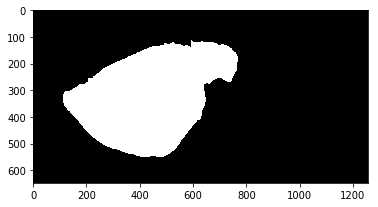

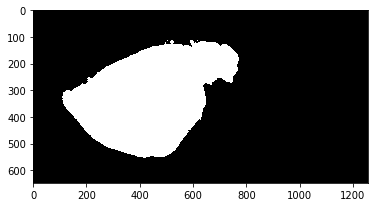

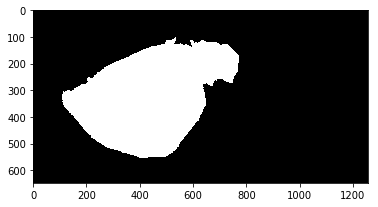

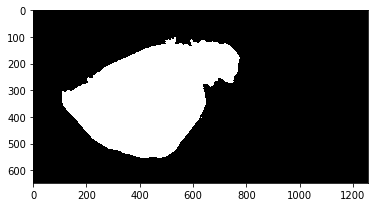

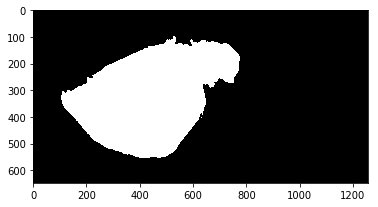

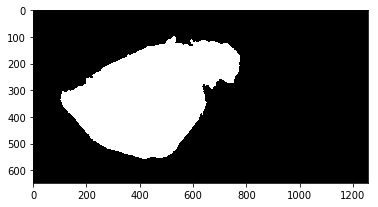

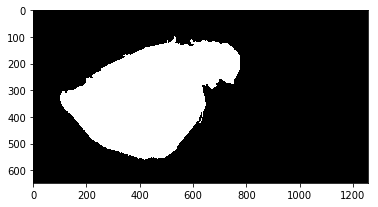

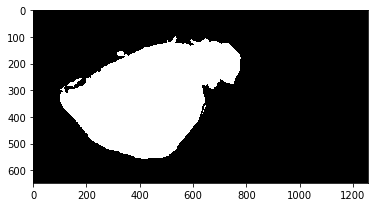

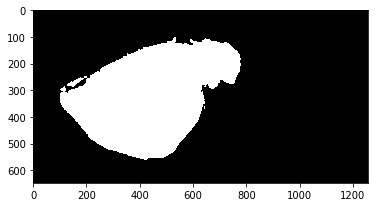

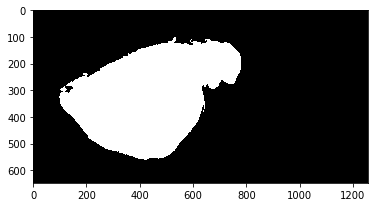

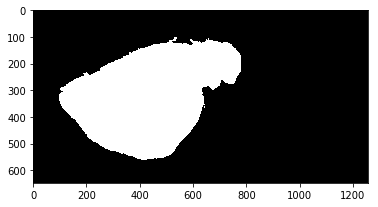

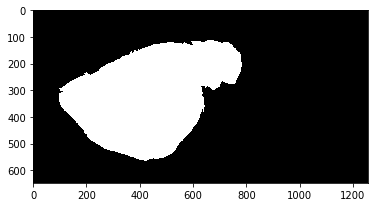

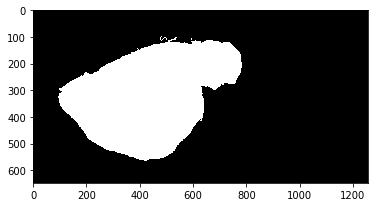

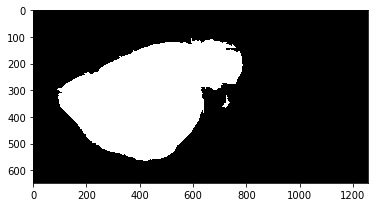

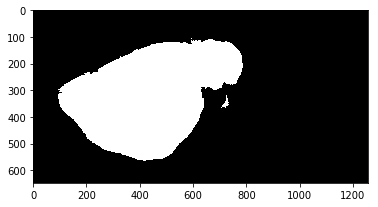

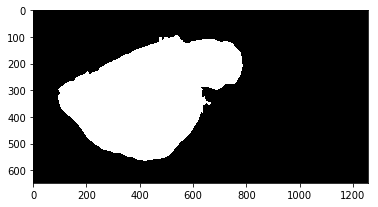

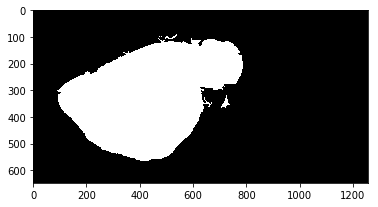

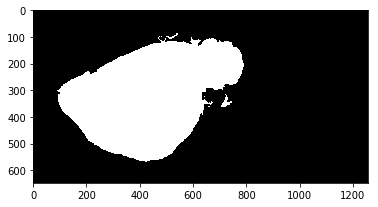

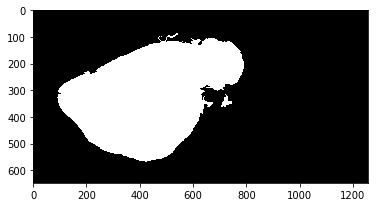

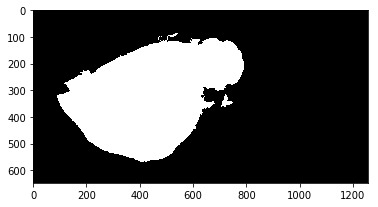

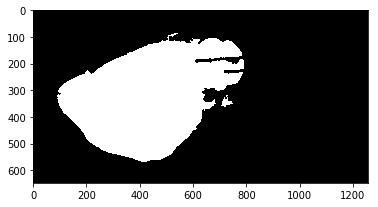

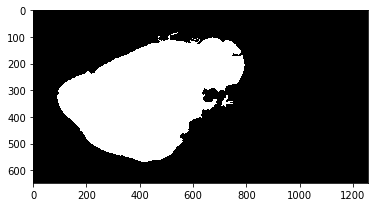

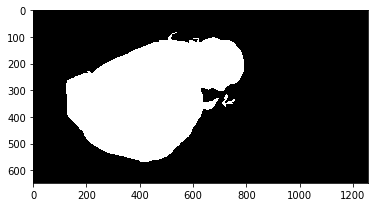

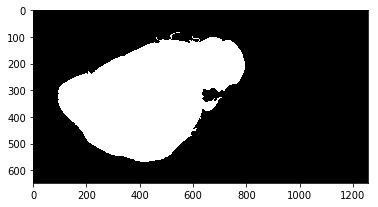

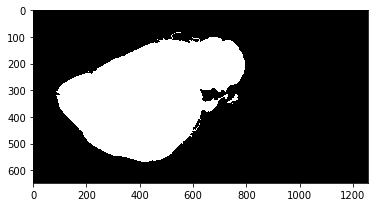

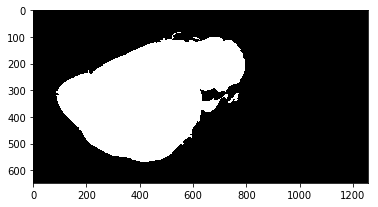

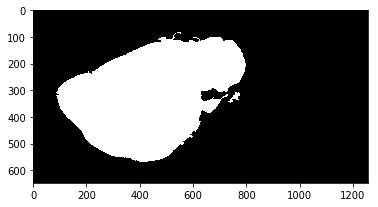

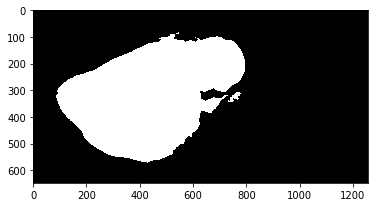

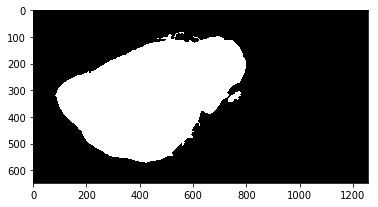

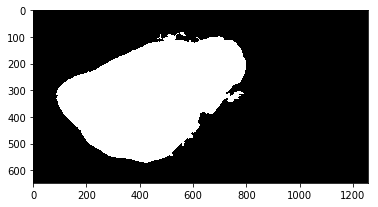

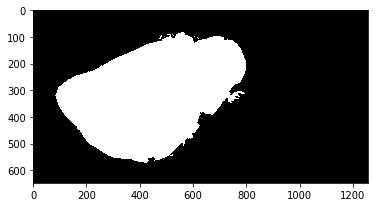

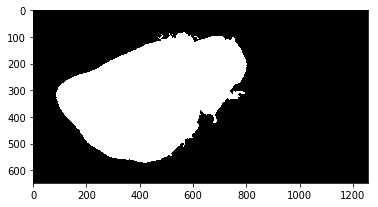

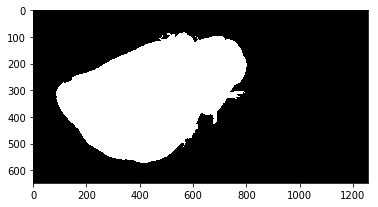

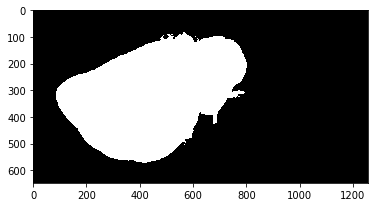

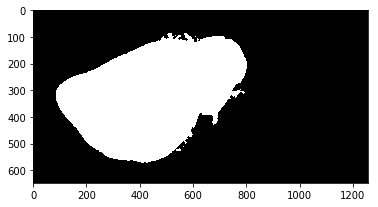

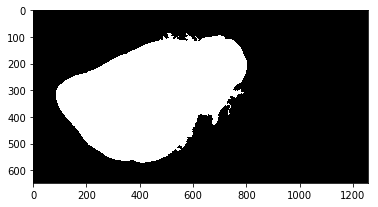

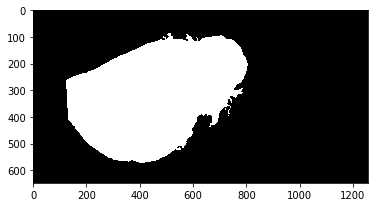

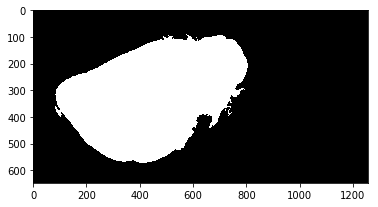

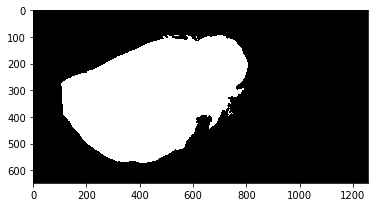

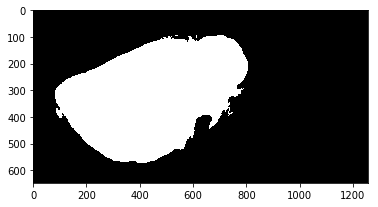

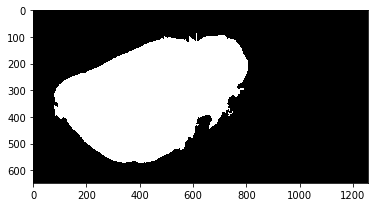

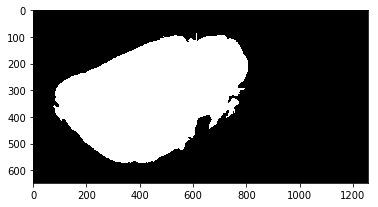

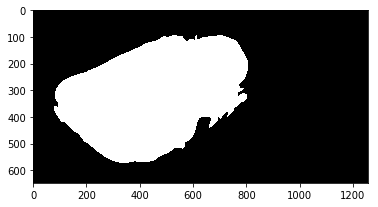

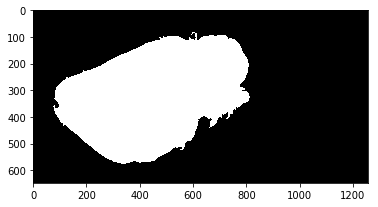

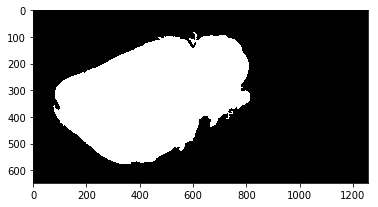

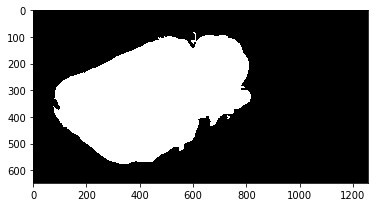

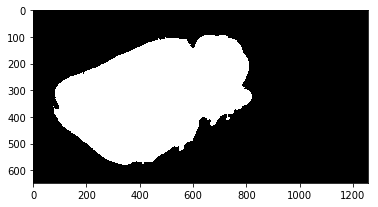

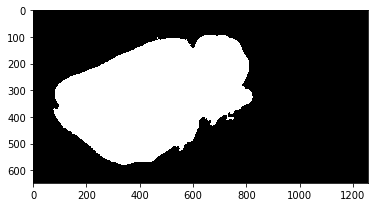

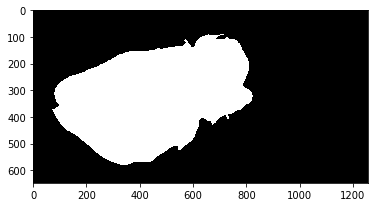

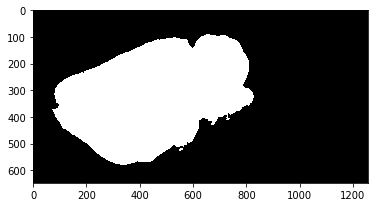

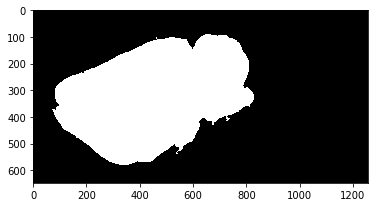

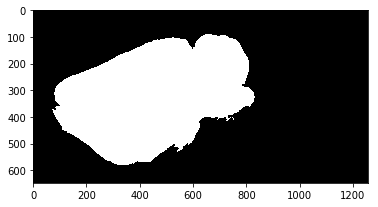

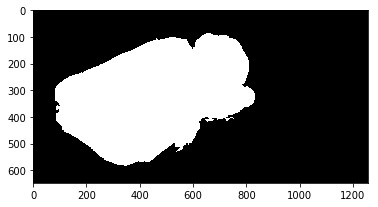

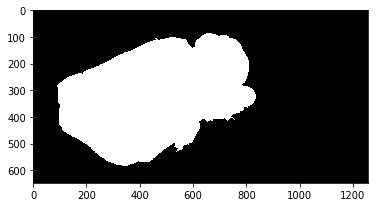

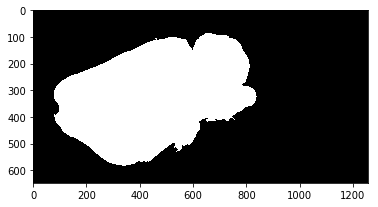

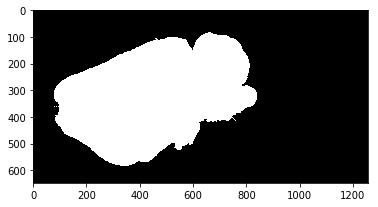

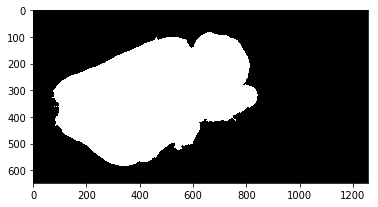

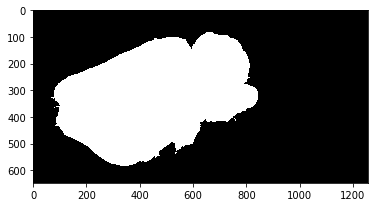

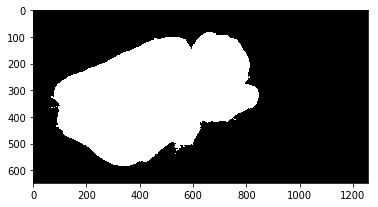

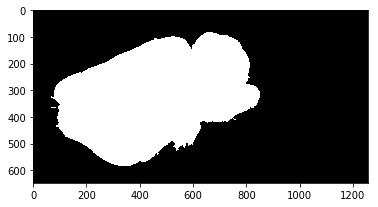

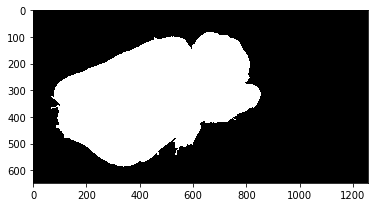

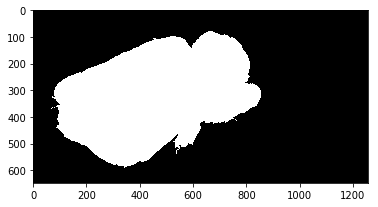

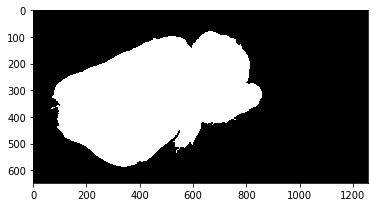

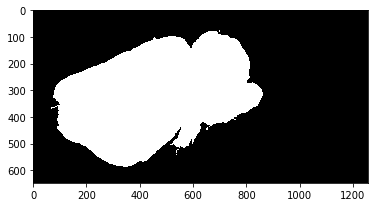

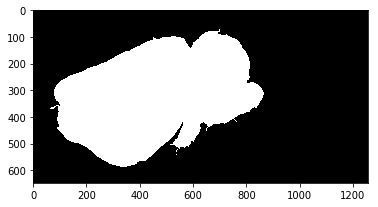

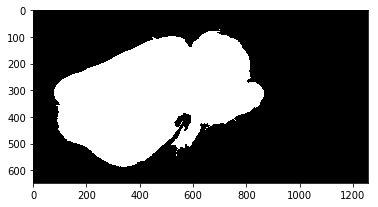

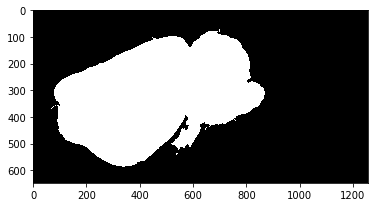

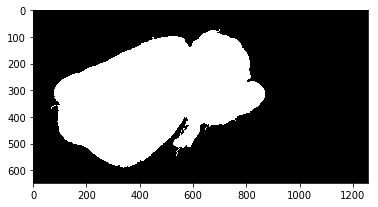

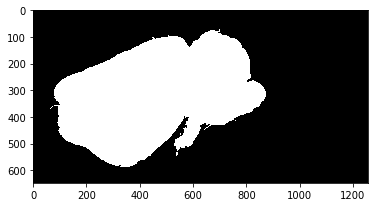

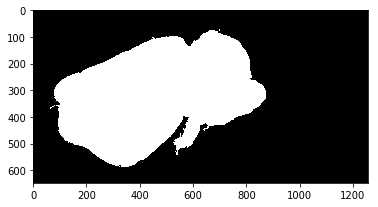

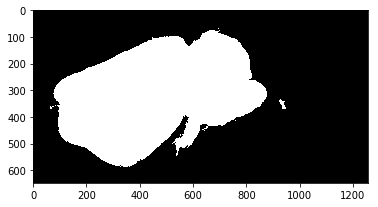

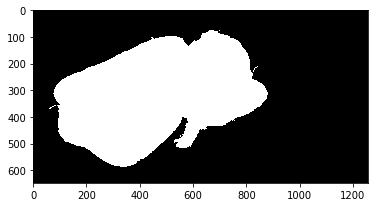

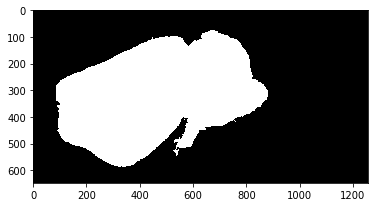

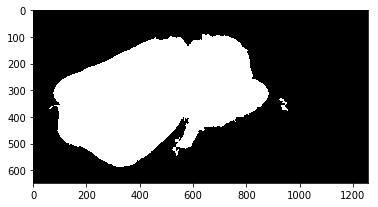

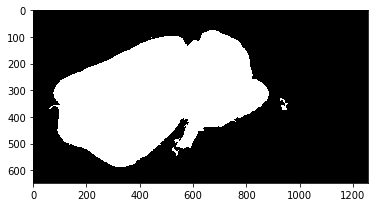

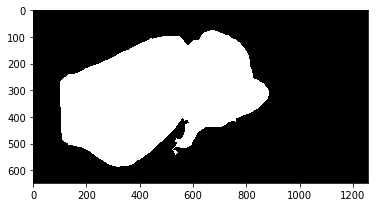

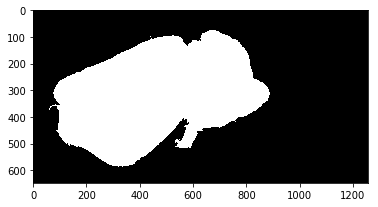

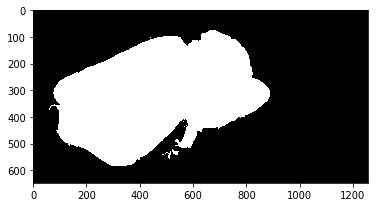

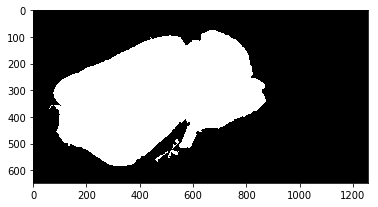

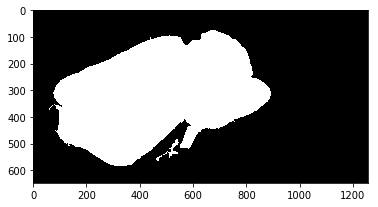

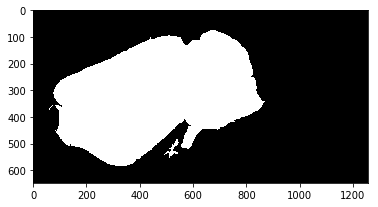

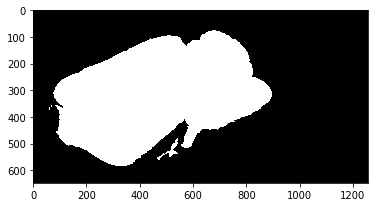

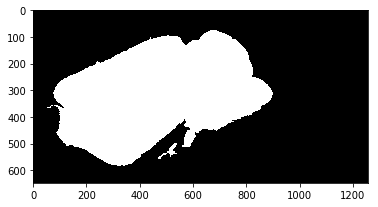

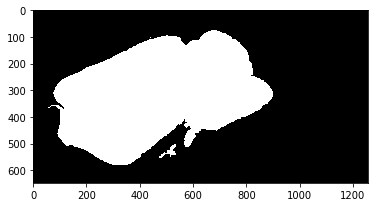

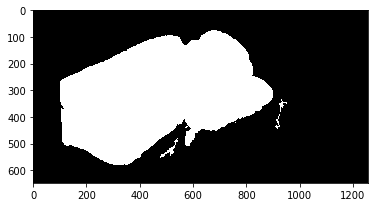

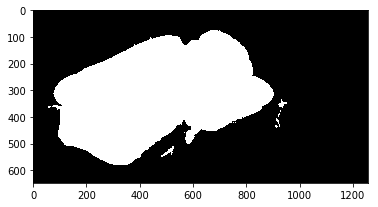

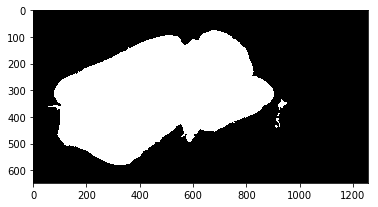

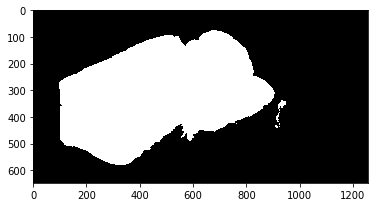

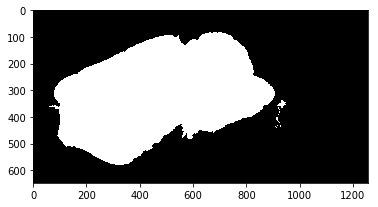

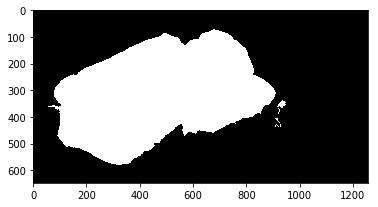

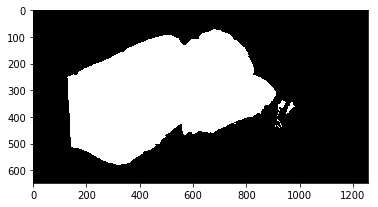

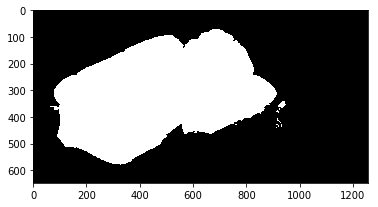

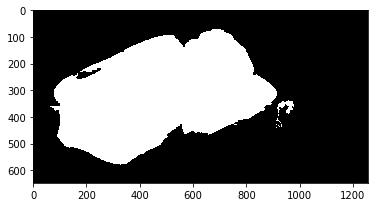

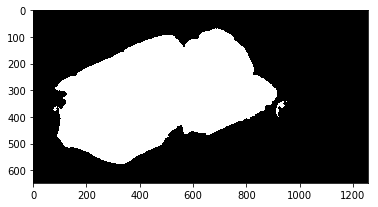

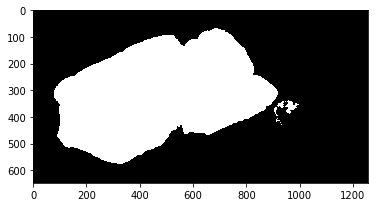

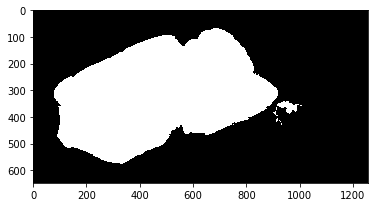

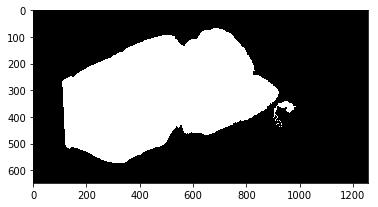

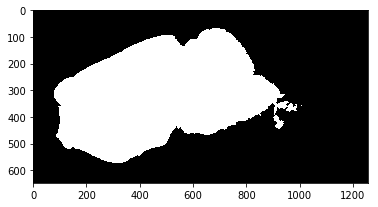

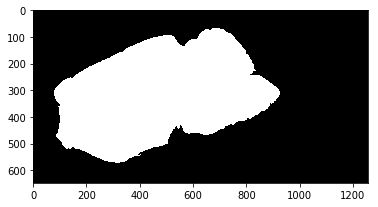

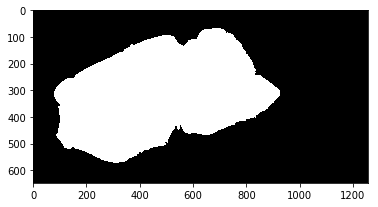

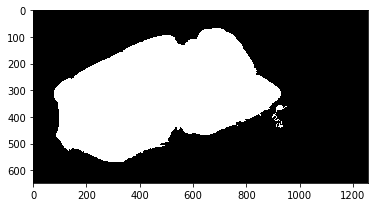

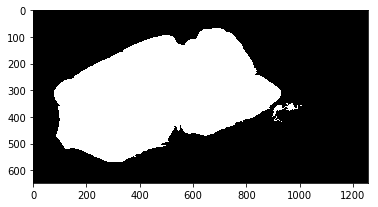

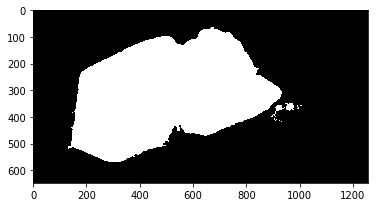

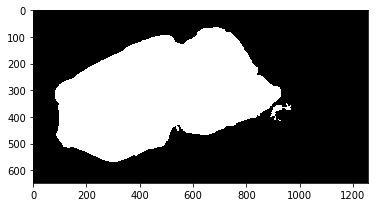

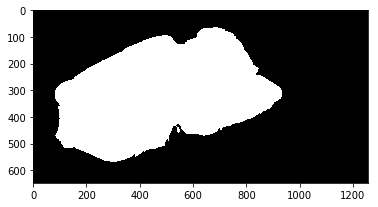

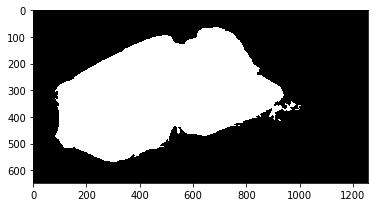

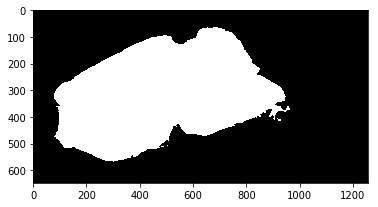

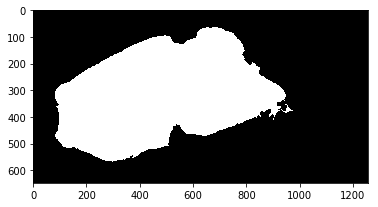

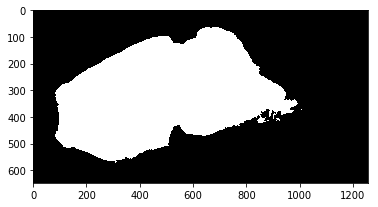

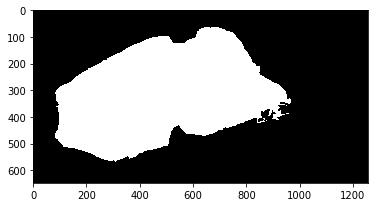

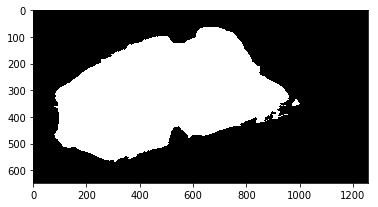

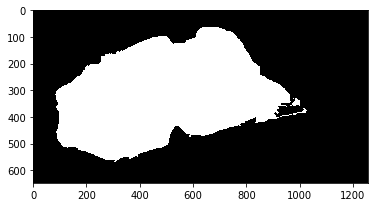

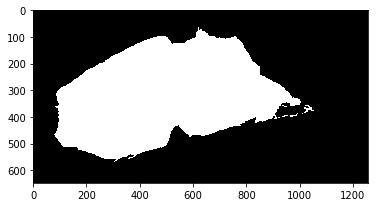

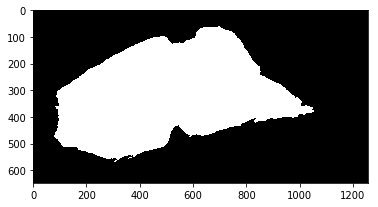

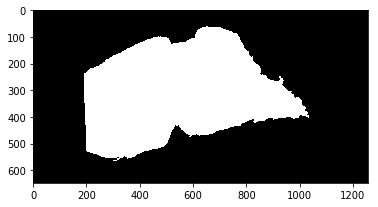

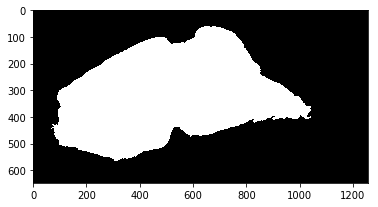

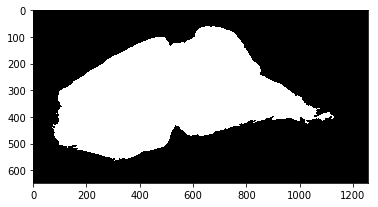

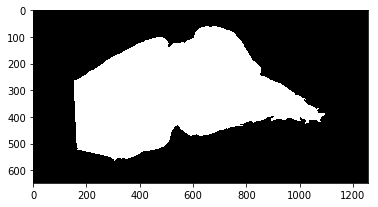

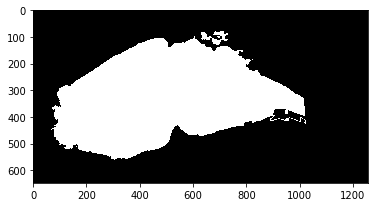

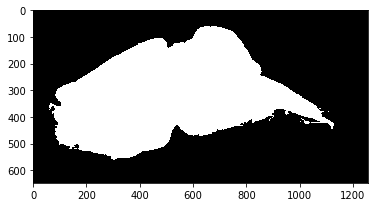

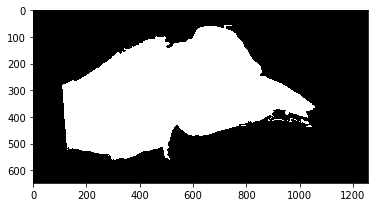

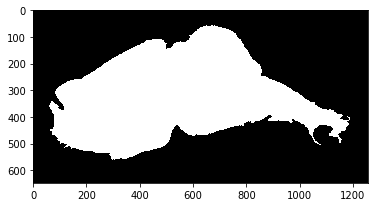

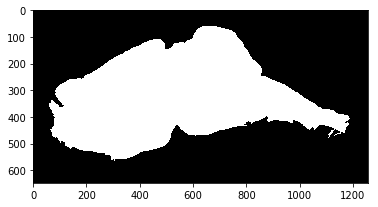

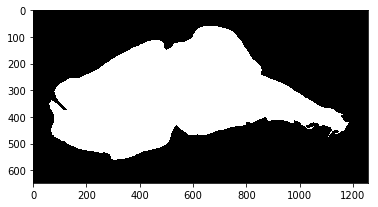

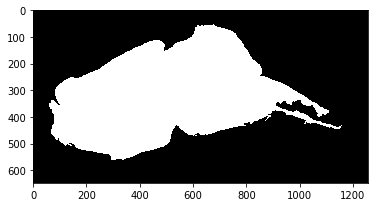

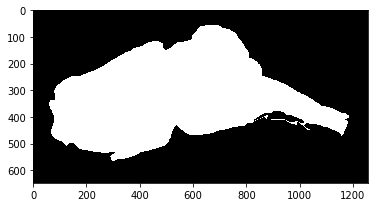

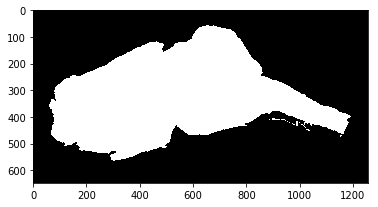

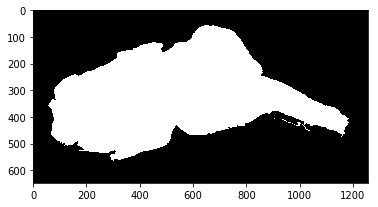

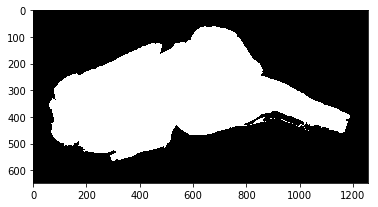

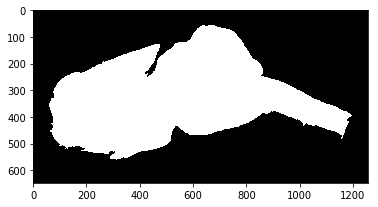

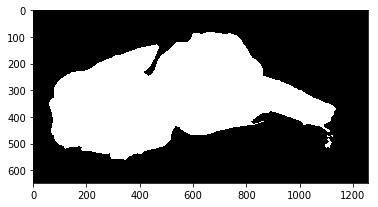

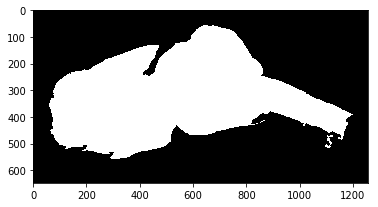

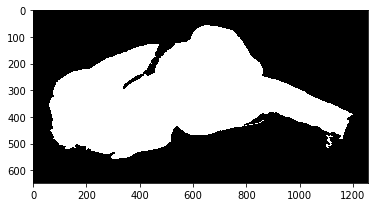

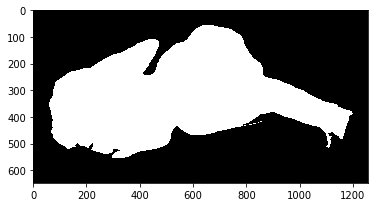

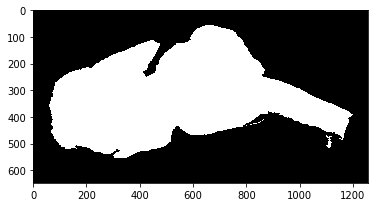

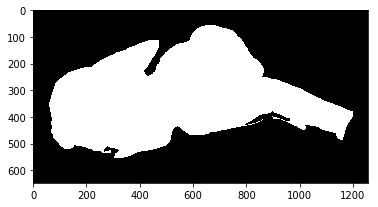

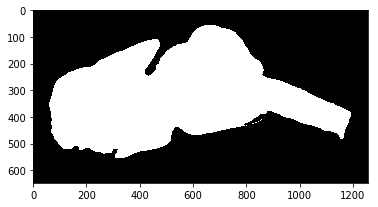

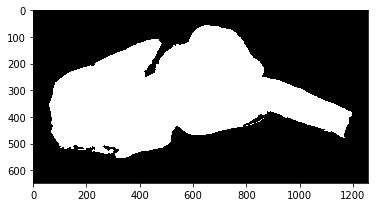

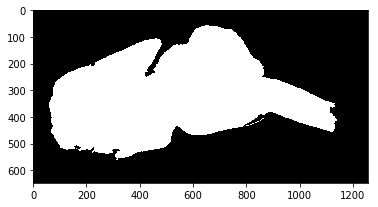

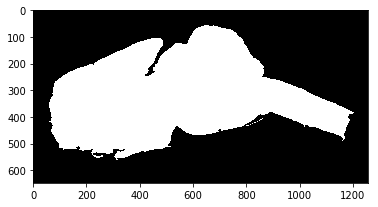

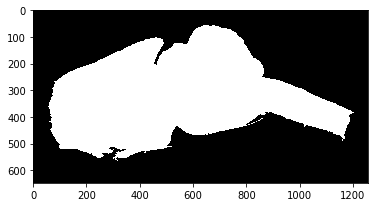

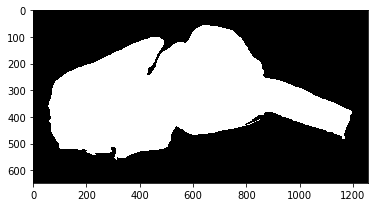

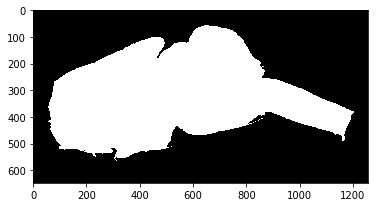

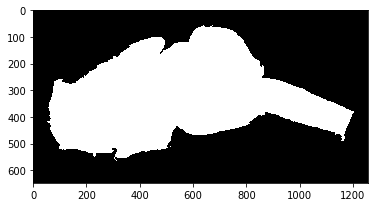

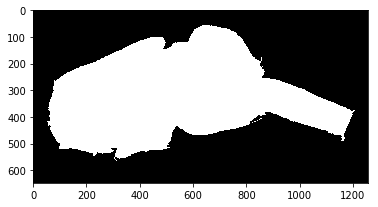

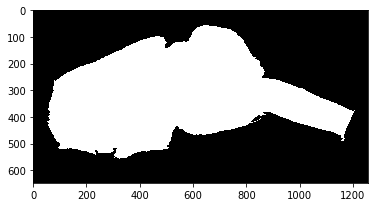

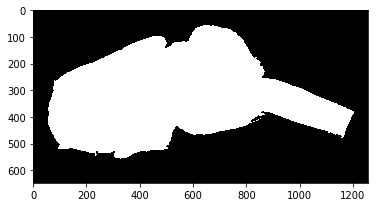

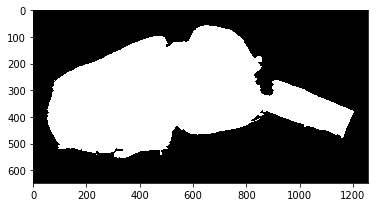

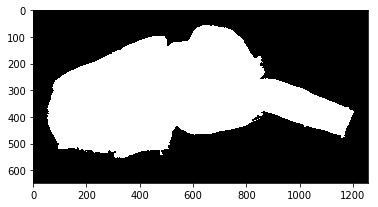

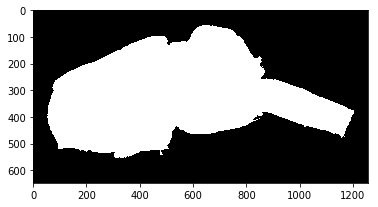

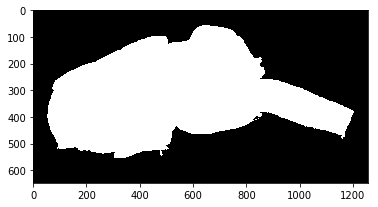

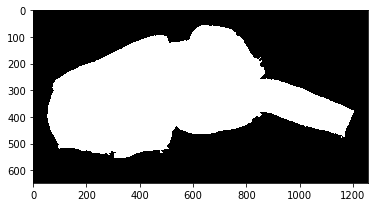

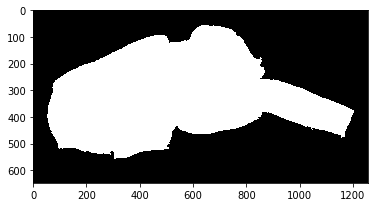

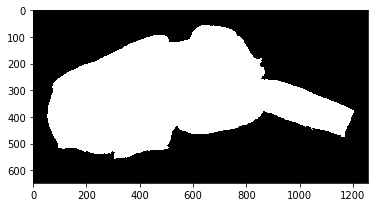

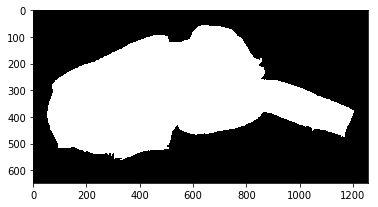

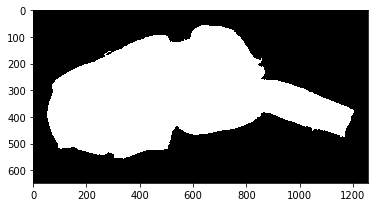

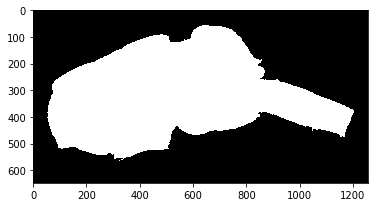

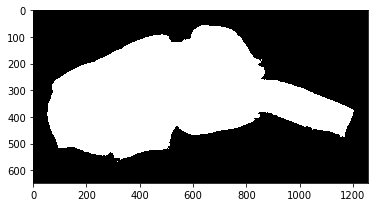

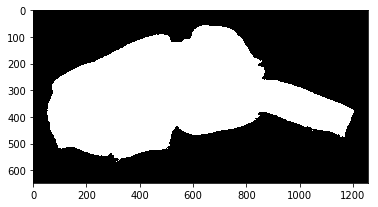

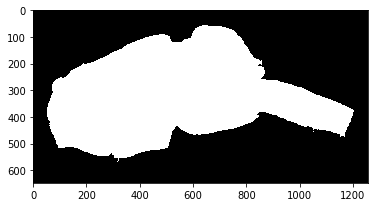

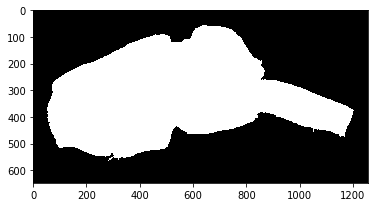

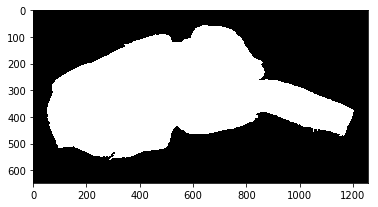

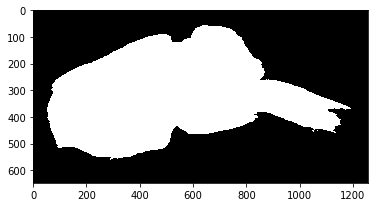

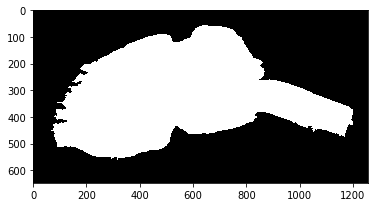

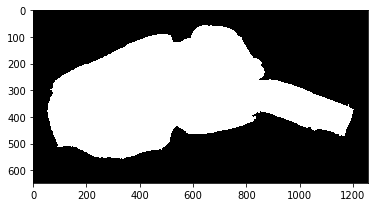

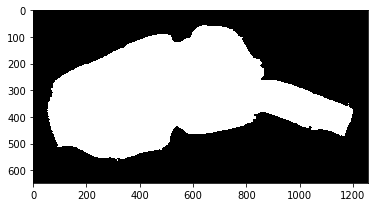

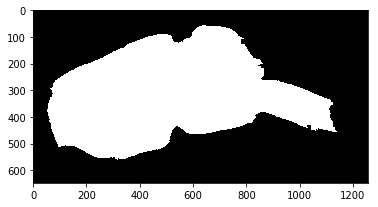

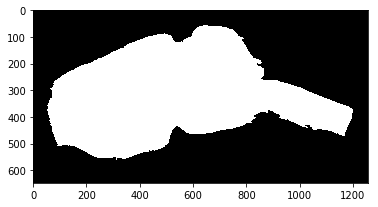

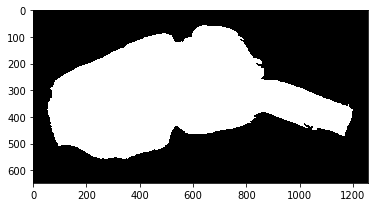

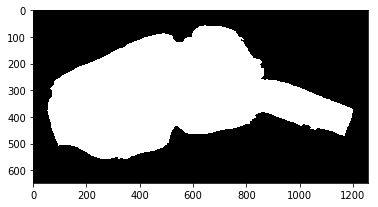

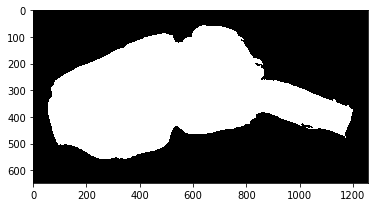

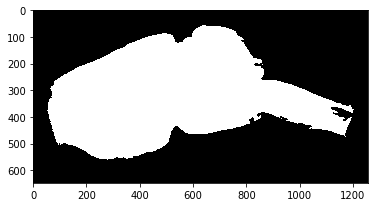

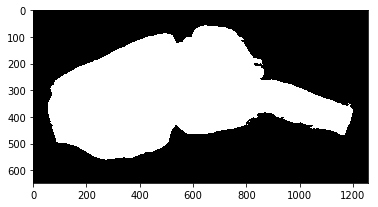

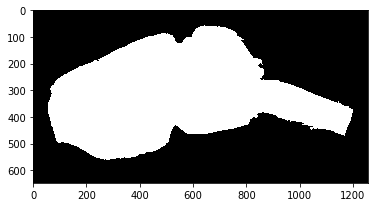

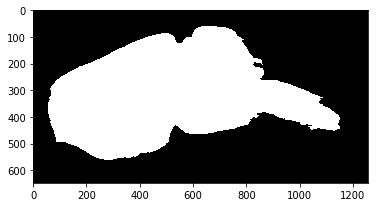

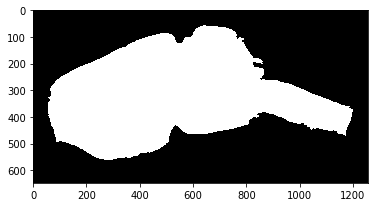

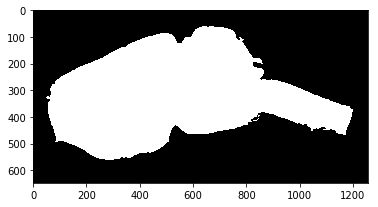

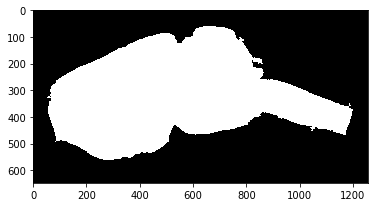

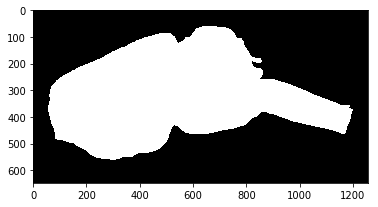

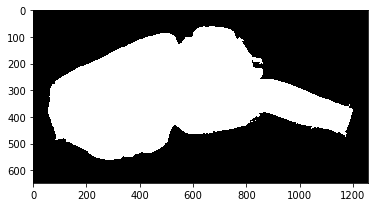

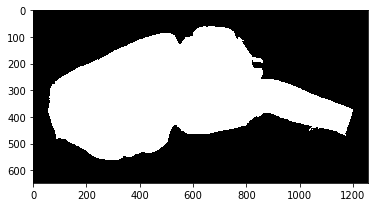

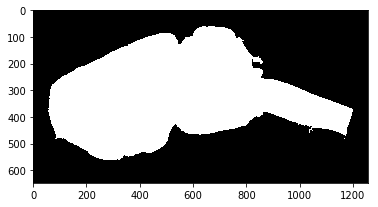

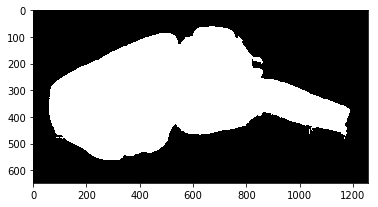

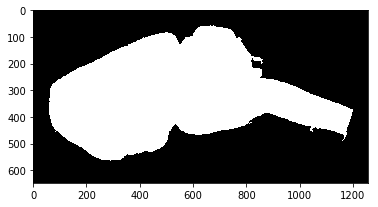

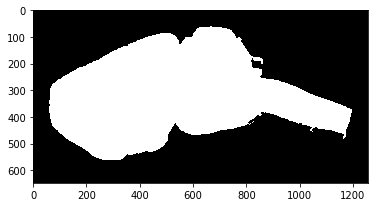

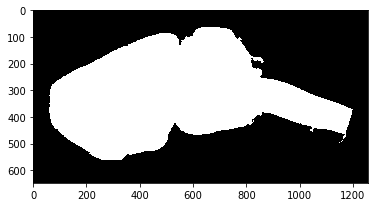

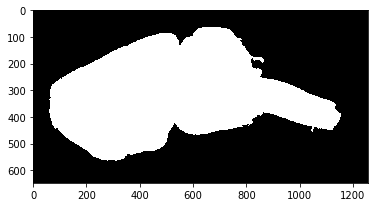

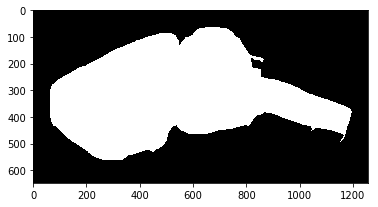

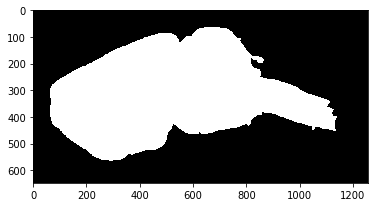

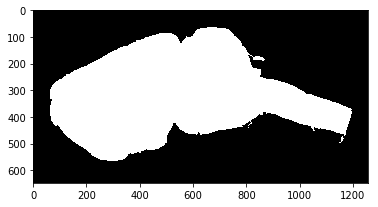

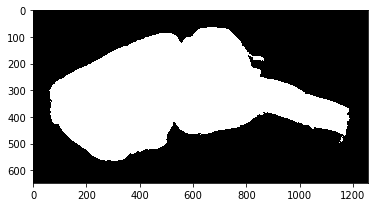

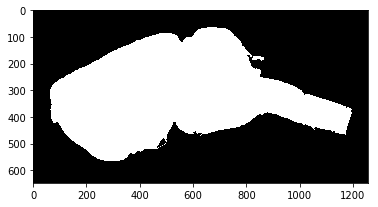

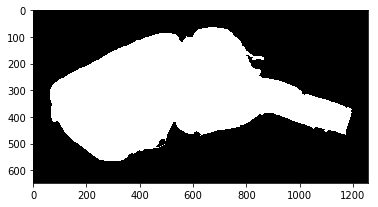

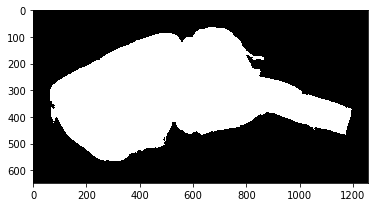

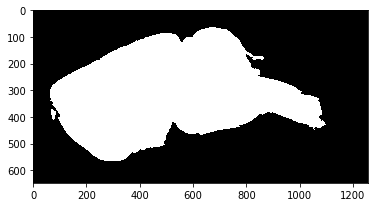

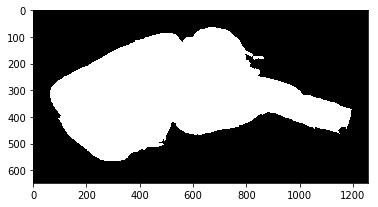

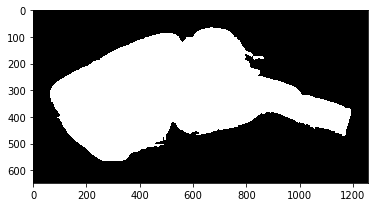

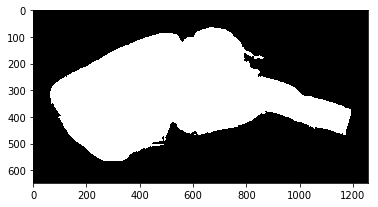

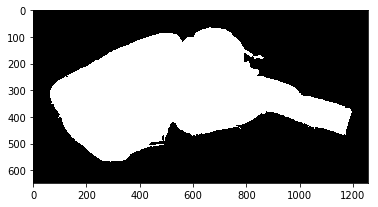

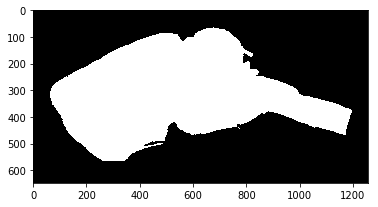

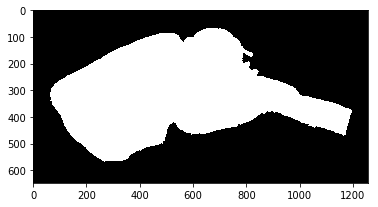

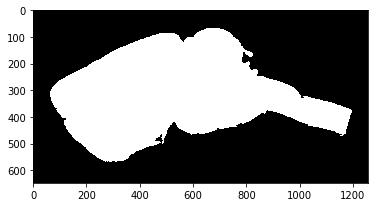

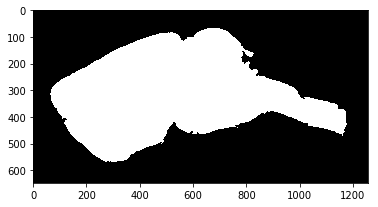

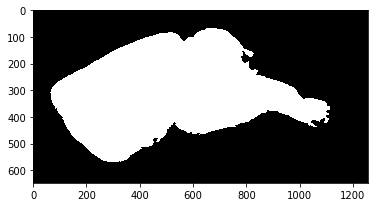

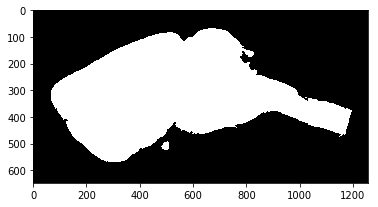

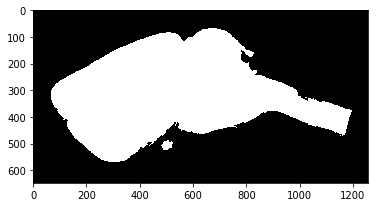

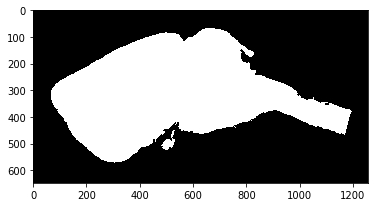

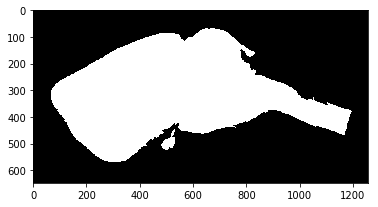

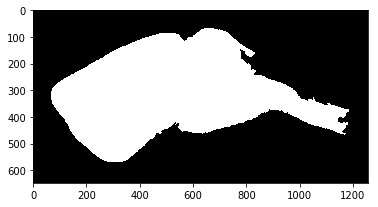

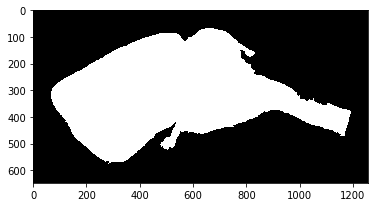

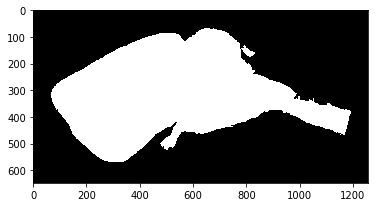

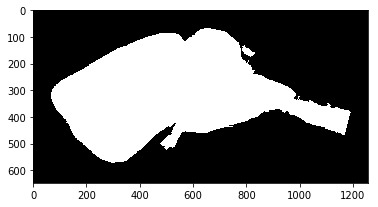

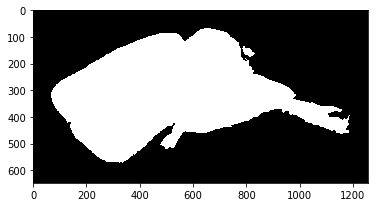

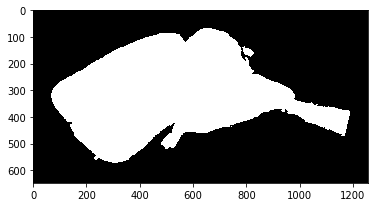

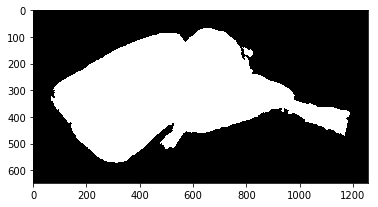

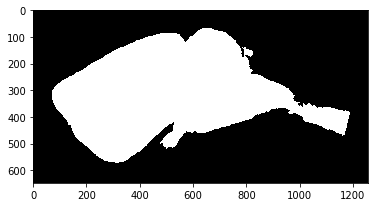

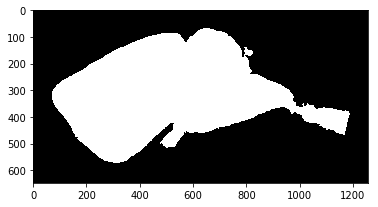

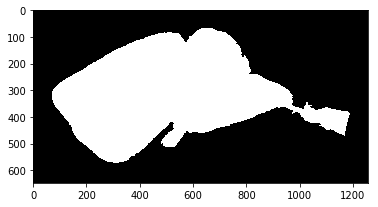

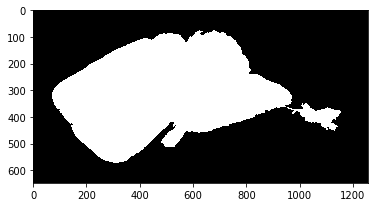

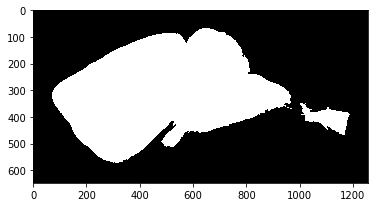

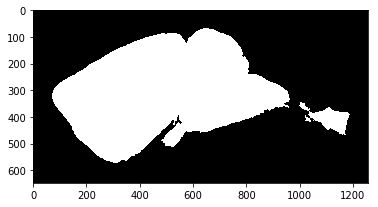

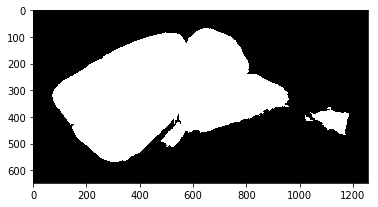

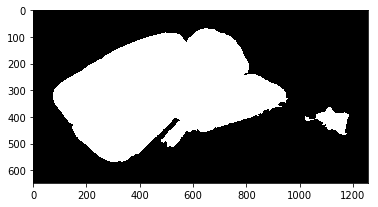

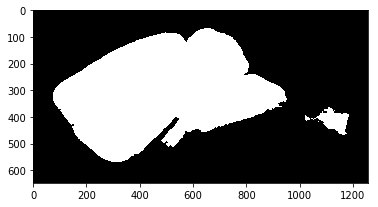

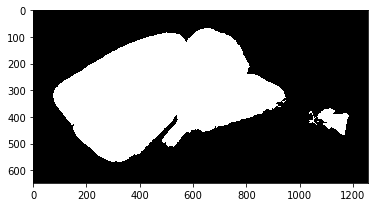

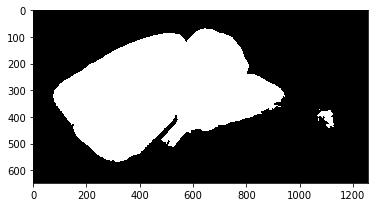

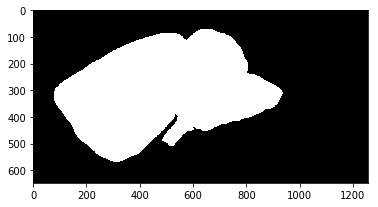

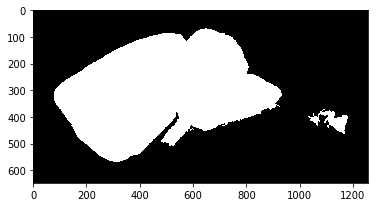

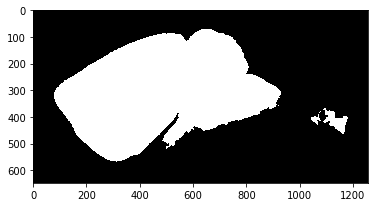

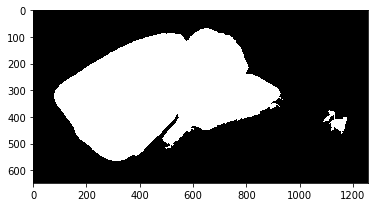

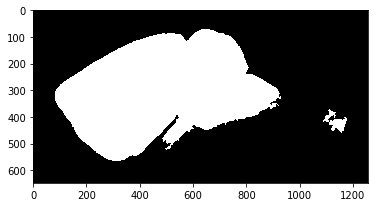

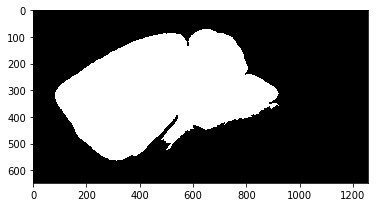

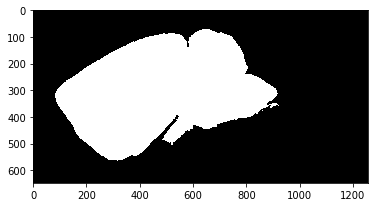

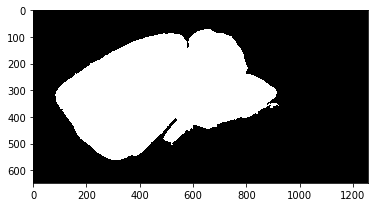

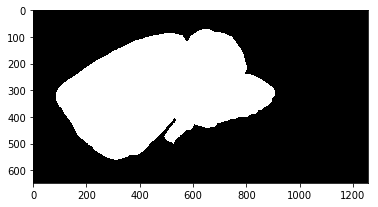

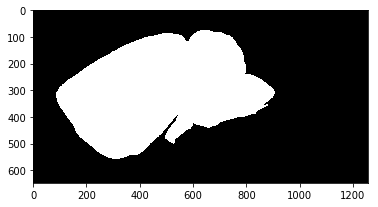

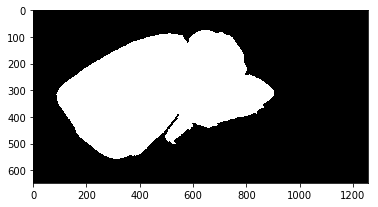

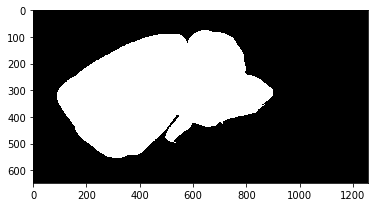

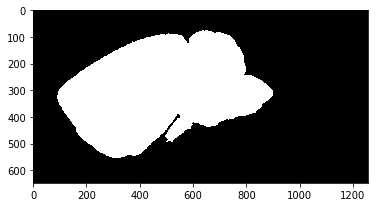

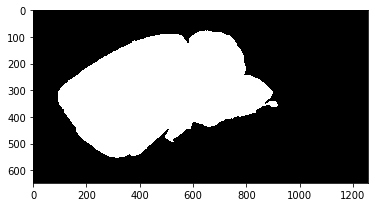

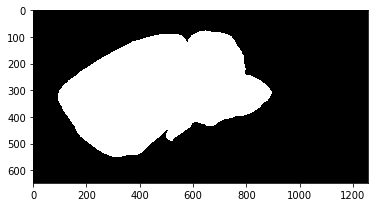

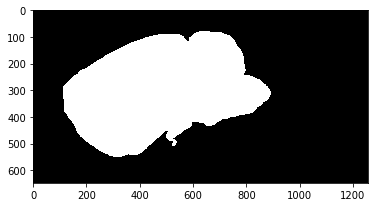

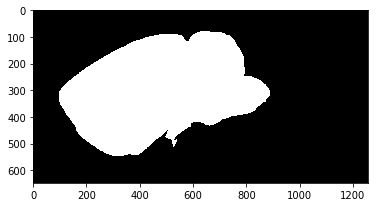

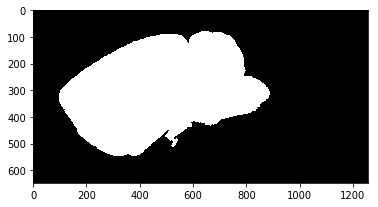

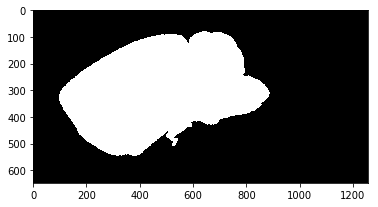

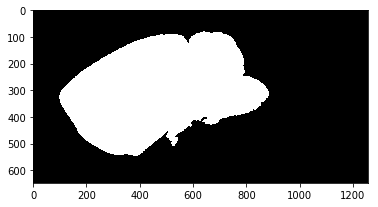

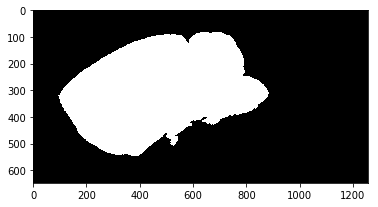

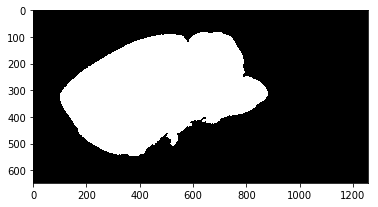

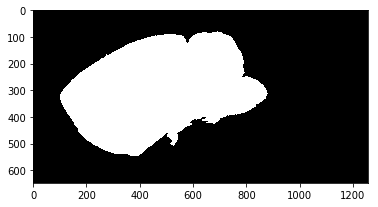

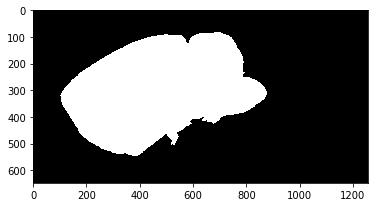

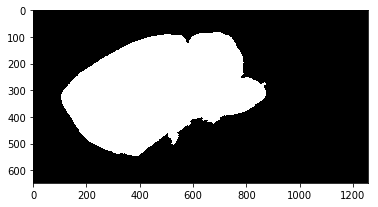

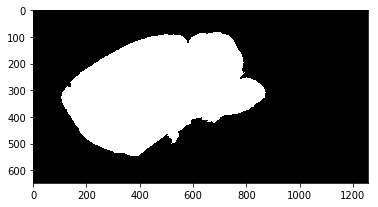

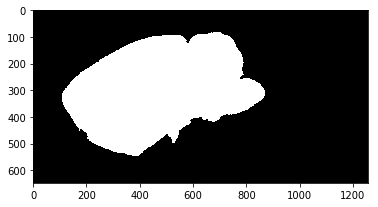

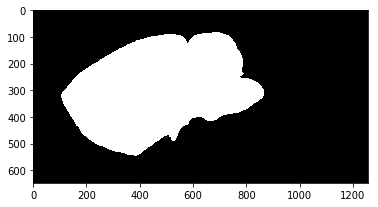

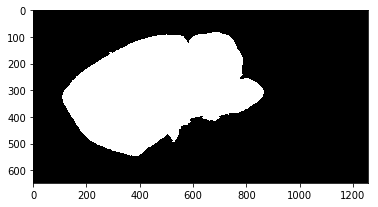

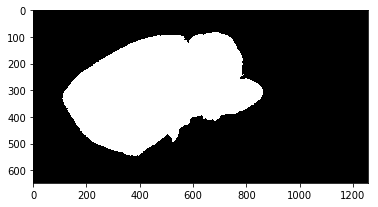

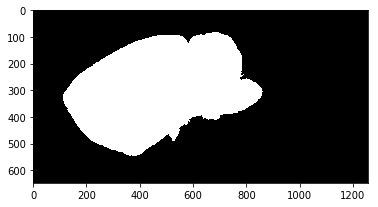

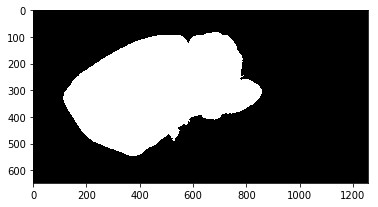

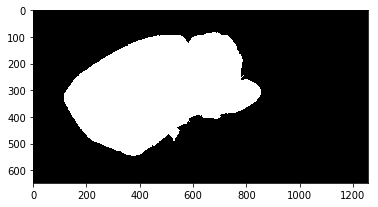

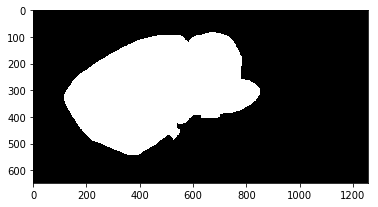

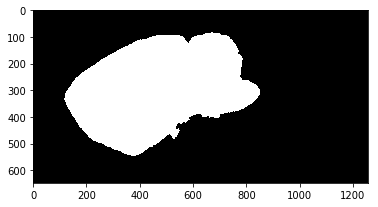

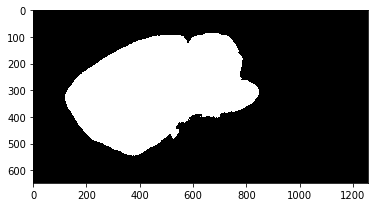

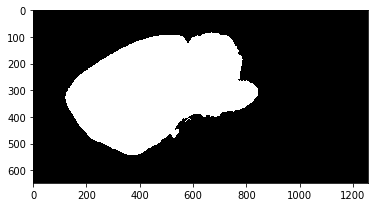

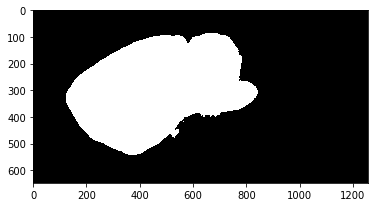

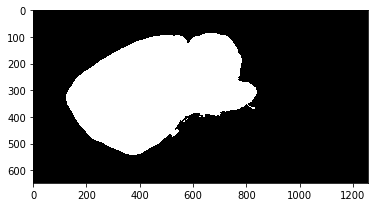

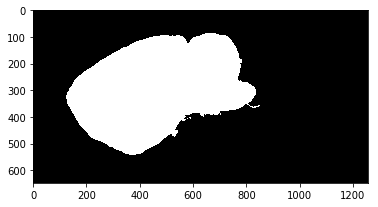

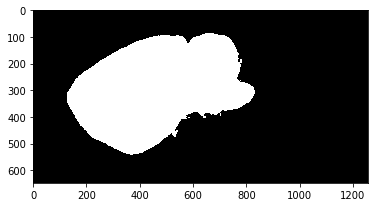

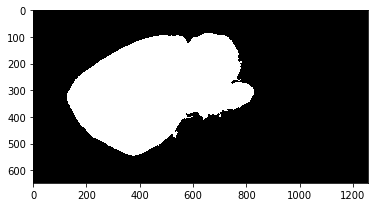

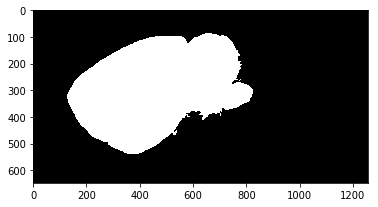

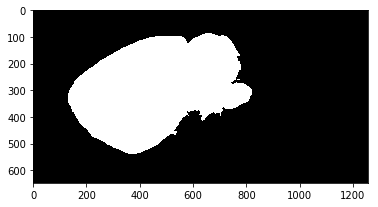

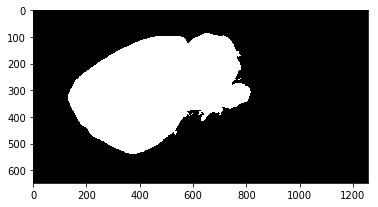

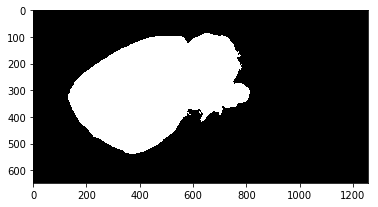

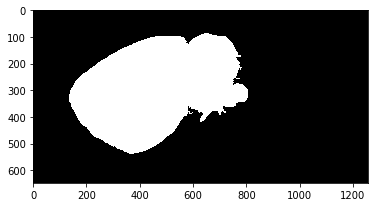

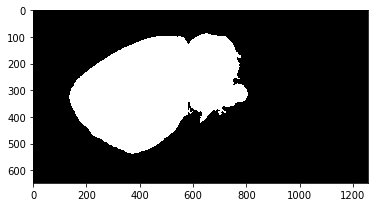

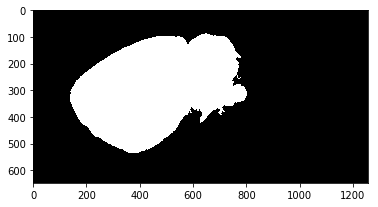

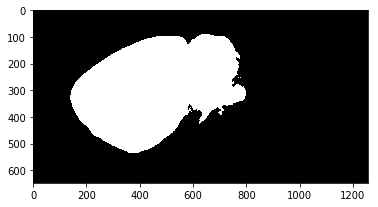

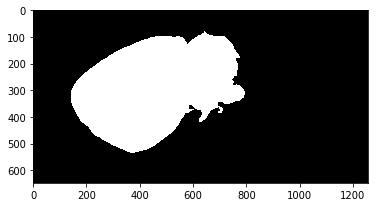

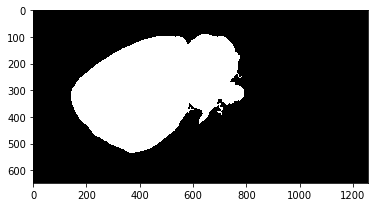

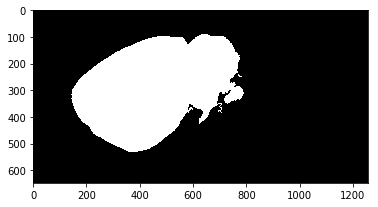

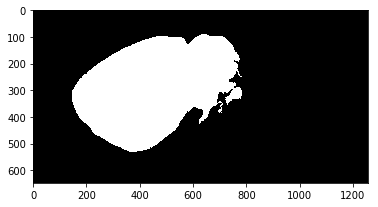

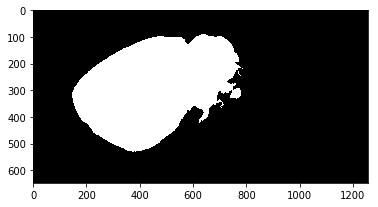

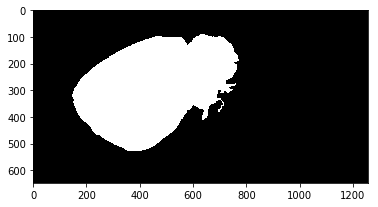

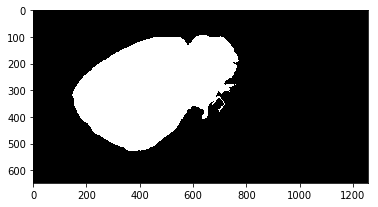

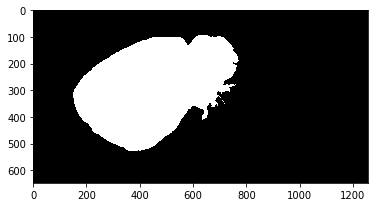

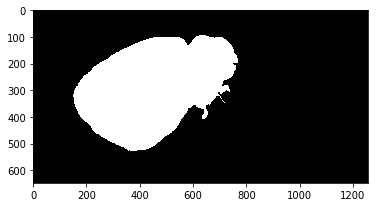

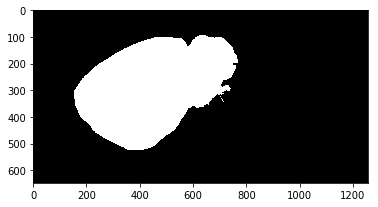

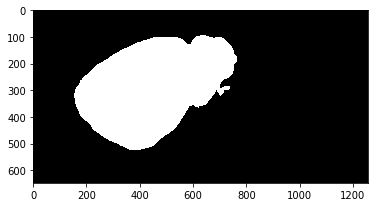

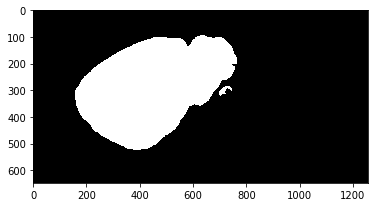

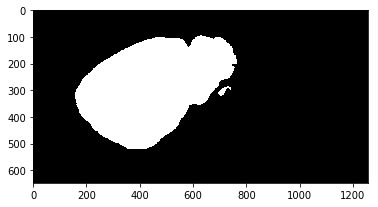

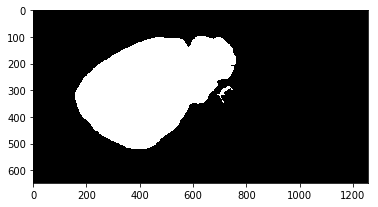

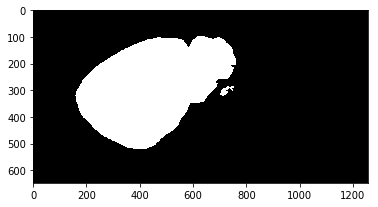

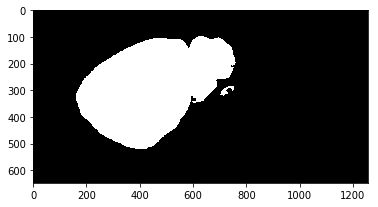

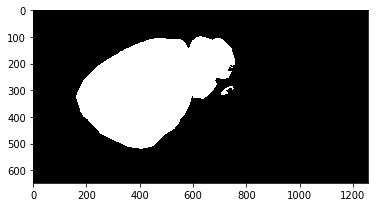

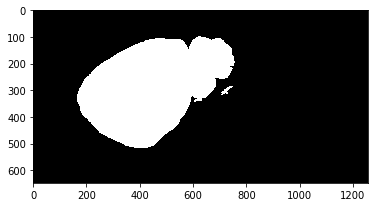

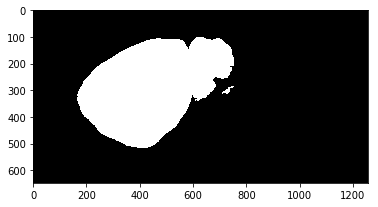

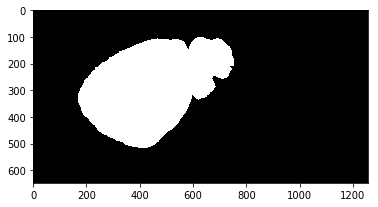

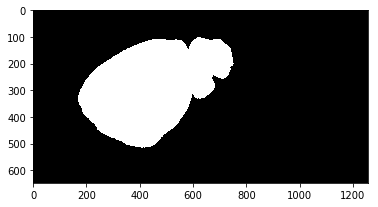

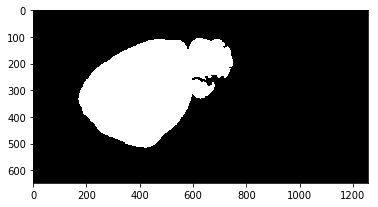

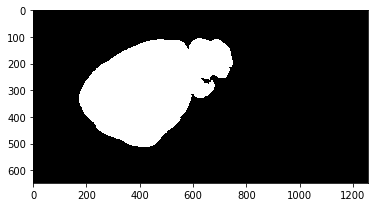

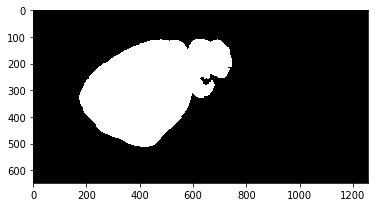

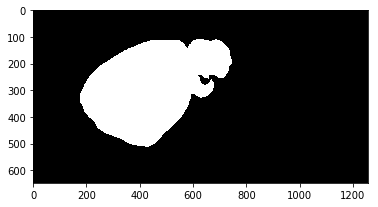

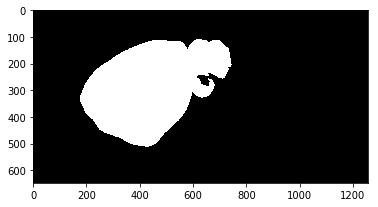

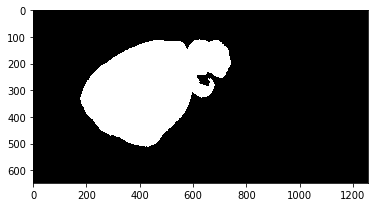

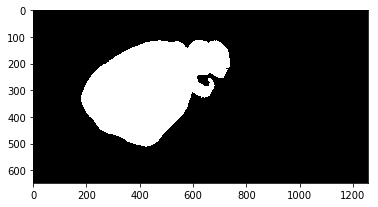

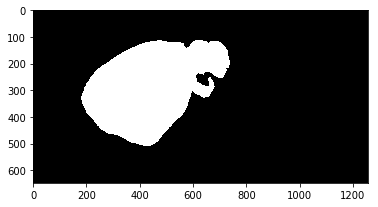

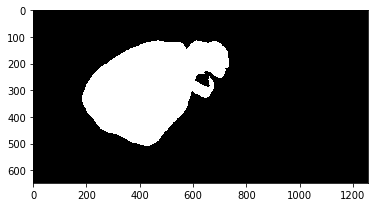

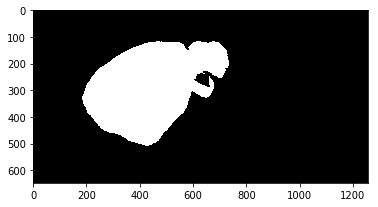

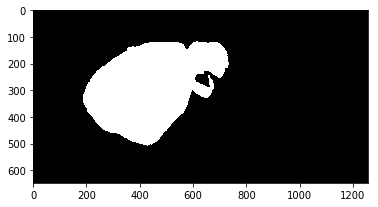

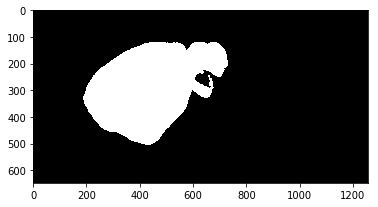

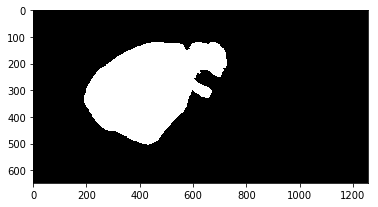

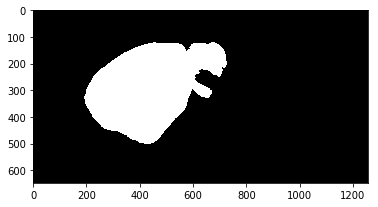

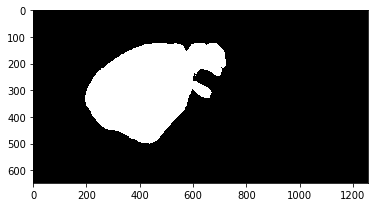

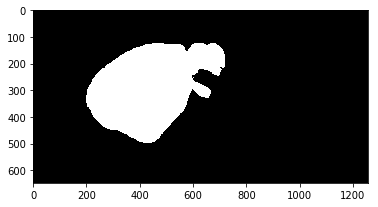

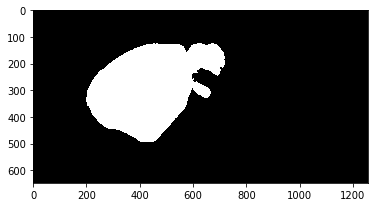

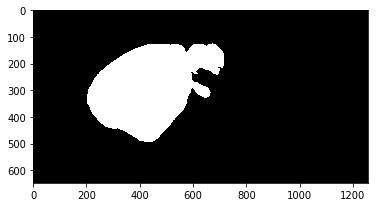

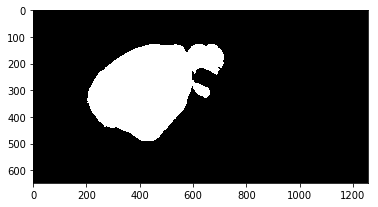

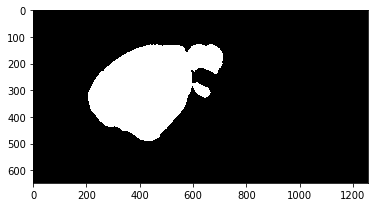

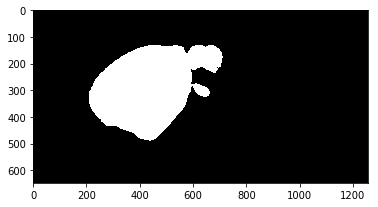

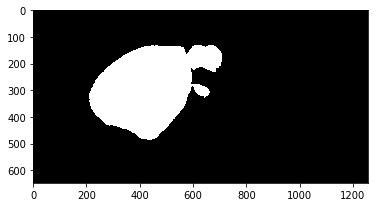

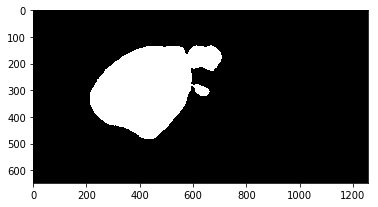

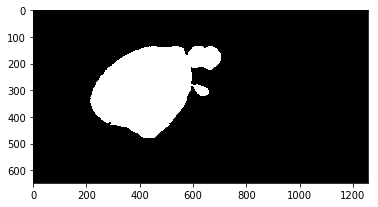

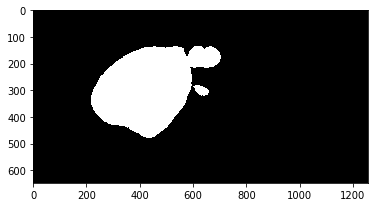

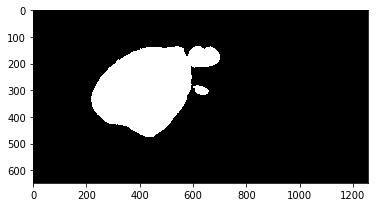

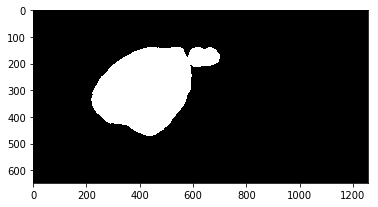

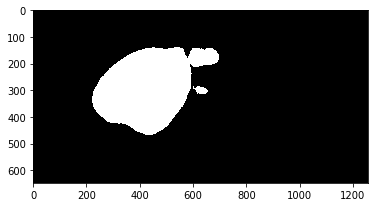

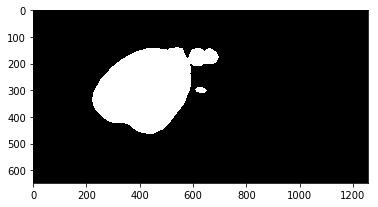

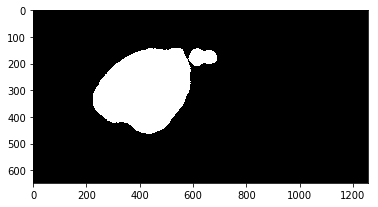

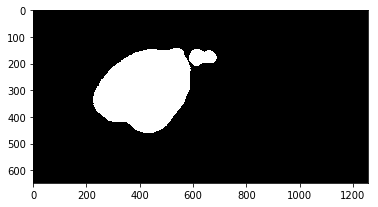

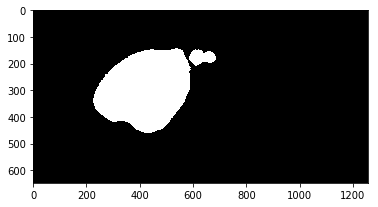

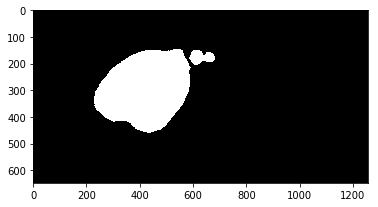

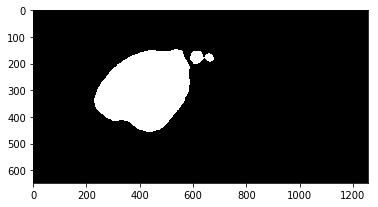

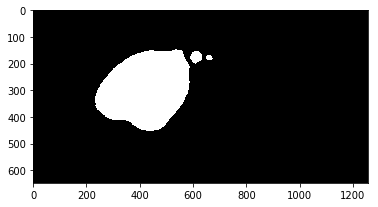

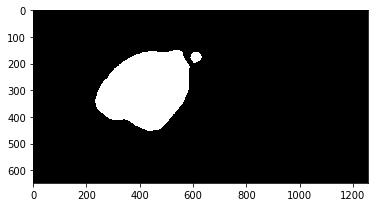

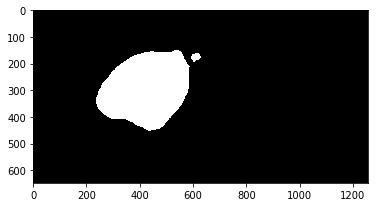

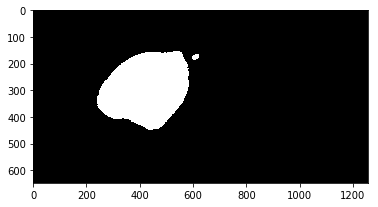

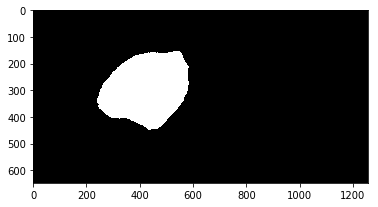

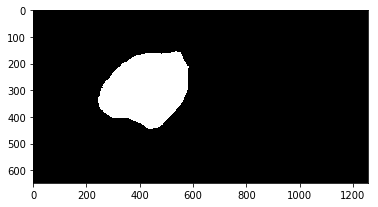

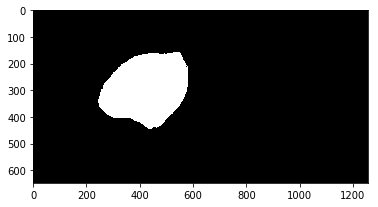

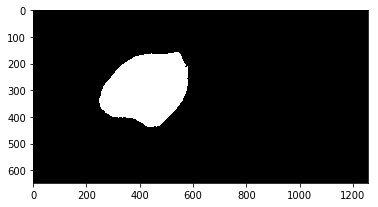

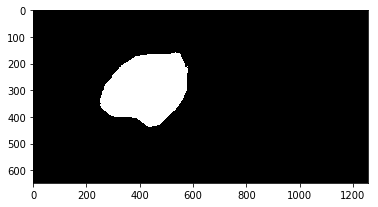

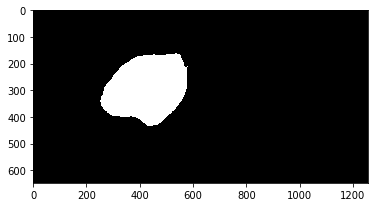

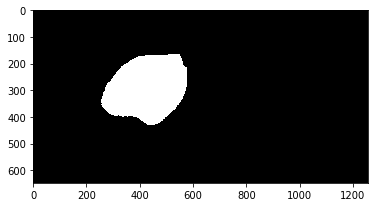

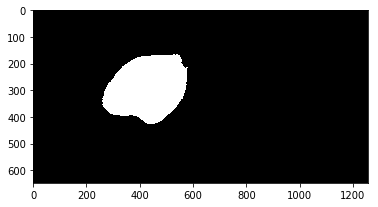

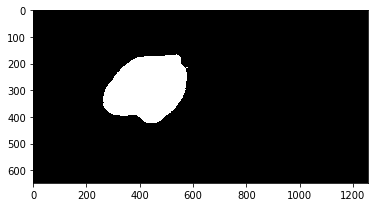

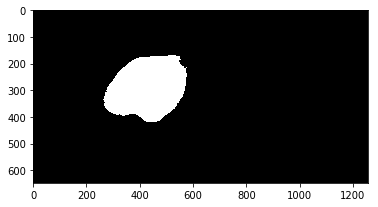

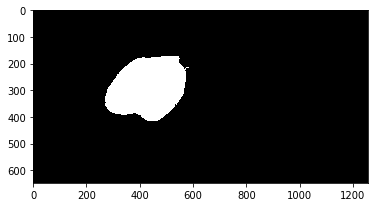

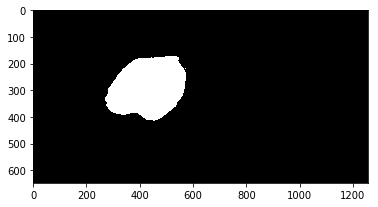

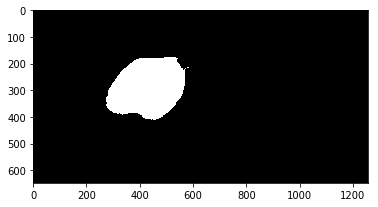

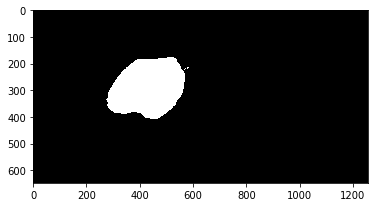

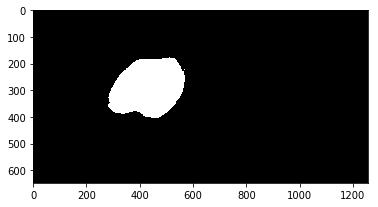

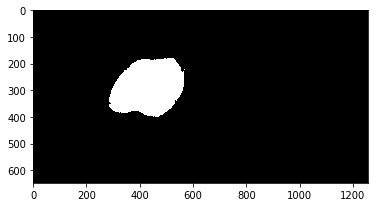

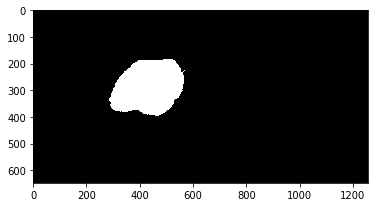

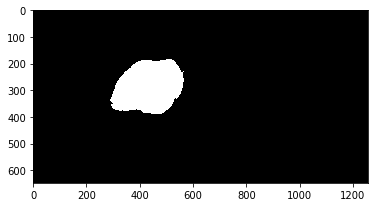

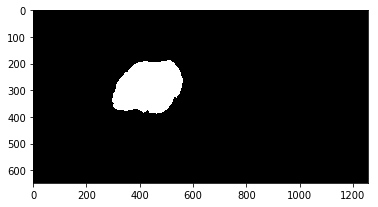

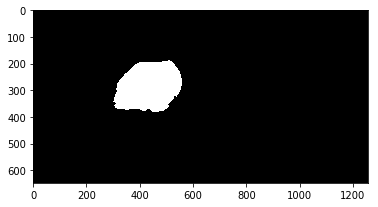

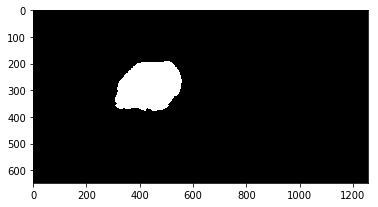

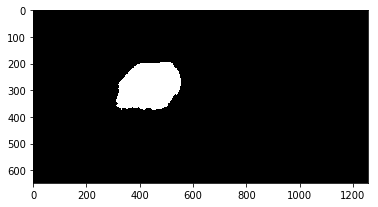

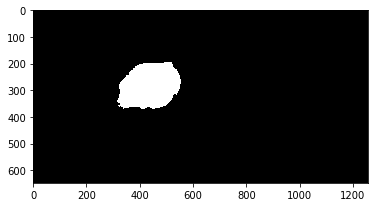

In [293]:
for fn in metadata_cache['valid_filenames_all'][stack]:
    mask_tb_alignedPadded = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn)
    plt.figure();
    plt.imshow(mask_tb_alignedPadded[alignedWithMargin_ymin:alignedWithMargin_ymax+1, 
                                     alignedWithMargin_xmin:alignedWithMargin_xmax+1], cmap=plt.cm.gray)
    plt.show();

# Generate prep5 thumbnails from prep1 thumbnails
prep1_thumbnail_NtbNormalized -> prep5_thumbnail_NtbNormalized

In [388]:
# roughly 1 second per slice
for stack in ['MD662']:

    alignedWithMargin_xmin, alignedWithMargin_xmax,\
    alignedWithMargin_ymin, alignedWithMargin_ymax = DataManager.load_cropbox_v2(stack=stack, anchor_fn=None, 
                                                            prep_id='alignedWithMargin',
                                                           return_dict=False, only_2d=True)
            
#     for section in metadata_cache['valid_sections_all'][stack]: # for CHATM2 and CHATM3
    for section in metadata_cache['valid_sections_all'][stack]: # for MD589 etc.
        
        for version in ['NtbNormalized']:
#         for version in [None, 'mask']:

            in_fp = \
            DataManager.get_image_filepath_v2(stack=stack, prep_id=1, section=section, version=version, resol='thumbnail')

            out_fp = \
            DataManager.get_image_filepath_v2(stack=stack, prep_id=5, section=section, version=version, resol='thumbnail')

            create_parent_dir_if_not_exists(out_fp)

            t = time.time()

            im_prep1 = imread(in_fp)
            im_prep5 = im_prep1[alignedWithMargin_ymin:alignedWithMargin_ymax+1, 
                                alignedWithMargin_xmin:alignedWithMargin_xmax+1]        
            save_data(im_prep5, out_fp)
            
            sys.stderr.write('Generate prep5: %.2f seconds.\n' % (time.time() - t))

aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 1.23 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnai

return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F8-2017.06.02-19.08.17_MD662_3_0024_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.70 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup

return code: 255
Generate prep5: 0.69 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F14-2017.06.08-15.59.57_MD662_3_0042_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F15-2017.06.02-21.15.53_MD662_1_0043_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.67 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_1_0061_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F21-2017.06.08-16.21.02_MD662_2_0062_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.69 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 1.06 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 1.09 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.91 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F40-2017.06.05-19.36.43_MD662_1_0118_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F40-2017.06.05-19.36.43_MD662_1_0118_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F40-2017.06.05-19.36.43_MD662_2_0119_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F40-2017.06.05-19.36.43_MD662_2_0119_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 1.02 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F46-2017.06.05-22.36.28_MD662_2_0137_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F46-2017.06.05-22.36.28_MD662_2_0137_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.93 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F46-2017.06.05-22.36.28_MD662_3_0138_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F46-2017.06.05-22.36.28_MD662_3_0138_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 1.15 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 1.01 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F52-2017.06.06-01.35.53_MD662_3_0156_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F52-2017.06.06-01.35.53_MD662_3_0156_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 1.02 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F53-2017.06.08-17.11.31_MD662_1_0157_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F53-2017.06.08-17.11.31_MD662_1_0157_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.98 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.69 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F59-2017.06.06-03.05.00_MD662_1_0175_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F59-2017.06.06-03.05.00_MD662_1_0175_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F59-2017.06.06-03.05.00_MD662_2_0176_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F59-2017.06.06-03.05.00_MD662_2_0176_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F65-2017.06.06-06.05.08_MD662_2_0194_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F65-2017.06.06-06.05.08_MD662_2_0194_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.75 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F73-2017.06.06-09.53.20_MD662_2_0218_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F73-2017.06.06-09.53.20_MD662_2_0218_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F83-2017.06.06-13.37.35_MD662_2_0248_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F83-2017.06.06-13.37.35_MD662_2_0248_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F84-2017.06.06-14.03.51_MD662_1_0250_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F84-2017.06.06-14.03.51_MD662_1_0250_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.77 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F93-2017.06.06-18.34.27_MD662_1_0277_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F93-2017.06.06-18.34.27_MD662_1_0277_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.75 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F93-2017.06.06-18.34.27_MD662_2_0278_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F93-2017.06.06-18.34.27_MD662_2_0278_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBa

return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F102-2017.06.06-22.30.50_MD662_2_0305_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F102-2017.06.06-22.30.50_MD662_2_0305_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F103-2017.06.06-22.56.22_MD662_1_0307_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F103-2017.06.06-22.56.22_MD662_1_0307_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F112-2017.06.07-02.53.08_MD662_1_0334_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F112-2017.06.07-02.53.08_MD662_1_0334_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F112-2017.06.07-02.53.08_MD662_2_0335_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F112-2017.06.07-02.53.08_MD662_2_0335_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.75 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.70 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F121-2017.06.07-14.55.33_MD662_2_0362_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F121-2017.06.07-14.55.33_MD662_2_0362_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F122-2017.06.07-15.19.59_MD662_1_0364_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F122-2017.06.07-15.19.59_MD662_1_0364_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F129-2017.06.07-18.36.41_MD662_3_0387_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F129-2017.06.07-18.36.41_MD662_3_0387_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.75 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F130-2017.06.07-19.06.02_MD662_1_0388_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F130-2017.06.07-19.06.02_MD662_1_0388_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.75 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F136-2017.06.07-22.02.11_MD662_1_0406_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F136-2017.06.07-22.02.11_MD662_1_0406_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F136-2017.06.07-22.02.11_MD662_2_0407_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F136-2017.06.07-22.02.11_MD662_2_0407_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.72 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.69 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F148-2017.06.08-02.58.49_MD662_3_0444_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.70 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F149-2017.06.08-03.23.49_MD662_1_0445_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.73 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_1_0463_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F155-2017.06.08-05.19.51_MD662_2_0464_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.71 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_2_0482_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F161-2017.06.08-11.23.08_MD662_3_0483_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDa

return code: 255
Generate prep5: 0.74 seconds.
aws s3 cp "/home/alexn/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_prep5_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_thumbnail_NtbNormalized/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_prep5_thumbnail_NtbNormalized.tif"
return code: 255
Generate prep5: 0.76 seconds.


# Generate prep5 from original (transform + crop)
- raw_NtbNormalizedAdaptiveInvertedGamma -> prep5_raw_NtbNormalizedAdaptiveInvertedGamma
- thumbnail_NtbNormalized -> prep5_thumbnail_NtbNormalized

In [116]:
version = 'NtbNormalizedAdaptiveInvertedGamma'
resol = 'raw'

# version = 'NtbNormalized'
# resol = 'thumbnail'

# new_prep_id = 5
new_prep_id = 'alignedWithMargin'

if version == 'NtbNormalized': 
    pad_bg_color = 'black'
elif version == 'NtbNormalizedAdaptiveInvertedGamma':
    pad_bg_color = 'white'

In [96]:
ff

set()

In [117]:
ff = set(metadata_cache['valid_filenames'][stack]) - \
set([fp[:-49] for fp in os.listdir('/data/CSHL_data_processed/MD662/\
MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/')])

In [99]:
script

'/home/alexn/brain/preprocess/warp_crop_IM_v3.py'

In [136]:

# Will take about 10 hours to fully run. 
for stack in ['MD662']:

    anchor_fn = DataManager.load_anchor_filename(stack=stack)
    transforms_to_anchor = DataManager.load_transforms(stack=stack, downsample_factor=32, 
                                                       use_inverse=False, anchor_fn=anchor_fn)

    alignedWithMargin_xmin, alignedWithMargin_xmax,\
    alignedWithMargin_ymin, alignedWithMargin_ymax = DataManager.load_cropbox_v2(stack=stack, anchor_fn=None, 
                                                            prep_id=new_prep_id,
                                                           return_dict=False, only_2d=True)

    x_tb = alignedWithMargin_xmin
    y_tb = alignedWithMargin_ymin
    w_tb = alignedWithMargin_xmax - alignedWithMargin_xmin + 1
    h_tb = alignedWithMargin_ymax - alignedWithMargin_ymin + 1
    
    input_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=None, version=version, resol=resol)
    out_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=new_prep_id, resol=resol, version=version)
    print 'out_dir:', out_dir
    # CHANGE THIS FOR FUTURE RUNS
    script = os.path.join(REPO_DIR, 'preprocess', 'warp_crop_IM_v3.py')
    

    # ! rm -rf {out_dir}

    # for version in ['CHAT']:
#         for version in ['NtbNormalizedAdaptiveInvertedGamma']:
#         for version in ['NtbNormalizedAdaptiveInvertedGamma']:

    t = time.time()

    if pad_bg_color == 'auto': # useful for alternatively stained stacks where bg varies depending on stain on each section
        run_distributed('%(script)s %(stack)s \"%%(input_fp)s\" \"%%(output_fp)s\" %%(transform)s %(resol)s %(x_tb)d %(y_tb)d %(w_tb)d %(h_tb)d %%(pad_bg_color)s' % \
                        {'script': script,
                        'stack': stack,
                         'x_tb': x_tb,
                        'y_tb': y_tb,
                        'w_tb': w_tb,
                        'h_tb': h_tb,
                         'resol': resol
                        },
                        kwargs_list=[{'transform': ','.join(map(str, transforms_to_anchor[img_name].flatten())),
                                    'input_fp':\
                                      DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                                                        resol=resol, version=version, 
                                                                        fn=img_name),
                                    'output_fp':\
                                      DataManager.get_image_filepath_v2(stack=stack, fn=img_name, 
                                                                        prep_id=new_prep_id, version=version, 
                                                                        resol=resol),
                                    'pad_bg_color': 'black' if img_name.split('-')[1][0] == 'F' else 'white',
                                     }
                                    for img_name in metadata_cache['valid_filenames'][stack]
                                    ],
                        argument_type='single',
                       jobs_per_node=1,
                       local_only=True)
    else:
        run_distributed('%(script)s %(stack)s \"%%(input_fp)s\" \"%%(output_fp)s\" %%(transform)s %(resol)s %(x_tb)d %(y_tb)d %(w_tb)d %(h_tb)d %(pad_bg_color)s' % \
                        {'script': script,
                        'stack': stack,
                         'x_tb': x_tb,
                        'y_tb': y_tb,
                        'w_tb': w_tb,
                        'h_tb': h_tb,
                         'resol': resol,
                        'pad_bg_color': pad_bg_color
                        },
                        kwargs_list=[{'transform': ','.join(map(str, transforms_to_anchor[img_name].flatten())),
                                    'input_fp': DataManager.get_image_filepath_v2(stack=stack, prep_id=None, 
                                                                                  resol=resol, version=version, 
                                                                                  fn=img_name),
                                    'output_fp': DataManager.get_image_filepath_v2(stack=stack, fn=img_name, 
                                                                                   prep_id=new_prep_id, version=version, 
                                                                                   resol=resol),
                                     }
                                     for img_name in metadata_cache['valid_filenames'][stack]
#                                     for img_name in ff
                                    ],
                        argument_type='single',
                       jobs_per_node=8 if resol == 'thumbnail' else 1,
                       local_only=True)

    # wait_qsub_complete()

    print 'done in', time.time() - t, 'seconds'

Setting environment for Precision WorkStation for Alex Newberry
Setting environment for Precision WorkStation for Alex Newberry
out_dir: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma
argument type: single


rm -f ~/stderr_*; rm -f ~/stdout_*
return code: 0
Run locally.


running script: /tmp/runall.sh
done in 12369.658824 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.


# Generate prep5 thumbnails from prep5 raw
prep5_raw_NtbNormalizedAdaptiveInvertedGamma -> prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma

In [114]:
thumbnail_downscale_factor = 32

In [115]:
for stack in ['MD662']:
#     stack = 'CHATM2'

    for img_name in metadata_cache['valid_filenames'][stack]:
#     for img_name in ['CHATM2_slide66_2018_02_14-S1']:

        t = time.time()

        in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=5, resol='raw', version='NtbNormalizedAdaptiveInvertedGamma', fn=img_name)
        out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=5, resol='thumbnail', version='NtbNormalizedAdaptiveInvertedGamma', fn=img_name)
        create_parent_dir_if_not_exists(out_fp)

        img = imread(in_fp)
        imsave(out_fp, img[::thumbnail_downscale_factor, ::thumbnail_downscale_factor])

#         execute_command('convert %(in_fp)s -scale 3.125%% %(out_fp)s' % {'in_fp':in_fp, 'out_fp':out_fp})

        sys.stderr.write("Rescale: %.2f seconds.\n" % (time.time() - t)) # ~20s / image

IOError: [Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif'

# Crop prep2 from prep5
- prep5_raw_NtbNormalizedAdaptiveInvertedGamma -> prep2_raw_NtbNormalizedAdaptiveInvertedGamma

In [7]:
from multiprocess import Pool

In [8]:
def f(stack, img_name, version, resol, x,y,w,h):

    input_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=5, resol=resol, version=version, fn=img_name)
    output_fp = DataManager.get_image_filepath_v2(stack=stack, fn=img_name, prep_id=2, version=version, resol=resol)

    img = imread(input_fp)
    save_data(img[y:y+h, x:x+w], output_fp)

In [10]:
# for stack in ['CHATM2', 'CHATM3']:
for stack in ['MD662']:
    
    alignedBrainstemCrop_xmin_wrt_alignedWithMargin, \
    alignedBrainstemCrop_xmax_wrt_alignedWithMargin,\
    alignedBrainstemCrop_ymin_wrt_alignedWithMargin,\
    alignedBrainstemCrop_ymax_wrt_alignedWithMargin = \
    DataManager.load_cropbox_v2_relative(stack=stack, 
                                       prep_id='alignedBrainstemCrop', 
                                       wrt_prep_id='alignedWithMargin', 
                                       out_resolution='down32')
    
    x_tb = alignedBrainstemCrop_xmin_wrt_alignedWithMargin
    y_tb = alignedBrainstemCrop_ymin_wrt_alignedWithMargin
    w_tb = alignedBrainstemCrop_xmax_wrt_alignedWithMargin - alignedBrainstemCrop_xmin_wrt_alignedWithMargin + 1
    h_tb = alignedBrainstemCrop_ymax_wrt_alignedWithMargin - alignedBrainstemCrop_ymin_wrt_alignedWithMargin + 1
    
#     alignedBrainstemCrop_xmin, alignedBrainstemCrop_xmax, \
#     alignedBrainstemCrop_ymin, alignedBrainstemCrop_ymax = DataManager.load_cropbox_v2(stack=stack, prep_id='alignedBrainstemCrop', only_2d=True)

#     alignedWithMargin_xmin, alignedWithMargin_xmax,\
#     alignedWithMargin_ymin, alignedWithMargin_ymax = DataManager.load_cropbox_v2(stack=stack, anchor_fn=None, 
#                                                             prep_id='alignedWithMargin',
#                                                            return_dict=False, only_2d=True)

#     alignedBrainstemCrop_xmin_wrt_alignedWithMargin = alignedBrainstemCrop_xmin - alignedWithMargin_xmin
#     alignedBrainstemCrop_xmax_wrt_alignedWithMargin = alignedBrainstemCrop_xmax - alignedWithMargin_xmin
#     alignedBrainstemCrop_ymin_wrt_alignedWithMargin = alignedBrainstemCrop_ymin - alignedWithMargin_ymin
#     alignedBrainstemCrop_ymax_wrt_alignedWithMargin = alignedBrainstemCrop_ymax - alignedWithMargin_ymin

#     print alignedBrainstemCrop_xmin_wrt_alignedWithMargin,\
#     alignedBrainstemCrop_xmax_wrt_alignedWithMargin,\
#     alignedBrainstemCrop_ymin_wrt_alignedWithMargin,\
#     alignedBrainstemCrop_ymax_wrt_alignedWithMargin

#     x_tb = alignedBrainstemCrop_xmin_wrt_alignedWithMargin
#     y_tb = alignedBrainstemCrop_ymin_wrt_alignedWithMargin
#     w_tb = alignedBrainstemCrop_xmax_wrt_alignedWithMargin - alignedBrainstemCrop_xmin_wrt_alignedWithMargin + 1
#     h_tb = alignedBrainstemCrop_ymax_wrt_alignedWithMargin - alignedBrainstemCrop_ymin_wrt_alignedWithMargin + 1

#     for version in ['NtbNormalizedAdaptiveInvertedGamma', 'CHAT']:
#     for version in ['CHAT']:
    for version in ['NtbNormalizedAdaptiveInvertedGamma']:
#     for version in ['mask']:
#         for resol in ['thumbnail']:
        for resol in ['raw']:
            
            if resol == 'raw':
                x = x_tb * 32
                y = y_tb * 32
                w = w_tb * 32
                h = h_tb * 32
            elif resol == 'thumbnail':
                x = x_tb
                y = y_tb
                w = w_tb
                h = h_tb
            else:
                raise

#             input_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=5, version=version, resol='raw')
            out_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=2, resol=resol, version=version)
            print 'out_dir:', out_dir
#             script = os.path.join(REPO_DIR, 'preprocess', 'warp_crop_IM_v3.py')

    #         ! rm -rf {out_dir}
            create_if_not_exists(out_dir)

            t = time.time()

            pool = Pool(4)
            _ = pool.map(lambda img_name: f(stack=stack, img_name=img_name, version=version, resol=resol, 
                                            x=x, y=y, w=w, h=h), 
                         metadata_cache['valid_filenames'][stack])
            pool.close()
            pool.join()

#             for img_name in metadata_cache['valid_filenames'][stack]:
#                 f(stack=stack, img_name=img_name, version=version, resol=resol, 
#                                             x=x, y=y, w=w, h=h)

        #     run_distributed('convert \"%%(input_fp)s\" -crop %(w)dx%(h)d+%(x)d+%(y)d  \"%%(output_fp)s\"' % \
        #                     {'w':w_raw, 'h':h_raw, 'x':x_raw, 'y':y_raw},
        #                     kwargs_list=[{'input_fp': DataManager.get_image_filepath_v2(stack=stack, prep_id=5, resol='raw', version=version, fn=img_name),
        #                                   'output_fp': DataManager.get_image_filepath_v2(stack=stack, fn=img_name, prep_id=2, version=version, resol='raw')}
        #                                  for img_name in metadata_cache['valid_filenames'][stack]],
        # #                                  for img_name in ['CHATM3_slide35_2018_02_17-S1']],
        #                     argument_type='single',
        #                    jobs_per_node=1,
        #                    local_only=True)

            # wait_qsub_complete()

            print 'done in', time.time() - t, 'seconds' # 1500s

out_dir: /data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma


aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F35-2017.06.05-17.08.18_MD661_3_0105_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F35-2017.06.05-17.08.18_MD661_3_0105_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F47-2017.06.05-23.06.43_MD661_1_0139_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F47-2017.06.05-23.06.43_MD661_1_0139_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-dat

return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD661_2_0110_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD661_2_0110_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD661_1_0127_prep2_raw_NtbNo

return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F44-2017.06.05-21.36.28_MD661_3_0132_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F44-2017.06.05-21.36.28_MD661_3_0132_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD661_3_0099_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD661_3_0099_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F39-2017.06.05-19.07.49_MD661_2_0116_prep2_raw_NtbNo

return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F46-2017.06.05-22.36.28_MD661_2_0137_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F46-2017.06.05-22.36.28_MD661_2_0137_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F52-2017.06.06-01.35.53_MD661_3_0156_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F52-2017.06.06-01.35.53_MD661_3_0156_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F41-2017.06.05-20.06.59_MD661_1_0121_prep2_raw_NtbNo

aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F65-2017.06.06-06.05.08_MD661_2_0194_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F65-2017.06.06-06.05.08_MD661_2_0194_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F59-2017.06.06-03.05.00_MD661_3_0177_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F59-2017.06.06-03.05.00_MD661_3_0177_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD661_2_0161_prep2_raw_NtbNormalizedAdaptiv

aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F67-2017.06.06-07.07.27_MD661_2_0200_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F67-2017.06.06-07.07.27_MD661_2_0200_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F61-2017.06.06-04.06.02_MD661_2_0182_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F61-2017.06.06-04.06.02_MD661_2_0182_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F61-2017.06.06-04.06.02_MD661_3_0183_prep2_raw_NtbNo

return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F57-2017.06.06-02.06.22_MD661_3_0171_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F57-2017.06.06-02.06.22_MD661_3_0171_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F77-2017.06.06-11.00.56_MD661_2_0230_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F77-2017.06.06-11.00.56_MD661_2_0230_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F58-2017.06.06-02.35.45_MD661_1_0172_

aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F89-2017.06.06-16.49.49_MD661_1_0265_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F89-2017.06.06-16.49.49_MD661_1_0265_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F98-2017.06.06-20.47.32_MD661_1_0292_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F98-2017.06.06-20.47.32_MD661_1_0292_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F105-2017.06.06-23.53.33_MD661_2_0314_prep2_raw_NtbNormalizedAdapti

return code: 0
return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F84-2017.06.06-14.03.51_MD661_2_0251_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F84-2017.06.06-14.03.51_MD661_2_0251_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F100-2017.06.06-21.40.10_MD661_2_0299_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F100-2017.06.06-21.40.10_MD661_2_0299_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F92-2017.06.06-18.08.17_MD661_1_0274_prep2_raw_Ntb

return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F87-2017.06.06-15.22.59_MD661_1_0259_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F87-2017.06.06-15.22.59_MD661_1_0259_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F94-2017.06.06-19.01.05_MD661_2_0281_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F94-2017.06.06-19.01.05_MD661_2_0281_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F103-2017.06.06-22.56.22_MD661_1_0307_prep2_raw_NtbNormalizedAdaptiveInvertedGamma

return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F115-2017.06.07-04.11.41_MD661_1_0343_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F115-2017.06.07-04.11.41_MD661_1_0343_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F113-2017.06.07-03.19.59_MD661_1_0337_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F113-2017.06.07-03.19.59_MD661_1_0337_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F122-2017.06.07-15.19.59_MD661_2_0365_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3:/

aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F126-2017.06.07-17.13.02_MD661_1_0376_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F126-2017.06.07-17.13.02_MD661_1_0376_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD661_3_0393_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD661_3_0393_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F136-2017.06.07-22.02.11_MD661_2_0407_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3:/

aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F138-2017.06.07-23.00.07_MD661_1_0412_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F138-2017.06.07-23.00.07_MD661_1_0412_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F127-2017.06.07-17.34.51_MD661_2_0380_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F127-2017.06.07-17.34.51_MD661_2_0380_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
return code: 0
return code: 0
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F138-2017.06.07-23.00.07_MD661_2_0413_prep2_raw_

return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F140-2017.06.07-23.55.43_MD661_1_0418_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F140-2017.06.07-23.55.43_MD661_1_0418_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F140-2017.06.07-23.55.43_MD661_2_0419_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F140-2017.06.07-23.55.43_MD661_2_0419_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif"
return code: 0


done in 1463.65569592 seconds


# Compress prep2 to JPEG
prep2_raw_NtbNormalizedAdaptiveInvertedGamma -> prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg

In [17]:
for stack in ['MD661']:

    for section in metadata_cache['valid_sections'][stack]:
        
#         for version in ['NtbNormalizedAdaptiveInvertedGamma', 'CHAT']:
        for version in ['NtbNormalizedAdaptiveInvertedGamma']:

            in_fp = \
            DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version=version, resol='raw')

            out_fp = \
            DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version=version+'Jpeg', resol='raw')

            create_parent_dir_if_not_exists(out_fp)

            t = time.time()
            execute_command("convert \"%(in_fp)s\" \"%(out_fp)s\"" % {'in_fp': in_fp, 'out_fp': out_fp})
            sys.stderr.write('Convert to JPEG: %.2f seconds.\n' % (time.time() - t)) # 14s

            upload_to_s3(out_fp)

convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.43 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD661_2_0089_prep2_raw_NtbN

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD661_2_0098_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_MD661_2_0098_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.58 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_MD661_2_0098_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_MD661_2_0098_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD661_3_0099

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F36-2017.06.05-17.38.33_MD661_3_0108_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F36-2017.06.05-17.38.33_MD661_3_0108_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.64 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F36-2017.06.05-17.38.33_MD661_3_0108_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F36-2017.06.05-17.38.33_MD661_3_0108_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD661_1_0109

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 8.63 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F40-2017.06.05-19.36.43_MD661_2_0119

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD661_2_0128_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD661_2_0128_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.54 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD661_2_0128_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD661_2_0128_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD661_3_0129

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F46-2017.06.05-22.36.28_MD661_3_0138_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F46-2017.06.05-22.36.28_MD661_3_0138_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.19 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F46-2017.06.05-22.36.28_MD661_3_0138_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F46-2017.06.05-22.36.28_MD661_3_0138_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F47-2017.06.05-23.06.43_MD661_1_0139

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.75 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F50-2017.06.06-00.35.44_MD661_2_0149

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F53-2017.06.08-17.11.31_MD661_2_0158_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F53-2017.06.08-17.11.31_MD661_2_0158_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.73 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F53-2017.06.08-17.11.31_MD661_2_0158_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F53-2017.06.08-17.11.31_MD661_2_0158_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F53-2017.06.08-17.11.31_MD661_3_0159

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F56-2017.06.08-18.42.36_MD661_3_0168_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F56-2017.06.08-18.42.36_MD661_3_0168_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.88 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F56-2017.06.08-18.42.36_MD661_3_0168_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F56-2017.06.08-18.42.36_MD661_3_0168_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F57-2017.06.06-02.06.22_MD661_1_0169

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD661_1_0178_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD661_1_0178_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 8.00 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD661_1_0178_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD661_1_0178_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD661_2_0179

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F63-2017.06.06-05.05.24_MD661_2_0188_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F63-2017.06.06-05.05.24_MD661_2_0188_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.98 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F63-2017.06.06-05.05.24_MD661_2_0188_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F63-2017.06.06-05.05.24_MD661_2_0188_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F63-2017.06.06-05.05.24_MD661_3_0189

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F66-2017.06.06-06.35.52_MD661_3_0198_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F66-2017.06.06-06.35.52_MD661_3_0198_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.60 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F66-2017.06.06-06.35.52_MD661_3_0198_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F66-2017.06.06-06.35.52_MD661_3_0198_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F67-2017.06.06-07.07.27_MD661_1_0199

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F70-2017.06.06-08.36.23_MD661_2_0209_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F70-2017.06.06-08.36.23_MD661_2_0209_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.80 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F70-2017.06.06-08.36.23_MD661_2_0209_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F70-2017.06.06-08.36.23_MD661_2_0209_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F71-2017.06.06-09.00.35_MD661_1_0211

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F76-2017.06.06-16.23.52_MD661_2_0227_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F76-2017.06.06-16.23.52_MD661_2_0227_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.95 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F76-2017.06.06-16.23.52_MD661_2_0227_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F76-2017.06.06-16.23.52_MD661_2_0227_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F77-2017.06.06-11.00.56_MD661_1_0229

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.29 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD661_1_0244

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.97 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F87-2017.06.06-15.22.59_MD661_1_0259

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F91-2017.06.06-17.42.59_MD661_2_0272_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F91-2017.06.06-17.42.59_MD661_2_0272_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.57 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F91-2017.06.06-17.42.59_MD661_2_0272_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F91-2017.06.06-17.42.59_MD661_2_0272_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F92-2017.06.06-18.08.17_MD661_1_0274

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F96-2017.06.06-19.55.10_MD661_2_0287_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F96-2017.06.06-19.55.10_MD661_2_0287_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.11 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F96-2017.06.06-19.55.10_MD661_2_0287_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F96-2017.06.06-19.55.10_MD661_2_0287_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F97-2017.06.06-20.20.43_MD661_1_0289

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F101-2017.06.06-22.05.45_MD661_2_0302_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F101-2017.06.06-22.05.45_MD661_2_0302_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 8.23 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F101-2017.06.06-22.05.45_MD661_2_0302_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F101-2017.06.06-22.05.45_MD661_2_0302_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F102-2017.06.06-22.30.50_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 8.12 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F107-2017.06.07-00.44.42_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F111-2017.06.07-02.28.23_MD661_2_0332_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F111-2017.06.07-02.28.23_MD661_2_0332_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.98 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F111-2017.06.07-02.28.23_MD661_2_0332_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F111-2017.06.07-02.28.23_MD661_2_0332_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F112-2017.06.07-02.53.08_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 8.86 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F118-2017.06.07-11.26.45_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.90 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F122-2017.06.07-15.19.59_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.51 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F127-2017.06.07-17.34.51_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F130-2017.06.07-19.06.02_MD661_1_0388_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F130-2017.06.07-19.06.02_MD661_1_0388_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.65 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F130-2017.06.07-19.06.02_MD661_1_0388_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F130-2017.06.07-19.06.02_MD661_1_0388_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F130-2017.06.07-19.06.02_MD661_2

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F133-2017.06.07-20.35.00_MD661_2_0398_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F133-2017.06.07-20.35.00_MD661_2_0398_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.71 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F133-2017.06.07-20.35.00_MD661_2_0398_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F133-2017.06.07-20.35.00_MD661_2_0398_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F133-2017.06.07-20.35.00_MD661_3

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F136-2017.06.07-22.02.11_MD661_3_0408_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F136-2017.06.07-22.02.11_MD661_3_0408_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 7.57 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F136-2017.06.07-22.02.11_MD661_3_0408_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F136-2017.06.07-22.02.11_MD661_3_0408_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F137-2017.06.07-22.31.13_MD661_1

return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F140-2017.06.07-23.55.43_MD661_1_0418_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif" "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F140-2017.06.07-23.55.43_MD661_1_0418_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
Convert to JPEG: 6.20 seconds.
aws s3 cp "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F140-2017.06.07-23.55.43_MD661_1_0418_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F140-2017.06.07-23.55.43_MD661_1_0418_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/data/CSHL_data_processed/MD661/MD661_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F140-2017.06.07-23.55.43_MD661_2